# Cardiovascular diseases

* Introduction to Heart Diseases

* Image

* Explanation of the work done:
    - Where the data comes from.
    - Explaining the dataset fields
    - A breafly summary of how this topic is abord

### Importing Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deep Learning
import torch
import torch.nn as nn

### Loding Dataset

In [2]:
df = pd.read_csv("../Dataset/03_Cardio02/heart_2020_cleaned.csv")

In [3]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [4]:
df.shape

(319795, 18)

In [5]:
df.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

## Data Cleaning

In [6]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
null_values = df.isnull().sum().sum()
na_values = df.isna().sum().sum()

print(f"Null values: {null_values} - NA values: {na_values}")

Null values: 0 - NA values: 0


## Feature engineering

In [8]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
df["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [10]:
df = df[df.columns].replace({"Yes":1, "Yes (during pregnancy)": 1,"No": 0, 
                             "No, borderline diabetes": 0, "Male": 1, "Female": 0})

In [11]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [12]:
y_col = ['HeartDisease']
col_binary = ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex','Diabetic', 
              'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
col_categorical = ['AgeCategory','Race','GenHealth']
col_continuos = ['BMI','PhysicalHealth', 'MentalHealth','SleepTime']

In [13]:
df[col_categorical] = df[col_categorical].astype("category")

## Explorative analysis

In [14]:
df_corr = df.drop(col_categorical, axis = 1)

<Axes: >

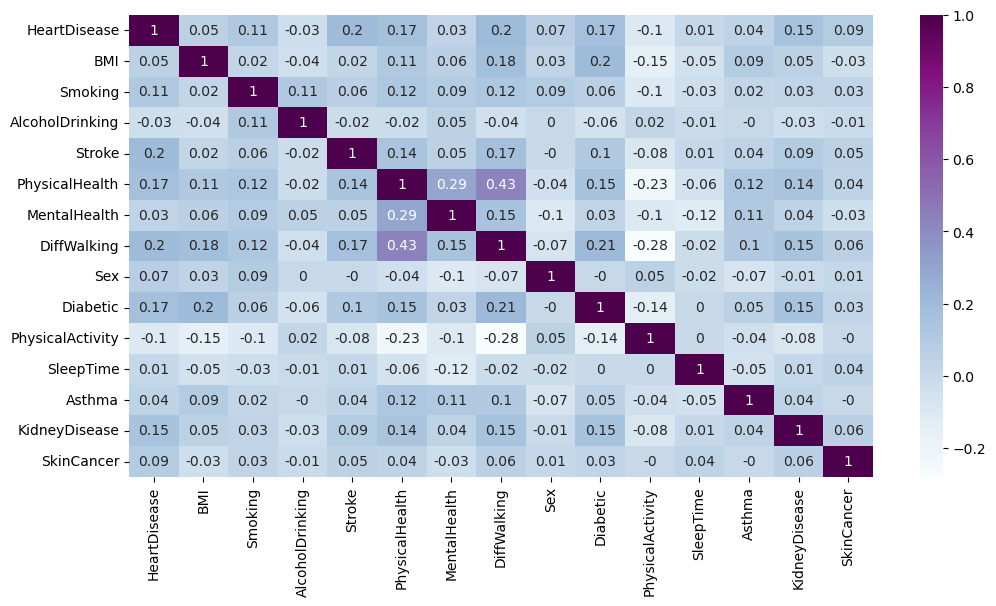

In [15]:
corr = df_corr.corr().round(2)

# Plotting the heatmap correlation between variable
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

* The Correlation HeatMap indicates that there is no an specific condition that causes a cardiovascular disease
* Therefore an additional analysis has to be made to find a pattern. 

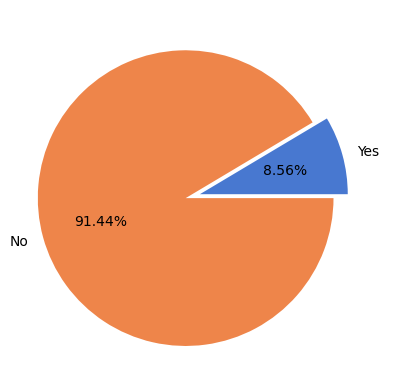

In [16]:
# Analyzing the percentage of people with a cardiovascular disease

Yes_answer = df[df["HeartDisease"] == 1].shape[0]
No_answer = df[df["HeartDisease"] == 0].shape[0]

# declaring exploding pie 
explode = [0, 0.1] 
# define Seaborn color palette to use 
palette_color = sns.color_palette('muted') 

# plotting data on chart 
plt.pie([Yes_answer, No_answer], labels = ["Yes","No"], colors=palette_color, explode=explode, autopct='%.2f%%') 
  
# displaying chart 
plt.show() 

* Only 8.56% of the pacient examinated present a cardiovascular diseases

In [17]:
def pie_chart_comparison(df, fixed_column, specific_column, category):
    
    values = ["Yes","No"]
    # Obtaining each category from the specific column
    if df[specific_column].dtype == 'int64':
        categories = [1,0]
        size_chart = (12,9)
    else:
        categories = [op for op in df[specific_column].cat.categories]
        size_chart = (18,12)
    
    # Obtaining the quantity of people with a cardiovascular disease per each category
    yes = [df[(df[specific_column] == cat) & (df[fixed_column] == 1)].shape[0] for cat in categories]
    no =  [df[(df[specific_column] == cat) & (df[fixed_column] == 0)].shape[0] for cat in categories]

    # declaring exploding pie 
    explode = [0, 0.1]
    
    # define Seaborn color palette to use 
    palette_color = sns.color_palette('muted') 

    # plotting data on chart 
    fig, axs = plt.subplots(1,len(categories),figsize = size_chart)
    for i in range(len(categories)):
        axs[i].pie([yes[i], no[i]], labels = values, 
                colors=palette_color, explode=explode, autopct='%.2f%%')
        axs[i].set_title(category[i])

    dataframe = pd.DataFrame([[yes[i], no[i]] for i in range(len(yes))], index = category,columns = values)
    # displaying chart 
    plt.show() 
    print(dataframe)

## Binary Variables

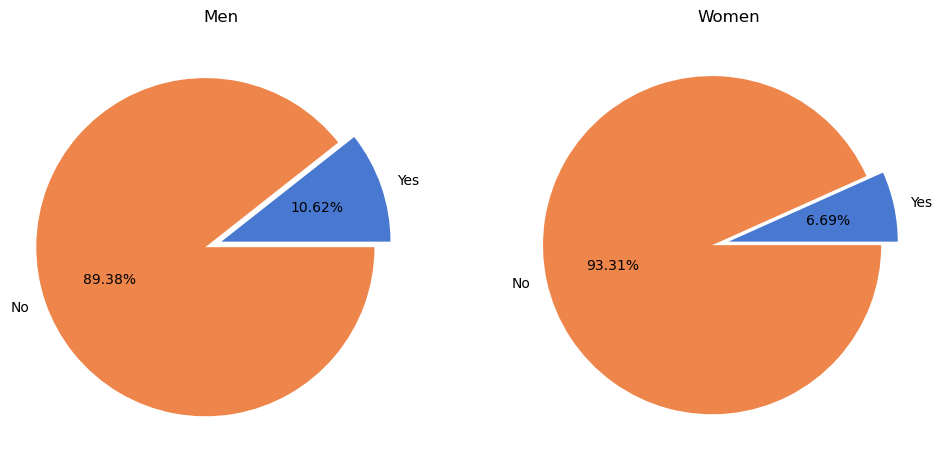

         Yes      No
Men    16139  135851
Women  11234  156571


In [18]:
pie_chart_comparison(df,"HeartDisease","Sex",["Men","Women"])

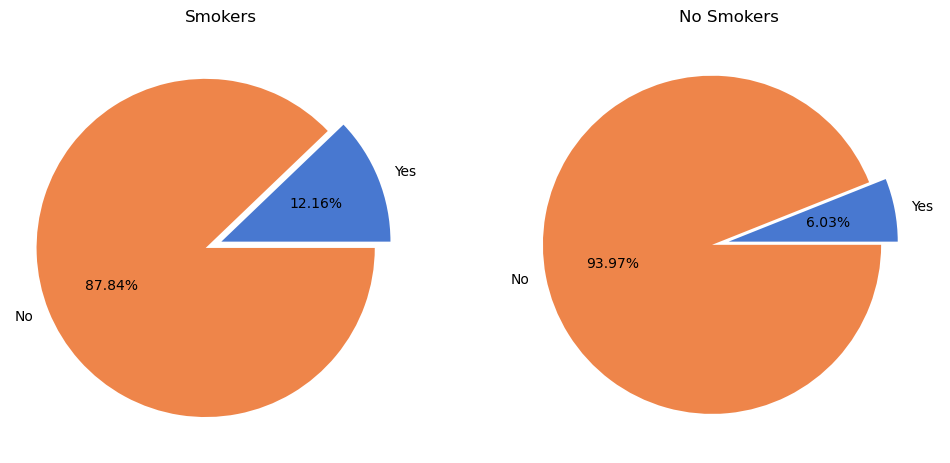

              Yes      No
Smokers     16037  115871
No Smokers  11336  176551


In [19]:
pie_chart_comparison(df,"HeartDisease","Smoking",
                     ["Smokers","No Smokers"])

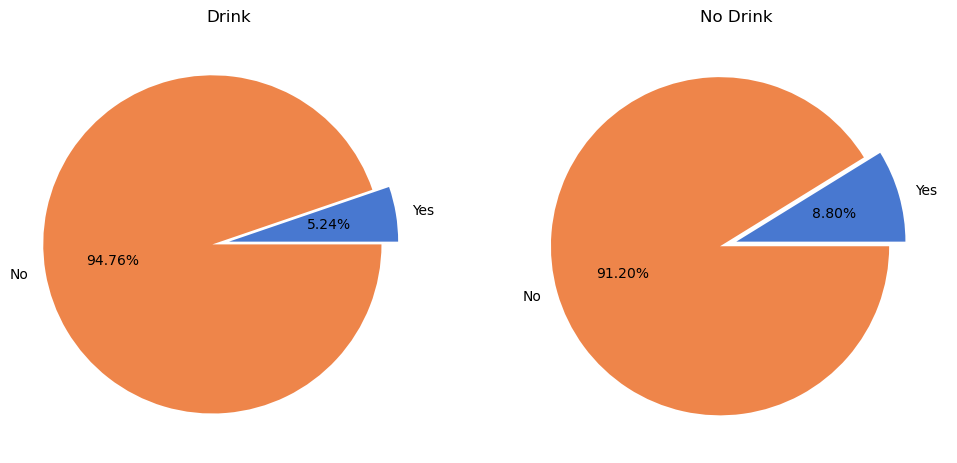

            Yes      No
Drink      1141   20636
No Drink  26232  271786


In [20]:
pie_chart_comparison(df,"HeartDisease","AlcoholDrinking",
                     ["Drink","No Drink"])

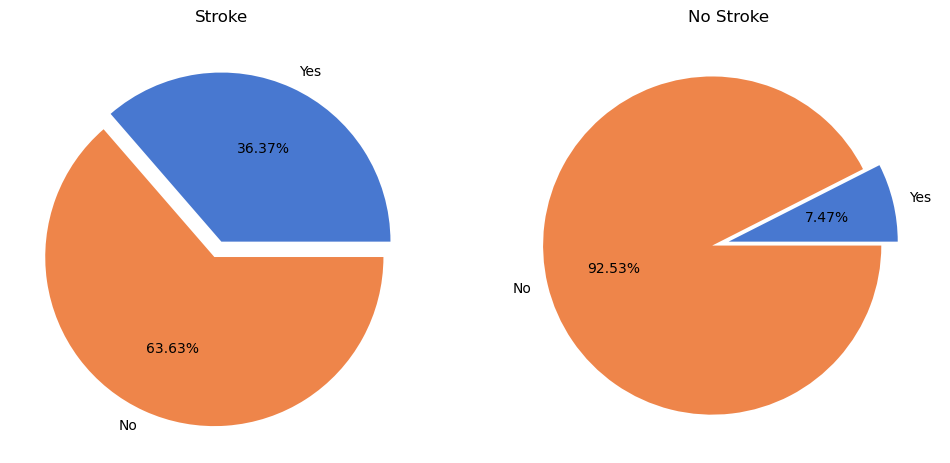

             Yes      No
Stroke      4389    7680
No Stroke  22984  284742


In [21]:
pie_chart_comparison(df,"HeartDisease","Stroke",
                     ["Stroke","No Stroke"])

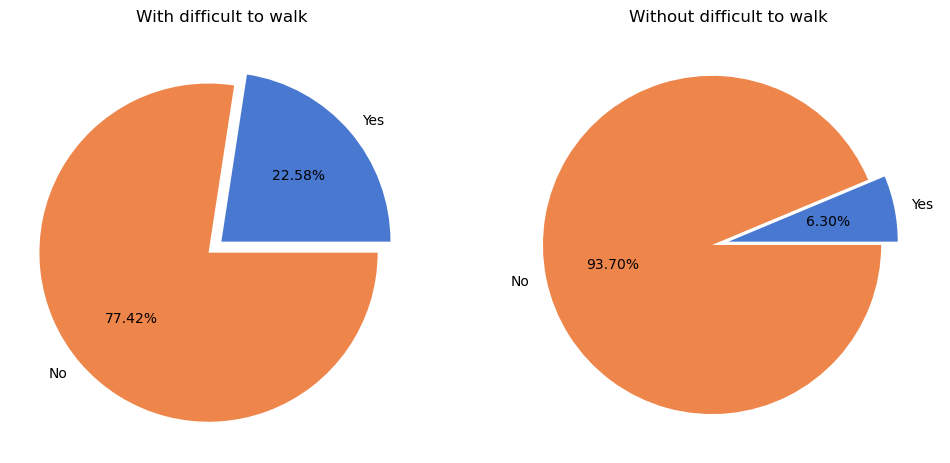

                             Yes      No
With difficult to walk     10028   34382
Without difficult to walk  17345  258040


In [22]:
pie_chart_comparison(df,"HeartDisease","DiffWalking",
                     ["With difficult to walk","Without difficult to walk"])

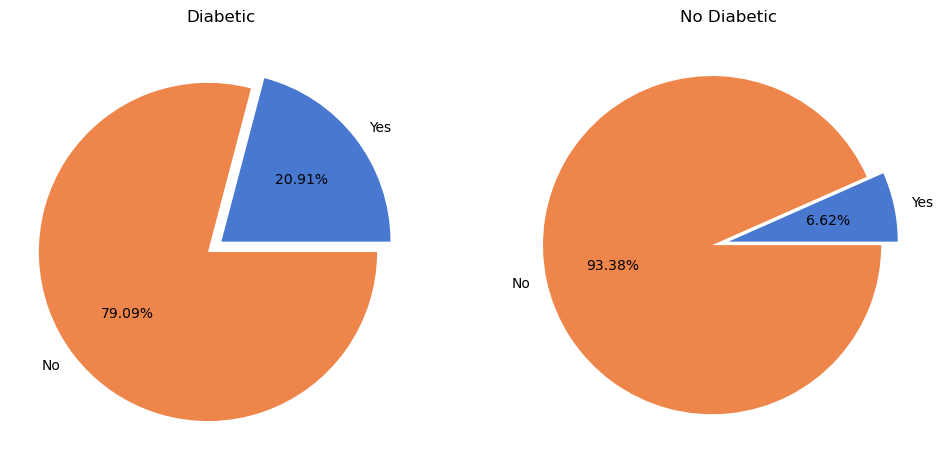

               Yes      No
Diabetic      9065   34296
No Diabetic  18308  258126


In [23]:
pie_chart_comparison(df,"HeartDisease","Diabetic",
                     ["Diabetic","No Diabetic"])

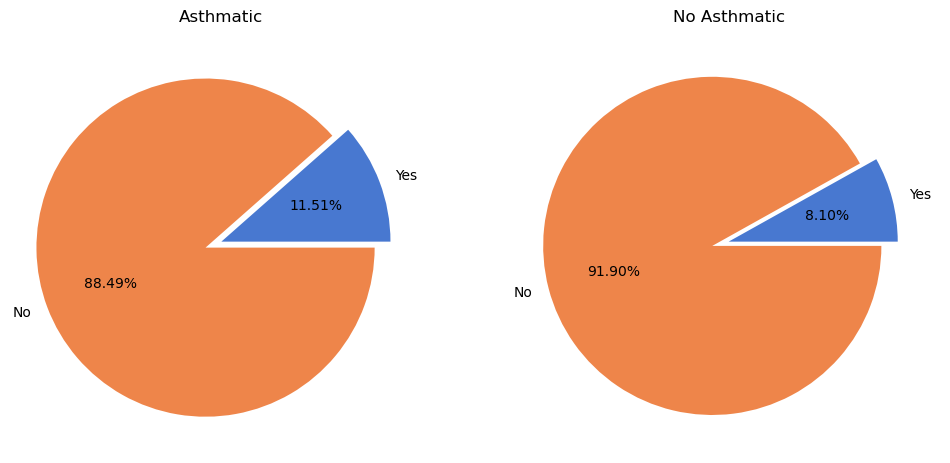

                Yes      No
Asthmatic      4933   37939
No Asthmatic  22440  254483


In [24]:
pie_chart_comparison(df,"HeartDisease","Asthma",
                     ["Asthmatic","No Asthmatic"])

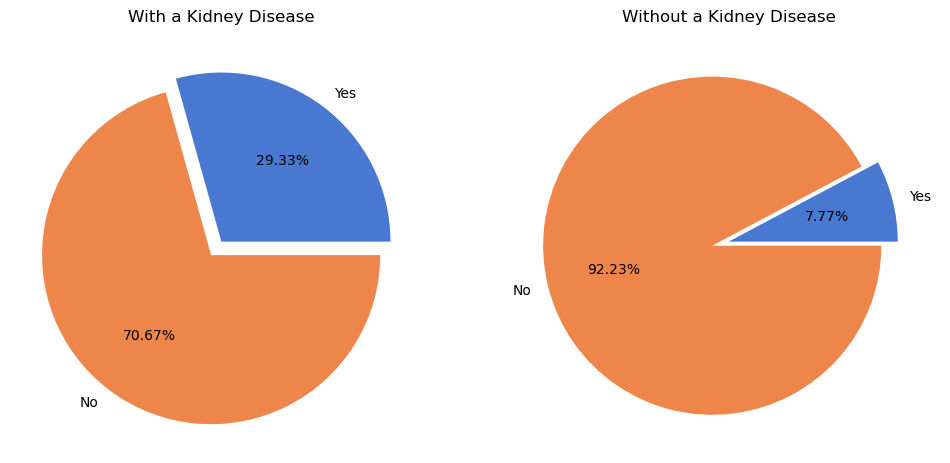

                            Yes      No
With a Kidney Disease      3455    8324
Without a Kidney Disease  23918  284098


In [25]:
pie_chart_comparison(df,"HeartDisease","KidneyDisease",
                     ["With a Kidney Disease","Without a Kidney Disease"])

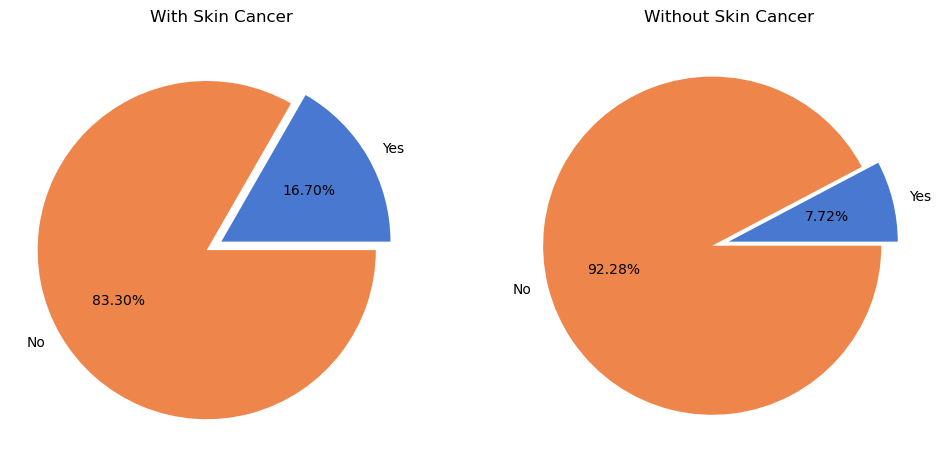

                       Yes      No
With Skin Cancer      4980   24839
Without Skin Cancer  22393  267583


In [26]:
pie_chart_comparison(df,"HeartDisease","SkinCancer",
                     ["With Skin Cancer","Without Skin Cancer"])

## Categorical Variables

* The Pie Chart indicates that people with Skin Cancer has 2 times more possibilities to have a heart disease

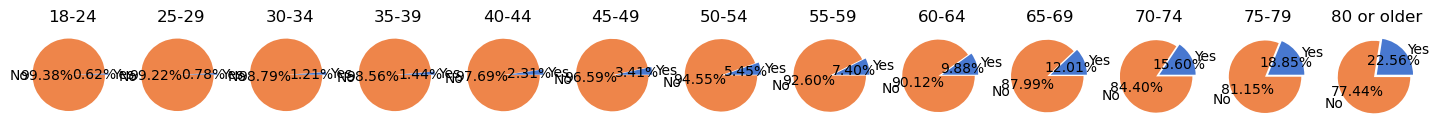

              Yes     No
18-24         130  20934
25-29         133  16822
30-34         226  18527
35-39         296  20254
40-44         486  20520
45-49         744  21047
50-54        1383  23999
55-59        2202  27555
60-64        3327  30359
65-69        4101  30050
70-74        4847  26218
75-79        4049  17433
80 or older  5449  18704


In [27]:
pie_chart_comparison(df,"HeartDisease","AgeCategory",df["AgeCategory"].cat.categories)

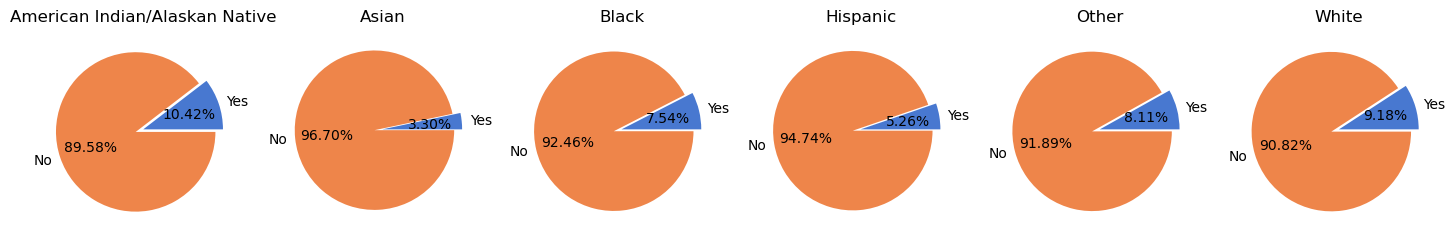

                                  Yes      No
American Indian/Alaskan Native    542    4660
Asian                             266    7802
Black                            1729   21210
Hispanic                         1443   26003
Other                             886   10042
White                           22507  222705


In [28]:
pie_chart_comparison(df,"HeartDisease","Race",
                     df["Race"].cat.categories)

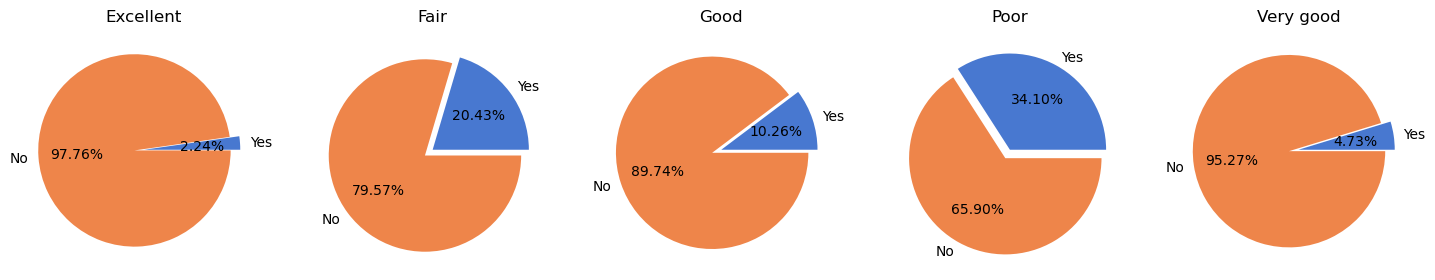

            Yes      No
Excellent  1500   65342
Fair       7084   27593
Good       9558   83571
Poor       3850    7439
Very good  5381  108477


In [29]:
pie_chart_comparison(df,"HeartDisease","GenHealth",df["GenHealth"].cat.categories)

## Continuous Variables

In continuos data, a different strategy is implemented

In [30]:
from collections import defaultdict

In [31]:
def scatterplot_comparisson(df,data1,data2):
    x = []
    y = []
    total_data = defaultdict(int)
    filter_data = defaultdict(int)
    # 
    for i in range(len(df)):
        total_data[int(df[data2][i])] += 1
        filter_data[int(df[data2][i])] += int(df[data1][i])
    #
    values = list(total_data.keys())
    values.sort()
    for v in values:
        if total_data[v] > 50:
            x.append(v)
            y.append(filter_data[v]/total_data[v])

    plt.scatter(x,y)
    plt.show()

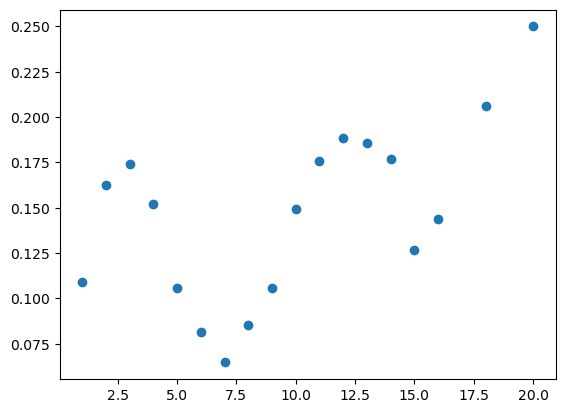

In [32]:
scatterplot_comparisson(df,"HeartDisease","SleepTime")

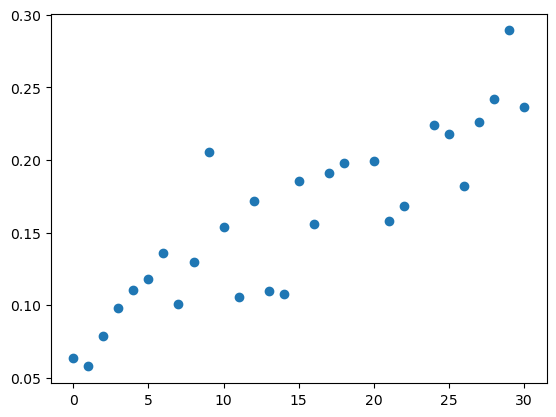

In [33]:
scatterplot_comparisson(df,"HeartDisease","PhysicalHealth")

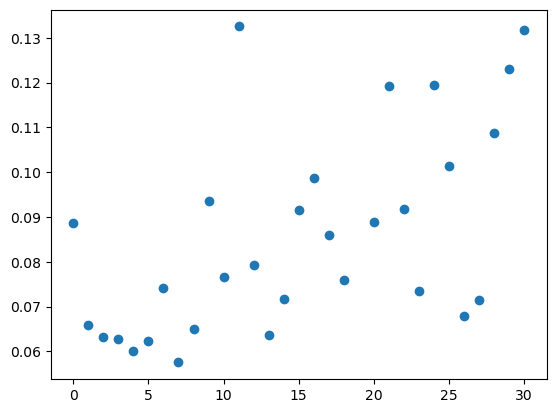

In [34]:
scatterplot_comparisson(df,"HeartDisease","MentalHealth")

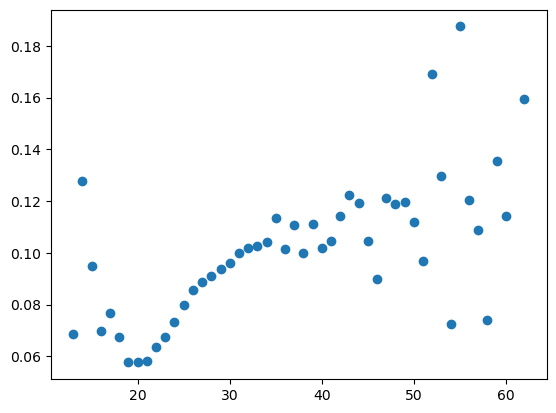

In [35]:
scatterplot_comparisson(df,"HeartDisease","BMI")

## Statistical Analysis

## Pre-Processing

In [36]:
cats = np.stack([df[cat].cat.codes.values for cat in col_categorical],1)
conts = np.stack([df[cont].values for cont in col_continuos],1)
binaries = np.stack([df[binary].values for binary in col_binary],1)

In [37]:
# Creating tensors
cats = torch.tensor(cats,dtype = torch.int64)
conts = torch.tensor(conts,dtype = torch.float)
binaries = torch.tensor(binaries,dtype = torch.int8)

In [38]:
#y = torch.tensor(df[y_col].values, dtype = torch.float).reshape(-1,1)
y = torch.tensor(df[y_col].values).flatten()

In [39]:
cat_szs = [len(df[cat].unique()) for cat in col_categorical]
emb_szs = [(size, min(50,(size + 1)//2)) for size in cat_szs]
print(emb_szs)

[(13, 7), (6, 3), (5, 3)]


## Build Model

In [40]:
class TabularModel(nn.Module):
    
    def __init__(self,emb_szs, n_cont,n_bin, out_szs, layers, p=0.5):
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        self.soft = nn.Softmax(dim=1)
        
        layerlist = []
        n_emb = sum([nf for ni,nf in emb_szs])
        n_in = n_emb + n_cont + n_bin
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.Sigmoid())
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
            
        layerlist.append(nn.Linear(layers[-1], out_szs))
        if out_szs == 1:
            layerlist.append(nn.Sigmoid())
        self.layers = nn.Sequential(*layerlist)
        
        
    def forward(self, x_cat, x_cont, x_bin):
        embeddings = []
        
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
    
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont,x_bin],1)
        x = self.layers(x)
        
        return x

## Train Model

In [41]:
import time
from sklearn.model_selection import train_test_split

### First Model

In [42]:
model_2o = TabularModel(emb_szs,conts.shape[1],binaries.shape[1],2,[100,200,100],p=0.4)
model_2o

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(13, 7)
    (1): Embedding(6, 3)
    (2): Embedding(5, 3)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (soft): Softmax(dim=1)
  (layers): Sequential(
    (0): Linear(in_features=27, out_features=100, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=200, bias=True)
    (5): Sigmoid()
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): Sigmoid()
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [43]:
# Parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2o.parameters(), lr = 0.001)

In [44]:
batch_size = len(cats)
test_size = int(batch_size * 0.7)

# Categorical variables
cat_train = cats[:test_size]
cat_test = cats[test_size:]
# Continuous variables
cont_train = conts[:test_size]
cont_test = conts[test_size:]
# Binary variables
bin_train = binaries[:test_size]
bin_test = binaries[test_size:]

# Ouput variable
y_train = y[:test_size]
y_test = y[test_size:]

In [45]:
start_time = time.time()

losses = []
epochs = 300

for i in range(epochs):
    
    y_pred = model_2o(cat_train, cont_train, bin_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    if i%10 == 0:
        print(f"Epoch {i} - loss: {loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f"\n\n_____________________________________________________________\n\n\nDuration: {duration//60} minutes")

Epoch 0 - loss: 0.8421288132667542
Epoch 10 - loss: 0.7061007618904114
Epoch 20 - loss: 0.6681346893310547
Epoch 30 - loss: 0.6388772130012512
Epoch 40 - loss: 0.6090061068534851
Epoch 50 - loss: 0.5747654438018799
Epoch 60 - loss: 0.534217119216919
Epoch 70 - loss: 0.4899897277355194
Epoch 80 - loss: 0.44517454504966736
Epoch 90 - loss: 0.4068007171154022
Epoch 100 - loss: 0.37484467029571533
Epoch 110 - loss: 0.3491533398628235
Epoch 120 - loss: 0.3303896486759186
Epoch 130 - loss: 0.31716975569725037
Epoch 140 - loss: 0.3068908452987671
Epoch 150 - loss: 0.29766833782196045
Epoch 160 - loss: 0.2923341989517212
Epoch 170 - loss: 0.28537505865097046
Epoch 180 - loss: 0.27973946928977966
Epoch 190 - loss: 0.2765953242778778
Epoch 200 - loss: 0.27370157837867737
Epoch 210 - loss: 0.2710590958595276
Epoch 220 - loss: 0.26813679933547974
Epoch 230 - loss: 0.26567158102989197
Epoch 240 - loss: 0.2642357349395752
Epoch 250 - loss: 0.26346060633659363
Epoch 260 - loss: 0.26093176007270813
Ep

In [46]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Text(0, 0.5, 'Cross Loss')

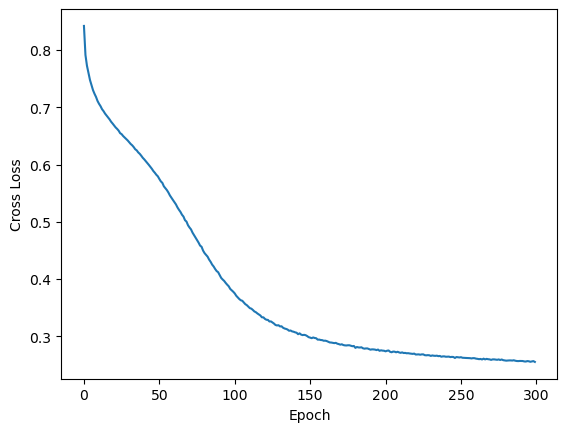

In [47]:
plt.plot(range(epochs),losses)
plt.xlabel("Epoch")
plt.ylabel("Cross Loss")

## Validate Model

In [48]:
with torch.no_grad():
    y_val = model_2o(cat_test,cont_test,bin_test)
    loss = criterion(y_val, y_test)
print(loss)

tensor(0.2565)


In [49]:
rows = len(y_val)
correct = 0
print(f'{"MODEL OUTPUT":26}\tARGMAX\tY_TEST')
for i in range(rows):
    print(f'{y_val[i]}\t{y_val[i].argmax()}\t{y_test[i]}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT              	ARGMAX	Y_TEST
tensor([ 1.8003, -1.3294])	0	0
tensor([ 0.7024, -2.2108])	0	0
tensor([ 1.3335, -0.6784])	0	0
tensor([ 2.4714, -1.2452])	0	0
tensor([ 1.3865, -1.6167])	0	0
tensor([ 2.8223, -2.4261])	0	0
tensor([ 3.5103, -1.9287])	0	0
tensor([ 2.1127, -1.0517])	0	0
tensor([ 0.7046, -0.4333])	0	0
tensor([-0.2107, -0.5330])	0	0
tensor([ 2.2920, -0.9491])	0	0
tensor([ 0.9149, -0.3683])	0	0
tensor([ 0.9961, -0.5132])	0	0
tensor([ 2.3037, -2.4678])	0	0
tensor([ 2.2517, -2.0198])	0	0
tensor([ 1.6084, -0.4170])	0	0
tensor([ 1.9817, -1.5820])	0	0
tensor([ 1.4425, -1.1102])	0	0
tensor([ 2.4539, -1.8307])	0	0
tensor([ 1.7360, -0.8469])	0	0
tensor([ 1.8519, -1.7965])	0	0
tensor([ 1.8015, -0.5111])	0	0
tensor([ 2.7604, -1.8976])	0	0
tensor([ 2.2878, -1.4961])	0	0
tensor([ 2.2673, -1.6619])	0	0
tensor([ 1.4287, -1.2937])	0	0
tensor([ 2.2262, -3.9778])	0	0
tensor([ 2.8491, -2.0913])	0	0
tensor([ 1.6665, -2.4075])	0	0
tensor([ 0.6880, -0.5388])	0	0
tensor([ 2.1281, -2.1581])	0	

tensor([ 1.7593, -0.9758])	0	0
tensor([ 1.0554, -0.9274])	0	0
tensor([ 1.6087, -0.5510])	0	0
tensor([ 2.6755, -1.9640])	0	0
tensor([ 2.1861, -1.7655])	0	0
tensor([ 2.1011, -1.5885])	0	0
tensor([ 1.9061, -1.0840])	0	0
tensor([ 0.5079, -0.2611])	0	1
tensor([ 1.2781, -1.1830])	0	0
tensor([ 1.0757, -0.7830])	0	0
tensor([ 3.3948, -2.5001])	0	1
tensor([ 0.6935, -0.3557])	0	0
tensor([ 2.2119, -1.1786])	0	0
tensor([ 0.8647, -1.4789])	0	0
tensor([ 2.1533, -2.8402])	0	0
tensor([ 2.0130, -2.1630])	0	0
tensor([ 2.4193, -1.7044])	0	0
tensor([ 1.3332, -2.0060])	0	0
tensor([ 1.1344, -0.5877])	0	0
tensor([ 3.9808, -2.2429])	0	0
tensor([ 1.5030, -1.3567])	0	0
tensor([ 2.5636, -1.5449])	0	0
tensor([ 1.3030, -1.3461])	0	0
tensor([ 1.5833, -0.7447])	0	0
tensor([ 1.9950, -3.2483])	0	0
tensor([ 1.1976, -1.3542])	0	0
tensor([ 1.3823, -1.0028])	0	0
tensor([ 2.7868, -1.1822])	0	0
tensor([ 4.1375, -3.6197])	0	0
tensor([ 1.4222, -0.8569])	0	1
tensor([ 3.2151, -1.8541])	0	0
tensor([ 2.7566, -1.5542])	0	0
tensor([

tensor([ 2.1342, -2.6875])	0	0
tensor([ 3.1199, -2.1410])	0	0
tensor([ 1.9931, -1.5742])	0	0
tensor([ 1.5001, -1.1676])	0	0
tensor([ 1.3346, -0.7852])	0	0
tensor([ 0.9328, -0.3880])	0	1
tensor([ 1.3896, -0.6223])	0	1
tensor([ 2.2545, -3.1945])	0	0
tensor([ 1.2403, -0.5762])	0	0
tensor([ 1.6841, -1.3784])	0	0
tensor([0.5454, 0.1807])	0	1
tensor([ 1.0653, -1.6121])	0	1
tensor([ 1.3792, -1.9556])	0	0
tensor([ 2.6754, -2.6279])	0	0
tensor([ 1.5993, -2.2544])	0	0
tensor([ 0.9835, -0.7995])	0	0
tensor([ 2.8687, -2.5060])	0	0
tensor([ 2.1763, -1.5651])	0	0
tensor([ 2.6703, -2.2622])	0	0
tensor([ 1.8716, -0.9901])	0	0
tensor([ 1.3994, -1.2213])	0	0
tensor([ 1.5700, -2.7498])	0	0
tensor([ 0.6599, -1.5131])	0	0
tensor([ 2.0292, -1.4468])	0	0
tensor([ 1.0265, -0.5243])	0	0
tensor([ 2.4978, -1.5977])	0	0
tensor([ 1.1457, -0.7864])	0	0
tensor([ 1.3996, -0.8093])	0	0
tensor([ 2.1269, -1.3010])	0	0
tensor([ 2.1630, -0.8212])	0	0
tensor([ 0.8260, -0.2646])	0	0
tensor([ 1.7873, -1.7607])	0	0
tensor([ 1

tensor([ 0.8150, -0.9755])	0	0
tensor([ 2.4176, -1.6920])	0	0
tensor([ 1.3996, -0.8793])	0	0
tensor([ 1.3981, -1.1888])	0	0
tensor([ 1.8461, -1.9902])	0	0
tensor([ 3.0729, -2.7832])	0	0
tensor([ 1.2913, -1.4671])	0	0
tensor([ 2.5331, -3.6155])	0	0
tensor([ 0.4605, -1.3964])	0	0
tensor([ 1.9200, -1.7003])	0	0
tensor([ 1.3545, -1.0457])	0	0
tensor([0.8684, 0.4234])	0	0
tensor([ 3.0811, -2.3325])	0	0
tensor([ 1.8186, -0.7482])	0	0
tensor([ 1.7842, -1.2703])	0	0
tensor([ 1.9512, -1.2456])	0	0
tensor([ 2.0817, -1.4452])	0	0
tensor([ 2.3680, -3.1222])	0	0
tensor([ 0.6645, -1.9053])	0	0
tensor([ 0.5177, -0.2306])	0	0
tensor([ 1.4041, -1.0935])	0	0
tensor([ 1.5773, -0.6342])	0	0
tensor([ 2.1693, -1.4599])	0	0
tensor([ 2.0021, -1.6261])	0	0
tensor([ 1.7391, -1.4154])	0	0
tensor([ 2.9401, -2.0282])	0	0
tensor([ 3.3570, -1.4539])	0	0
tensor([ 0.2861, -0.2534])	0	0
tensor([ 2.6619, -2.4378])	0	0
tensor([ 1.7496, -0.6485])	0	1
tensor([ 1.6931, -2.6350])	0	0
tensor([ 1.2318, -0.7026])	0	0
tensor([ 2

tensor([ 2.7382, -1.8094])	0	0
tensor([-0.1592,  0.4958])	1	1
tensor([ 2.0682, -0.7302])	0	0
tensor([ 1.8194, -1.9402])	0	0
tensor([ 2.1814, -2.0644])	0	0
tensor([ 2.7135, -1.3521])	0	0
tensor([ 0.4860, -0.2659])	0	0
tensor([ 1.0032, -0.6678])	0	1
tensor([ 2.1409, -1.3445])	0	0
tensor([ 0.4319, -0.8389])	0	0
tensor([ 2.8366, -2.6397])	0	0
tensor([ 1.1738, -0.8914])	0	0
tensor([ 1.5422, -1.7605])	0	0
tensor([ 1.0813, -0.7793])	0	0
tensor([ 0.5150, -0.0166])	0	0
tensor([ 2.7279, -2.0776])	0	0
tensor([ 2.0843, -1.7412])	0	0
tensor([ 3.5555, -1.8648])	0	0
tensor([ 1.3040, -0.8416])	0	0
tensor([0.0774, 0.2803])	1	0
tensor([ 1.3555, -1.0421])	0	0
tensor([ 0.7748, -0.2660])	0	0
tensor([ 2.9784, -1.7540])	0	0
tensor([ 1.5829, -0.2415])	0	1
tensor([ 2.6917, -2.7300])	0	0
tensor([ 2.4124, -1.7152])	0	0
tensor([ 0.0132, -0.9651])	0	0
tensor([ 2.6339, -1.2400])	0	0
tensor([ 1.4520, -0.9907])	0	0
tensor([ 1.7899, -0.2737])	0	0
tensor([ 2.3212, -1.2413])	0	0
tensor([ 2.0045, -2.4367])	0	0
tensor([ 1

tensor([-0.1362, -0.0088])	1	1
tensor([ 0.8889, -1.1172])	0	0
tensor([ 1.4869, -1.3317])	0	0
tensor([ 1.5460, -1.5117])	0	0
tensor([ 0.5624, -0.4382])	0	0
tensor([ 2.6086, -2.0971])	0	0
tensor([ 2.2389, -0.9410])	0	0
tensor([ 3.0891, -2.7693])	0	0
tensor([ 0.3308, -2.1685])	0	0
tensor([ 1.2289, -0.7731])	0	0
tensor([ 1.4187, -2.5193])	0	0
tensor([ 4.3500, -2.7680])	0	0
tensor([ 2.3489, -1.2860])	0	0
tensor([ 1.8622, -1.3118])	0	0
tensor([ 1.9725, -1.7938])	0	0
tensor([ 1.8733, -1.1840])	0	0
tensor([ 1.9840, -2.6961])	0	0
tensor([ 0.5844, -0.3995])	0	0
tensor([ 0.6845, -0.4094])	0	0
tensor([ 1.3691, -0.8024])	0	1
tensor([ 0.7083, -1.1908])	0	0
tensor([ 2.1156, -1.4032])	0	0
tensor([ 1.4509, -0.8485])	0	0
tensor([ 1.4604, -1.2138])	0	0
tensor([ 0.6816, -0.0515])	0	1
tensor([ 1.0277, -0.3128])	0	0
tensor([ 1.3653, -1.4728])	0	0
tensor([ 4.1721, -2.1075])	0	0
tensor([ 3.5359, -3.6066])	0	0
tensor([ 0.2757, -0.4032])	0	1
tensor([ 0.4834, -0.1256])	0	1
tensor([ 0.8220, -1.0187])	0	0
tensor([

tensor([ 2.7771, -2.4291])	0	0
tensor([ 0.5382, -0.5927])	0	0
tensor([ 1.6229, -0.8361])	0	0
tensor([ 1.5722, -0.7716])	0	0
tensor([ 1.2994, -0.4580])	0	1
tensor([ 3.4237, -2.0872])	0	0
tensor([ 1.3622, -0.8225])	0	0
tensor([ 1.7225, -0.8478])	0	0
tensor([ 1.1550, -1.3561])	0	0
tensor([ 3.8042, -2.1092])	0	0
tensor([ 1.7260, -1.0604])	0	0
tensor([ 0.8860, -0.9324])	0	0
tensor([-0.2641,  0.2828])	1	1
tensor([ 0.8956, -0.5295])	0	0
tensor([ 1.4263, -1.1511])	0	0
tensor([ 2.5625, -2.4732])	0	0
tensor([ 1.7071, -1.5742])	0	0
tensor([ 2.0672, -0.4351])	0	0
tensor([ 1.4892, -0.9244])	0	0
tensor([ 0.9818, -0.5932])	0	0
tensor([ 2.0365, -1.0958])	0	0
tensor([ 1.4371, -0.6774])	0	0
tensor([ 1.4557, -2.1286])	0	0
tensor([ 0.4472, -0.7921])	0	0
tensor([ 3.6530, -3.2067])	0	0
tensor([ 1.2907, -0.8239])	0	0
tensor([ 1.2385, -0.5292])	0	0
tensor([ 0.1486, -1.6102])	0	0
tensor([ 2.3318, -2.5139])	0	0
tensor([ 2.2952, -2.2282])	0	0
tensor([ 1.6001, -1.8954])	0	0
tensor([ 1.8235, -1.3722])	0	0
tensor([

tensor([ 1.7512, -1.3942])	0	0
tensor([ 0.8204, -0.1797])	0	0
tensor([ 1.2779, -0.3561])	0	1
tensor([ 1.2819, -2.8738])	0	0
tensor([ 1.3743, -1.4974])	0	0
tensor([ 1.4821, -1.0076])	0	0
tensor([ 1.1672, -0.7745])	0	0
tensor([ 1.0324, -2.0666])	0	0
tensor([ 2.5920, -2.6786])	0	0
tensor([ 1.8692, -1.2414])	0	0
tensor([ 2.1878, -1.3216])	0	0
tensor([ 1.2773, -2.6232])	0	0
tensor([ 1.6536, -1.7349])	0	0
tensor([ 1.6998, -1.3673])	0	0
tensor([ 1.3539, -1.4306])	0	0
tensor([ 2.3422, -1.4656])	0	0
tensor([ 1.9602, -1.2243])	0	0
tensor([ 1.2771, -1.2011])	0	0
tensor([ 0.3190, -0.1776])	0	1
tensor([ 3.3104, -2.3712])	0	0
tensor([ 3.0755, -2.3557])	0	0
tensor([ 2.6534, -1.9732])	0	0
tensor([ 1.8417, -2.7573])	0	0
tensor([ 1.5614, -1.5321])	0	0
tensor([ 0.9921, -0.5168])	0	0
tensor([ 1.6609, -0.9932])	0	0
tensor([ 0.9493, -0.8063])	0	0
tensor([ 1.3665, -1.4497])	0	0
tensor([ 0.4986, -0.4871])	0	0
tensor([ 1.0791, -1.0785])	0	0
tensor([ 1.1322, -1.2626])	0	0
tensor([ 1.8076, -1.9143])	0	0
tensor([

tensor([ 0.5797, -0.7898])	0	0
tensor([ 1.9657, -2.0250])	0	0
tensor([ 1.7342, -1.7321])	0	0
tensor([ 3.1261, -2.8869])	0	0
tensor([ 2.1064, -1.4748])	0	0
tensor([ 1.6609, -0.9814])	0	0
tensor([ 0.6082, -2.0123])	0	0
tensor([ 2.5376, -1.6948])	0	0
tensor([ 2.1190, -2.5507])	0	0
tensor([ 1.7978, -1.3761])	0	0
tensor([ 2.3681, -1.4172])	0	0
tensor([ 0.3339, -0.2486])	0	1
tensor([ 2.3635, -0.6954])	0	1
tensor([ 1.2881, -1.0803])	0	0
tensor([ 1.8848, -2.2114])	0	0
tensor([ 1.0703, -0.5302])	0	0
tensor([ 2.6144, -2.5976])	0	0
tensor([ 0.6668, -1.5064])	0	0
tensor([ 2.5035, -1.9332])	0	0
tensor([ 1.2183, -0.8919])	0	0
tensor([ 2.0155, -1.8377])	0	0
tensor([ 3.3183, -1.2877])	0	0
tensor([ 1.8605, -1.4957])	0	0
tensor([ 1.3068, -0.9219])	0	0
tensor([ 0.5825, -0.4202])	0	0
tensor([ 2.8336, -1.6976])	0	0
tensor([ 1.6250, -1.4070])	0	0
tensor([ 1.5573, -0.5291])	0	0
tensor([ 1.9832, -1.1334])	0	0
tensor([ 0.0903, -0.2908])	0	0
tensor([ 1.9590, -1.7637])	0	0
tensor([ 2.5235, -2.1008])	0	0
tensor([

tensor([ 1.3858, -1.5348])	0	0
tensor([ 1.4167, -1.7778])	0	0
tensor([ 1.2643, -1.0093])	0	0
tensor([ 2.0586, -1.4892])	0	0
tensor([0.5836, 0.1787])	0	0
tensor([ 3.6395, -2.9533])	0	0
tensor([ 1.8649, -1.1820])	0	1
tensor([ 1.9736, -2.0949])	0	0
tensor([ 3.1228, -1.4913])	0	0
tensor([ 0.8177, -0.5004])	0	0
tensor([ 0.9927, -0.0580])	0	1
tensor([ 2.0230, -1.2193])	0	0
tensor([ 1.6925, -0.8039])	0	0
tensor([ 1.2443, -1.8735])	0	0
tensor([ 2.1674, -2.0049])	0	0
tensor([ 1.5228, -0.6950])	0	0
tensor([ 1.3829, -1.2266])	0	0
tensor([ 1.4661, -1.7158])	0	0
tensor([ 1.9607, -1.6315])	0	0
tensor([ 1.9658, -1.8388])	0	0
tensor([ 2.4933, -2.2537])	0	0
tensor([ 1.6061, -0.9382])	0	0
tensor([ 2.3068, -1.0399])	0	0
tensor([ 2.3862, -0.7657])	0	0
tensor([ 2.5191, -1.0762])	0	0
tensor([-0.0223,  0.3671])	1	1
tensor([ 1.5644, -0.9769])	0	0
tensor([ 2.0449, -2.0537])	0	0
tensor([ 1.9317, -0.8590])	0	0
tensor([ 1.0982, -0.8660])	0	0
tensor([ 0.8092, -0.6371])	0	1
tensor([ 2.1717, -1.7706])	0	0
tensor([ 2

tensor([ 1.3540, -1.3480])	0	0
tensor([ 0.9412, -0.3725])	0	0
tensor([ 1.7270, -1.2194])	0	0
tensor([ 2.2199, -0.3781])	0	0
tensor([ 3.0020, -2.3461])	0	0
tensor([ 1.0120, -0.4873])	0	0
tensor([ 0.8400, -0.8575])	0	0
tensor([ 0.6433, -2.8554])	0	0
tensor([ 1.0438, -1.3806])	0	0
tensor([ 1.4872, -1.5866])	0	0
tensor([ 0.4336, -0.2291])	0	0
tensor([ 2.0321, -1.5015])	0	0
tensor([-0.0022, -0.3046])	0	0
tensor([ 1.5073, -1.3925])	0	0
tensor([ 0.8838, -0.3316])	0	0
tensor([ 0.6265, -0.2543])	0	0
tensor([ 1.9652, -1.4775])	0	0
tensor([ 1.7306, -1.8682])	0	0
tensor([ 0.9197, -2.3738])	0	0
tensor([ 1.8731, -3.0958])	0	0
tensor([ 2.2010, -1.2102])	0	0
tensor([ 2.2246, -1.4067])	0	0
tensor([ 0.8454, -0.4483])	0	1
tensor([ 2.8993, -2.2454])	0	1
tensor([ 0.8138, -0.7282])	0	0
tensor([ 0.6036, -0.7223])	0	0
tensor([ 3.7081, -3.0123])	0	0
tensor([ 2.3332, -1.4559])	0	0
tensor([ 1.6660, -2.1294])	0	0
tensor([ 1.6819, -2.1824])	0	0
tensor([-0.1816,  0.0953])	1	0
tensor([ 2.5193, -2.8099])	0	0
tensor([

tensor([ 1.5654, -1.6204])	0	0
tensor([ 3.1609, -2.3248])	0	0
tensor([ 1.2443, -1.0702])	0	0
tensor([ 2.1973, -1.9882])	0	0
tensor([ 1.9563, -0.5526])	0	0
tensor([ 1.3064, -0.8459])	0	0
tensor([ 1.7526, -1.3757])	0	0
tensor([ 1.3061, -0.9061])	0	0
tensor([ 2.2803, -0.9773])	0	0
tensor([ 1.6181, -1.5345])	0	0
tensor([ 2.1279, -1.1565])	0	0
tensor([ 0.7226, -0.3848])	0	1
tensor([ 1.2394, -0.5793])	0	0
tensor([ 2.1717, -1.2715])	0	0
tensor([ 2.3025, -2.4403])	0	0
tensor([ 1.2653, -0.8240])	0	0
tensor([ 1.4765, -0.4731])	0	1
tensor([ 2.1004, -1.5957])	0	0
tensor([ 2.6030, -1.3937])	0	0
tensor([ 1.9599, -2.6229])	0	0
tensor([ 1.5313, -2.1892])	0	0
tensor([ 1.6935, -1.5595])	0	0
tensor([ 1.0024, -0.1683])	0	0
tensor([ 1.1286, -0.8943])	0	0
tensor([ 1.5800, -1.1594])	0	0
tensor([ 2.2155, -1.3308])	0	0
tensor([ 1.3371, -0.4851])	0	1
tensor([ 2.3475, -2.2116])	0	0
tensor([ 1.0401, -0.9507])	0	0
tensor([ 1.4349, -1.0377])	0	0
tensor([ 0.7976, -1.0846])	0	0
tensor([ 1.6260, -1.4864])	0	0
tensor([

tensor([ 1.1927, -2.3959])	0	0
tensor([ 1.9129, -1.0906])	0	0
tensor([ 1.4196, -1.1826])	0	0
tensor([ 1.3551, -0.5359])	0	1
tensor([ 2.0076, -1.6777])	0	0
tensor([ 1.6245, -0.8068])	0	0
tensor([ 1.0624, -1.1520])	0	1
tensor([ 1.0437, -0.1936])	0	1
tensor([ 2.8140, -1.6428])	0	1
tensor([ 1.9488, -1.6035])	0	0
tensor([ 1.6933, -1.9015])	0	0
tensor([ 1.6713, -2.1731])	0	0
tensor([ 1.0680, -1.1380])	0	0
tensor([ 0.9644, -1.2665])	0	0
tensor([ 2.0550, -2.0378])	0	1
tensor([ 0.5883, -0.2808])	0	0
tensor([ 1.1650, -0.5736])	0	0
tensor([ 1.2356, -0.8392])	0	0
tensor([ 3.7575, -1.9001])	0	0
tensor([ 2.4312, -1.8989])	0	0
tensor([ 2.0729, -2.0461])	0	1
tensor([ 1.5085, -1.1841])	0	0
tensor([ 0.3782, -1.3285])	0	0
tensor([ 1.7278, -2.1361])	0	0
tensor([ 2.2809, -1.5012])	0	0
tensor([ 1.4481, -1.3139])	0	0
tensor([ 1.2310, -0.7978])	0	0
tensor([ 1.2652, -1.5567])	0	1
tensor([ 0.9921, -0.6057])	0	0
tensor([ 1.8954, -1.4016])	0	0
tensor([ 0.5323, -0.5763])	0	0
tensor([ 1.8772, -1.4395])	0	0
tensor([

tensor([ 1.2874, -0.9842])	0	0
tensor([ 1.9853, -1.3949])	0	0
tensor([ 2.6247, -1.9533])	0	0
tensor([ 1.5956, -2.2449])	0	1
tensor([ 0.4762, -0.2357])	0	0
tensor([ 0.7006, -0.1904])	0	0
tensor([ 0.9724, -0.2756])	0	0
tensor([ 2.3379, -1.8269])	0	0
tensor([ 2.1214, -1.5364])	0	0
tensor([ 2.2807, -0.4492])	0	0
tensor([ 2.5055, -2.2350])	0	0
tensor([ 0.2871, -0.1508])	0	1
tensor([ 1.6142, -0.9792])	0	0
tensor([ 0.9612, -1.0457])	0	0
tensor([ 2.0816, -2.1526])	0	0
tensor([ 2.6797, -2.7673])	0	0
tensor([ 0.7929, -1.0442])	0	0
tensor([ 1.4887, -1.4771])	0	0
tensor([ 0.9505, -0.9631])	0	0
tensor([-0.6454,  0.1590])	1	0
tensor([ 0.0482, -0.1877])	0	1
tensor([ 1.6611, -1.4736])	0	0
tensor([0.7976, 0.1796])	0	1
tensor([ 0.9465, -0.9756])	0	0
tensor([ 1.1480, -0.8576])	0	0
tensor([ 0.8553, -0.9508])	0	0
tensor([ 0.9033, -0.2828])	0	1
tensor([ 1.8306, -1.5697])	0	0
tensor([ 3.4928, -3.1124])	0	0
tensor([ 0.9133, -0.6169])	0	0
tensor([ 0.7099, -0.5189])	0	0
tensor([ 2.2310, -2.2587])	0	0
tensor([ 1

tensor([-0.1694,  0.3543])	1	0
tensor([ 1.8073, -1.7408])	0	0
tensor([ 0.6437, -0.3145])	0	1
tensor([ 3.2326, -3.4929])	0	0
tensor([ 3.0857, -3.0170])	0	0
tensor([ 1.7947, -1.3816])	0	0
tensor([ 1.6871, -1.2401])	0	0
tensor([ 1.4463, -0.9697])	0	0
tensor([ 1.0328, -0.5825])	0	0
tensor([ 3.2875, -1.3579])	0	0
tensor([ 2.1325, -2.5540])	0	0
tensor([ 1.6085, -1.0757])	0	0
tensor([ 1.0426, -1.3620])	0	0
tensor([ 2.1684, -1.6152])	0	0
tensor([ 1.3992, -1.7252])	0	0
tensor([ 0.7160, -1.6929])	0	0
tensor([ 1.2355, -1.4838])	0	0
tensor([ 1.7943, -1.3978])	0	0
tensor([ 2.5583, -1.1415])	0	0
tensor([ 0.6158, -1.9779])	0	0
tensor([ 1.7900, -1.4261])	0	0
tensor([ 1.6282, -1.4212])	0	0
tensor([ 1.7907, -1.5555])	0	0
tensor([ 2.2042, -2.0458])	0	0
tensor([ 1.8226, -0.9531])	0	0
tensor([ 3.2594, -2.4300])	0	0
tensor([ 1.8162, -1.9437])	0	0
tensor([ 1.5645, -0.8046])	0	0
tensor([-0.2168,  0.1518])	1	1
tensor([ 0.3638, -0.2703])	0	0
tensor([ 1.3574, -0.8286])	0	0
tensor([ 2.0320, -1.6477])	0	0
tensor([

tensor([ 2.4719, -1.1345])	0	0
tensor([ 1.9935, -1.8436])	0	0
tensor([ 1.2309, -2.1367])	0	0
tensor([ 2.6790, -0.8996])	0	0
tensor([0.1974, 0.1932])	0	0
tensor([ 1.6916, -0.5788])	0	0
tensor([ 2.4742, -2.0805])	0	0
tensor([ 1.0141, -1.9320])	0	1
tensor([ 1.6268, -1.8086])	0	1
tensor([ 1.8559, -1.9111])	0	0
tensor([ 0.3945, -0.6812])	0	0
tensor([ 1.9730, -2.6809])	0	0
tensor([ 2.3637, -2.6157])	0	0
tensor([ 1.8018, -1.1386])	0	0
tensor([ 0.3458, -1.0072])	0	0
tensor([ 2.6041, -1.4738])	0	0
tensor([ 3.1063, -2.5907])	0	0
tensor([ 1.5897, -1.4785])	0	0
tensor([ 2.9812, -1.3754])	0	0
tensor([ 1.6722, -1.2164])	0	0
tensor([ 2.6119, -1.4616])	0	0
tensor([ 1.3742, -1.9132])	0	0
tensor([ 2.8308, -2.8326])	0	0
tensor([ 1.2986, -0.0037])	0	0
tensor([ 1.4187, -2.0349])	0	0
tensor([ 2.2492, -3.1742])	0	0
tensor([ 0.8647, -0.3945])	0	0
tensor([ 1.0616, -0.8145])	0	0
tensor([ 1.0333, -0.6858])	0	0
tensor([ 0.9297, -0.9678])	0	0
tensor([ 1.1042, -0.6847])	0	0
tensor([ 0.8833, -0.4669])	0	0
tensor([ 3

tensor([ 2.3252, -1.9544])	0	0
tensor([ 2.2805, -2.0177])	0	0
tensor([ 3.3816, -2.9397])	0	0
tensor([ 1.8071, -0.9572])	0	0
tensor([ 1.7186, -1.6399])	0	0
tensor([ 1.7371, -1.6700])	0	0
tensor([ 1.0926, -2.4489])	0	0
tensor([ 2.2398, -1.5149])	0	0
tensor([ 1.0335, -2.3117])	0	0
tensor([ 0.4678, -1.0022])	0	0
tensor([ 0.6038, -2.1998])	0	0
tensor([ 0.4026, -0.3911])	0	0
tensor([ 2.4343, -2.9584])	0	0
tensor([ 1.4242, -0.6894])	0	1
tensor([ 1.7606, -0.9909])	0	0
tensor([ 1.3601, -1.0389])	0	0
tensor([ 2.4673, -3.0975])	0	0
tensor([ 3.3225, -1.7869])	0	0
tensor([ 1.3228, -0.4032])	0	0
tensor([ 1.5778, -1.4493])	0	0
tensor([ 1.7867, -1.0948])	0	0
tensor([ 0.9928, -0.6305])	0	0
tensor([ 2.3157, -3.5087])	0	0
tensor([ 1.0167, -0.5978])	0	1
tensor([ 1.5128, -0.6078])	0	0
tensor([ 1.8159, -2.4456])	0	0
tensor([ 1.6473, -2.1518])	0	0
tensor([ 1.0783, -0.2261])	0	0
tensor([ 2.1543, -1.5889])	0	0
tensor([ 1.2841, -1.3067])	0	0
tensor([ 1.7196, -0.5113])	0	0
tensor([ 2.0286, -2.4233])	0	0
tensor([

tensor([ 1.8816, -1.8877])	0	0
tensor([ 1.8714, -1.1019])	0	0
tensor([ 1.4264, -1.2167])	0	0
tensor([ 2.2732, -2.2053])	0	0
tensor([ 0.7264, -0.9016])	0	0
tensor([ 1.9751, -1.4835])	0	0
tensor([ 1.0973, -2.0861])	0	0
tensor([ 1.2475, -1.1513])	0	0
tensor([ 1.6715, -2.0011])	0	0
tensor([ 1.9210, -2.1296])	0	0
tensor([ 2.9531, -3.2256])	0	0
tensor([ 2.3526, -1.4554])	0	0
tensor([ 2.4413, -1.3691])	0	0
tensor([ 1.1360, -0.6147])	0	0
tensor([ 1.3270, -1.2690])	0	0
tensor([ 1.6791, -2.1169])	0	0
tensor([1.0728, 0.1449])	0	1
tensor([ 0.0700, -0.2595])	0	1
tensor([0.0871, 0.0090])	0	1
tensor([ 1.2225, -2.6516])	0	0
tensor([-0.0095, -0.9082])	0	0
tensor([ 2.2302, -2.4974])	0	0
tensor([ 2.2207, -1.2401])	0	0
tensor([ 0.5851, -0.0617])	0	0
tensor([ 0.4797, -2.5939])	0	0
tensor([ 0.3956, -0.5161])	0	0
tensor([ 1.5874, -1.1034])	0	0
tensor([0.0161, 0.0424])	1	1
tensor([ 2.1707, -1.7659])	0	0
tensor([ 1.2253, -0.9593])	0	0
tensor([-0.5396,  0.0493])	1	0
tensor([ 2.0111, -1.2565])	0	0
tensor([ 1.238

tensor([ 1.2368, -0.9441])	0	0
tensor([ 2.1638, -1.3667])	0	1
tensor([ 1.9050, -1.0260])	0	0
tensor([ 1.0527, -0.9054])	0	0
tensor([ 1.9936, -2.4469])	0	0
tensor([ 0.7375, -0.7774])	0	0
tensor([ 1.0866, -0.6008])	0	0
tensor([ 1.9036, -0.8516])	0	0
tensor([ 2.0822, -1.1389])	0	0
tensor([ 1.5714, -1.4165])	0	0
tensor([ 2.6614, -1.9532])	0	0
tensor([ 1.4271, -0.8987])	0	0
tensor([-0.2415, -0.0253])	1	1
tensor([ 0.8676, -1.0425])	0	0
tensor([ 0.6493, -1.0881])	0	0
tensor([ 0.2370, -0.0827])	0	0
tensor([ 0.6695, -0.9244])	0	0
tensor([ 0.6293, -0.4221])	0	0
tensor([ 1.4702, -0.7346])	0	0
tensor([ 0.8103, -1.2455])	0	0
tensor([ 0.5699, -0.4536])	0	0
tensor([ 1.0214, -0.2298])	0	0
tensor([ 1.5010, -0.6875])	0	0
tensor([ 2.1632, -1.1484])	0	0
tensor([ 0.8613, -1.1141])	0	0
tensor([ 2.1254, -1.9263])	0	0
tensor([ 1.0308, -0.6889])	0	0
tensor([ 0.8907, -0.6379])	0	0
tensor([ 1.2746, -0.7353])	0	1
tensor([ 1.9186, -2.5576])	0	0
tensor([ 1.3685, -1.2044])	0	0
tensor([ 1.0626, -0.6514])	0	0
tensor([

tensor([ 1.0392, -0.3821])	0	0
tensor([ 1.6171, -1.3680])	0	0
tensor([ 0.0999, -1.0053])	0	0
tensor([ 2.7881, -2.4631])	0	0
tensor([ 1.3040, -1.1272])	0	0
tensor([ 1.1830, -0.4444])	0	0
tensor([ 3.2144, -3.2523])	0	0
tensor([ 1.4502, -1.0343])	0	0
tensor([ 2.0431, -1.0112])	0	0
tensor([ 0.1906, -0.2368])	0	0
tensor([ 1.5276, -1.0027])	0	0
tensor([ 1.6712, -0.9262])	0	0
tensor([ 0.7199, -0.6182])	0	0
tensor([ 1.6691, -1.3888])	0	0
tensor([ 1.3294, -0.9464])	0	1
tensor([ 2.4252, -2.3253])	0	0
tensor([ 1.2609, -1.3959])	0	1
tensor([ 1.0695, -0.8704])	0	0
tensor([ 1.4151, -1.1671])	0	0
tensor([ 1.3387, -0.6745])	0	0
tensor([ 2.1268, -1.7718])	0	0
tensor([-0.0126,  0.0089])	1	0
tensor([ 2.0196, -1.1861])	0	0
tensor([ 0.8796, -1.2427])	0	1
tensor([ 1.0234, -0.9967])	0	0
tensor([ 1.2362, -1.3006])	0	0
tensor([ 0.5964, -0.5070])	0	0
tensor([ 2.5693, -1.8900])	0	0
tensor([ 1.4380, -1.4130])	0	1
tensor([ 1.5876, -0.4318])	0	0
tensor([ 0.8347, -0.6565])	0	1
tensor([-0.0161, -1.5257])	0	1
tensor([

tensor([ 1.1612, -1.3717])	0	0
tensor([ 1.4955, -1.5051])	0	0
tensor([ 1.1882, -0.9198])	0	0
tensor([ 1.5679, -1.9348])	0	0
tensor([ 2.8506, -1.5179])	0	0
tensor([ 1.7990, -1.1988])	0	0
tensor([ 1.6605, -2.4364])	0	0
tensor([ 1.5406, -1.3601])	0	0
tensor([ 0.9073, -0.3988])	0	0
tensor([ 1.5572, -1.0584])	0	0
tensor([ 1.5212, -0.7912])	0	0
tensor([ 1.6219, -0.8265])	0	0
tensor([ 1.5108, -1.6621])	0	0
tensor([ 1.3799, -0.9822])	0	0
tensor([ 1.5696, -1.1272])	0	0
tensor([ 1.2438, -1.0419])	0	1
tensor([ 1.9909, -1.1825])	0	0
tensor([ 2.2160, -2.7954])	0	0
tensor([ 3.0533, -2.0279])	0	0
tensor([ 2.5762, -3.1035])	0	0
tensor([ 2.4482, -1.7604])	0	0
tensor([ 1.4876, -0.6659])	0	0
tensor([ 1.4782, -0.8673])	0	0
tensor([ 0.9283, -0.8964])	0	0
tensor([ 2.4560, -2.0322])	0	0
tensor([ 2.7032, -1.5543])	0	0
tensor([ 1.5312, -0.8700])	0	1
tensor([ 1.5556, -1.2841])	0	0
tensor([ 2.5582, -1.3595])	0	0
tensor([ 0.7306, -0.2067])	0	0
tensor([ 1.6539, -1.4204])	0	0
tensor([ 2.5970, -1.1541])	0	0
tensor([

tensor([ 2.7392, -3.6172])	0	0
tensor([ 2.9444, -2.2642])	0	0
tensor([ 0.4645, -0.4630])	0	0
tensor([ 1.2807, -1.0620])	0	0
tensor([ 2.7772, -2.2455])	0	0
tensor([ 1.8919, -1.4189])	0	0
tensor([ 1.8838, -1.2793])	0	0
tensor([ 3.5377, -2.1867])	0	0
tensor([ 1.4736, -0.8261])	0	0
tensor([ 1.9055, -0.8262])	0	0
tensor([ 0.4430, -0.1846])	0	0
tensor([ 3.9899, -2.4502])	0	0
tensor([ 2.5485, -1.4147])	0	0
tensor([ 0.8467, -0.9423])	0	0
tensor([ 3.2520, -2.0385])	0	0
tensor([ 0.4654, -0.7084])	0	0
tensor([ 2.0655, -0.1109])	0	0
tensor([ 1.3612, -1.4048])	0	0
tensor([ 1.7046, -0.9900])	0	1
tensor([ 1.8020, -1.6777])	0	0
tensor([ 0.9121, -0.5532])	0	0
tensor([ 2.6994, -1.7514])	0	0
tensor([ 1.6813, -1.7038])	0	0
tensor([ 0.7922, -0.3453])	0	0
tensor([ 4.3375, -2.2111])	0	0
tensor([ 1.1999, -1.6179])	0	0
tensor([ 1.3666, -1.5620])	0	0
tensor([ 2.0931, -2.3716])	0	0
tensor([ 1.5475, -1.8402])	0	0
tensor([ 0.4180, -1.7381])	0	0
tensor([ 1.9908, -1.1604])	0	0
tensor([ 1.3043, -1.2425])	0	0
tensor([

tensor([ 1.3751, -0.8600])	0	0
tensor([ 2.3230, -1.4836])	0	0
tensor([ 1.2266, -0.8738])	0	0
tensor([ 2.4888, -0.8129])	0	0
tensor([ 2.4580, -2.0621])	0	0
tensor([ 1.3842, -1.5226])	0	0
tensor([ 1.6172, -0.8443])	0	0
tensor([ 1.4986, -0.8703])	0	0
tensor([ 1.3296, -0.9447])	0	1
tensor([ 2.7879, -1.3396])	0	0
tensor([ 1.5047, -1.0190])	0	0
tensor([ 1.2025, -2.2881])	0	0
tensor([ 1.1562, -0.9265])	0	0
tensor([ 2.8419, -2.9460])	0	0
tensor([ 4.0634, -1.5197])	0	0
tensor([ 1.2247, -0.9042])	0	0
tensor([ 1.8726, -1.9476])	0	0
tensor([ 2.0813, -0.8071])	0	0
tensor([ 1.6602, -1.1165])	0	0
tensor([ 1.0627, -0.4680])	0	0
tensor([ 3.1438, -2.3974])	0	0
tensor([ 1.6357, -0.6916])	0	0
tensor([ 2.1967, -1.4385])	0	0
tensor([ 1.5154, -0.4956])	0	0
tensor([ 1.6294, -0.8767])	0	0
tensor([0.0175, 0.6174])	1	0
tensor([ 2.4258, -1.3572])	0	0
tensor([ 2.1484, -2.3920])	0	0
tensor([ 1.6967, -1.9728])	0	0
tensor([ 1.9555, -1.6079])	0	0
tensor([ 1.8623, -1.9459])	0	0
tensor([ 1.0606, -1.4400])	0	0
tensor([ 1

tensor([ 2.3569, -1.2654])	0	0
tensor([ 1.8918, -1.4159])	0	0
tensor([ 1.6710, -1.0328])	0	0
tensor([ 0.7400, -0.9382])	0	0
tensor([ 1.4869, -1.1529])	0	0
tensor([ 1.2171, -1.0908])	0	0
tensor([0.6357, 0.0719])	0	1
tensor([ 2.9803, -2.0217])	0	0
tensor([ 2.0456, -1.9496])	0	0
tensor([ 2.9133, -1.6402])	0	0
tensor([ 1.0829, -0.4412])	0	0
tensor([ 0.8811, -0.9338])	0	0
tensor([ 0.8233, -0.1616])	0	0
tensor([ 2.5523, -2.1744])	0	0
tensor([ 0.9405, -0.9829])	0	0
tensor([ 2.4192, -2.3052])	0	0
tensor([ 0.8979, -0.6421])	0	0
tensor([ 3.4472, -2.7976])	0	0
tensor([ 0.6689, -0.8298])	0	0
tensor([ 1.6476, -0.8632])	0	0
tensor([ 2.0773, -2.9544])	0	0
tensor([ 0.9086, -0.1661])	0	0
tensor([ 2.9036, -1.6851])	0	0
tensor([ 0.4220, -0.2638])	0	0
tensor([ 1.4922, -1.3963])	0	0
tensor([ 1.3710, -1.4221])	0	0
tensor([ 1.6470, -1.0847])	0	0
tensor([ 2.1702, -2.6448])	0	0
tensor([ 1.0944, -2.1169])	0	0
tensor([ 2.3928, -1.5687])	0	0
tensor([ 2.4295, -0.8192])	0	0
tensor([ 1.2897, -0.5355])	0	0
tensor([ 2

tensor([ 1.4569, -1.1192])	0	0
tensor([-0.2898, -0.8327])	0	0
tensor([ 1.7279, -1.4676])	0	0
tensor([ 2.3253, -1.8206])	0	0
tensor([ 2.5188, -2.9986])	0	0
tensor([ 0.5797, -0.3892])	0	0
tensor([ 1.6099, -0.9528])	0	0
tensor([ 2.4668, -2.0223])	0	0
tensor([ 2.1374, -1.8045])	0	0
tensor([ 2.9486, -2.2048])	0	0
tensor([ 1.9728, -1.4561])	0	0
tensor([ 3.3039, -1.9464])	0	0
tensor([ 1.3503, -0.1915])	0	1
tensor([ 1.5889, -1.4484])	0	0
tensor([ 1.8348, -2.1007])	0	0
tensor([ 3.4821, -2.7443])	0	0
tensor([ 2.8008, -2.2427])	0	0
tensor([ 2.7602, -3.1018])	0	0
tensor([ 2.2563, -1.9162])	0	0
tensor([ 1.0619, -0.6429])	0	0
tensor([ 3.6186, -2.5427])	0	0
tensor([ 1.6563, -1.0259])	0	0
tensor([ 0.6025, -0.1856])	0	0
tensor([ 3.1372, -1.9860])	0	0
tensor([ 1.5759, -0.9226])	0	0
tensor([ 2.0116, -1.0013])	0	0
tensor([ 0.9635, -2.6802])	0	0
tensor([ 1.4043, -1.0925])	0	0
tensor([ 2.9403, -2.2129])	0	0
tensor([ 3.4954, -2.7817])	0	0
tensor([ 2.5691, -2.7315])	0	0
tensor([ 1.6062, -1.6601])	0	0
tensor([

tensor([ 1.8634, -1.5724])	0	0
tensor([ 0.6571, -0.9435])	0	0
tensor([ 1.1315, -0.8692])	0	0
tensor([ 1.1822, -0.8029])	0	0
tensor([ 2.2868, -2.3772])	0	0
tensor([ 3.5414, -2.5323])	0	0
tensor([ 1.5948, -0.3596])	0	0
tensor([ 0.8926, -0.3908])	0	1
tensor([ 1.4663, -0.9268])	0	0
tensor([ 0.9615, -1.3484])	0	0
tensor([ 1.9609, -1.5671])	0	0
tensor([ 1.6567, -2.2704])	0	0
tensor([ 1.9664, -2.1683])	0	0
tensor([ 1.8515, -1.7171])	0	0
tensor([ 2.5676, -1.2967])	0	0
tensor([ 1.3613, -1.6252])	0	0
tensor([ 2.4144, -1.6407])	0	0
tensor([ 2.4355, -1.8615])	0	0
tensor([ 2.1396, -1.3092])	0	0
tensor([ 1.0793, -1.3604])	0	0
tensor([ 0.6332, -0.5371])	0	1
tensor([ 1.8300, -1.3652])	0	0
tensor([ 2.2204, -1.4998])	0	0
tensor([ 0.3172, -0.2353])	0	1
tensor([ 1.0286, -0.6888])	0	1
tensor([ 1.3394, -1.0078])	0	0
tensor([ 1.5168, -1.2928])	0	0
tensor([-0.0205, -0.0045])	1	1
tensor([ 1.2159, -0.9043])	0	0
tensor([ 1.2593, -1.1427])	0	0
tensor([ 2.0617, -1.3137])	0	0
tensor([ 0.7818, -0.7263])	0	0
tensor([

tensor([ 1.2489, -1.1235])	0	0
tensor([ 0.4839, -0.6315])	0	1
tensor([ 0.8124, -0.5373])	0	0
tensor([ 1.4670, -0.7779])	0	0
tensor([ 1.5970, -0.8943])	0	0
tensor([ 0.9882, -0.6903])	0	0
tensor([ 0.6264, -0.4828])	0	0
tensor([ 1.9578, -1.2876])	0	1
tensor([ 1.4321, -0.9496])	0	0
tensor([ 1.1845, -0.5129])	0	0
tensor([ 0.8416, -1.0538])	0	1
tensor([ 0.9857, -1.6860])	0	0
tensor([ 1.3404, -1.0587])	0	0
tensor([ 0.6747, -0.2789])	0	0
tensor([-0.3301,  0.0132])	1	0
tensor([ 1.9270, -1.2499])	0	0
tensor([ 0.7002, -1.3930])	0	0
tensor([ 2.1979, -1.6245])	0	1
tensor([-0.4631,  0.0842])	1	0
tensor([ 0.5846, -0.6077])	0	0
tensor([0.3282, 0.0840])	0	0
tensor([ 0.4345, -0.4239])	0	1
tensor([ 0.7376, -0.3205])	0	0
tensor([ 2.2505, -1.8976])	0	0
tensor([ 1.0697, -1.1409])	0	1
tensor([ 1.7380, -1.6777])	0	0
tensor([ 1.1029, -0.8789])	0	0
tensor([ 1.0466, -0.6215])	0	0
tensor([ 0.7273, -0.0562])	0	0
tensor([ 0.8273, -0.8072])	0	1
tensor([ 1.1794, -0.6105])	0	0
tensor([ 3.0691, -2.3874])	0	0
tensor([ 1

tensor([ 2.4057, -3.2123])	0	0
tensor([ 0.8210, -0.2355])	0	1
tensor([ 2.0694, -2.4348])	0	0
tensor([ 2.7798, -2.7217])	0	0
tensor([ 2.0931, -1.1836])	0	0
tensor([ 1.8433, -1.1337])	0	0
tensor([ 2.7583, -1.9212])	0	0
tensor([ 0.9607, -0.8936])	0	0
tensor([ 3.5234, -2.1442])	0	0
tensor([ 1.8763, -1.0743])	0	0
tensor([ 2.6275, -1.7814])	0	0
tensor([ 1.4895, -1.3791])	0	0
tensor([ 1.8626, -0.9013])	0	0
tensor([ 1.4577, -0.9585])	0	0
tensor([ 1.2481, -1.0979])	0	0
tensor([ 1.2281, -1.4371])	0	0
tensor([ 1.0394, -0.8919])	0	0
tensor([ 2.2153, -2.5902])	0	0
tensor([ 2.6595, -1.3473])	0	0
tensor([ 2.1648, -2.1476])	0	0
tensor([ 0.5087, -0.1272])	0	1
tensor([ 2.4437, -2.3094])	0	0
tensor([ 2.0691, -0.6186])	0	0
tensor([ 3.0246, -2.8699])	0	0
tensor([ 1.9352, -0.6008])	0	0
tensor([ 2.2485, -0.8123])	0	0
tensor([ 1.4352, -1.2920])	0	0
tensor([ 2.7230, -2.3927])	0	0
tensor([ 2.1368, -1.4192])	0	0
tensor([ 2.3678, -1.8857])	0	0
tensor([ 1.8477, -1.4346])	0	0
tensor([ 1.9902, -1.2898])	0	0
tensor([

tensor([ 1.2493, -1.3577])	0	0
tensor([ 0.5663, -1.0782])	0	0
tensor([ 1.2858, -1.3979])	0	0
tensor([ 1.9351, -1.8176])	0	0
tensor([ 0.8986, -0.6197])	0	0
tensor([ 1.6137, -2.1451])	0	0
tensor([ 0.9025, -0.2312])	0	0
tensor([ 1.9589, -2.2878])	0	0
tensor([ 2.5865, -1.8934])	0	0
tensor([ 3.9155, -4.2224])	0	0
tensor([ 1.2780, -1.1617])	0	0
tensor([ 2.3706, -1.9786])	0	0
tensor([ 1.6069, -1.2917])	0	0
tensor([ 1.3767, -1.3013])	0	0
tensor([ 1.3077, -1.2688])	0	0
tensor([ 0.8959, -0.7422])	0	0
tensor([ 0.6044, -0.8277])	0	0
tensor([ 1.1643, -1.8729])	0	0
tensor([ 0.6352, -0.3970])	0	1
tensor([ 1.0257, -1.3465])	0	0
tensor([ 1.8167, -2.4474])	0	0
tensor([ 1.4927, -1.2026])	0	0
tensor([ 0.9610, -0.6319])	0	0
tensor([ 1.9400, -1.7592])	0	0
tensor([ 0.5295, -0.4533])	0	0
tensor([ 1.1304, -1.0459])	0	0
tensor([ 2.1205, -0.7784])	0	0
tensor([ 2.5427, -2.5821])	0	0
tensor([ 0.3239, -0.4038])	0	1
tensor([ 1.3236, -1.6177])	0	0
tensor([ 1.2992, -1.4695])	0	0
tensor([ 1.4675, -1.1865])	0	0
tensor([

tensor([ 1.1200, -0.6763])	0	0
tensor([ 1.6967, -1.3206])	0	0
tensor([ 3.5147, -2.9064])	0	0
tensor([ 2.1292, -1.3712])	0	0
tensor([ 1.8268, -0.9980])	0	0
tensor([ 1.5064, -0.4876])	0	0
tensor([ 1.2211, -2.2373])	0	1
tensor([ 2.8078, -2.4185])	0	0
tensor([ 3.0117, -2.6036])	0	0
tensor([ 0.3993, -1.0951])	0	0
tensor([ 2.3958, -1.5440])	0	0
tensor([ 1.8139, -1.2908])	0	1
tensor([ 1.5851, -0.9472])	0	0
tensor([ 1.9343, -0.9366])	0	0
tensor([ 2.0252, -1.1880])	0	1
tensor([ 1.3933, -1.1324])	0	0
tensor([ 1.4037, -1.2286])	0	0
tensor([ 1.7198, -1.2358])	0	0
tensor([0.2332, 0.7435])	1	0
tensor([ 2.4564, -1.8299])	0	0
tensor([ 2.1517, -2.1008])	0	0
tensor([ 0.0137, -0.3427])	0	0
tensor([ 0.8440, -0.9381])	0	0
tensor([ 2.2289, -2.0302])	0	0
tensor([ 1.5146, -0.9282])	0	0
tensor([ 1.8250, -1.0480])	0	0
tensor([ 1.7743, -1.4219])	0	0
tensor([ 2.3004, -1.7677])	0	0
tensor([ 4.8972, -3.0131])	0	0
tensor([ 1.0555, -0.5103])	0	0
tensor([ 2.1228, -1.3923])	0	0
tensor([ 1.7585, -1.0551])	0	0
tensor([ 1

tensor([ 2.3049, -1.2972])	0	0
tensor([ 1.9684, -2.3365])	0	0
tensor([ 1.4639, -0.8905])	0	0
tensor([ 2.9421, -3.8415])	0	0
tensor([-0.0985, -0.5531])	0	0
tensor([ 1.7249, -1.1663])	0	0
tensor([ 2.3173, -1.6544])	0	0
tensor([ 2.5896, -1.7802])	0	0
tensor([ 1.6935, -1.8086])	0	0
tensor([ 2.1957, -1.7333])	0	0
tensor([ 1.1670, -1.2575])	0	0
tensor([ 0.5020, -0.7528])	0	0
tensor([ 1.5740, -2.9204])	0	0
tensor([ 0.8285, -0.8940])	0	0
tensor([ 2.7684, -2.7923])	0	0
tensor([ 1.2354, -0.7954])	0	0
tensor([ 1.0915, -0.8761])	0	0
tensor([ 3.5959, -2.4241])	0	0
tensor([ 2.3812, -1.5381])	0	0
tensor([ 1.0485, -0.8718])	0	0
tensor([ 2.2495, -2.1895])	0	0
tensor([ 1.4799, -2.2207])	0	0
tensor([ 2.0914, -0.8408])	0	0
tensor([ 0.3978, -0.3937])	0	0
tensor([ 3.6422, -1.0616])	0	0
tensor([ 2.4221, -1.7351])	0	0
tensor([ 1.6433, -1.8450])	0	1
tensor([ 2.5429, -2.1054])	0	0
tensor([ 2.5963, -1.7675])	0	0
tensor([ 3.1102, -3.4313])	0	0
tensor([0.6268, 0.3798])	0	1
tensor([ 2.4745, -1.5800])	0	0
tensor([ 0

tensor([ 1.4305, -0.9925])	0	0
tensor([ 1.4378, -1.1941])	0	0
tensor([ 1.8449, -1.2574])	0	0
tensor([ 2.1772, -1.5622])	0	0
tensor([ 1.2483, -1.2551])	0	0
tensor([ 1.3026, -0.3450])	0	0
tensor([ 0.5490, -1.3258])	0	0
tensor([ 1.3641, -1.2527])	0	0
tensor([ 1.4996, -1.2617])	0	0
tensor([ 1.5646, -1.1121])	0	0
tensor([ 1.8261, -0.3420])	0	0
tensor([ 0.5122, -0.4316])	0	0
tensor([ 0.7008, -1.9470])	0	0
tensor([ 2.4019, -1.0022])	0	0
tensor([0.3501, 0.0501])	0	1
tensor([ 2.1874, -1.6768])	0	0
tensor([ 3.0276, -2.4047])	0	0
tensor([ 2.0072, -1.0402])	0	0
tensor([ 2.1976, -1.4089])	0	0
tensor([ 0.6146, -0.5089])	0	1
tensor([ 2.4647, -1.3675])	0	0
tensor([ 0.8630, -1.2827])	0	0
tensor([ 4.4873, -3.6117])	0	0
tensor([ 2.7656, -1.5628])	0	0
tensor([ 1.8268, -2.1390])	0	0
tensor([ 1.9511, -0.9795])	0	0
tensor([ 2.2342, -1.4964])	0	0
tensor([ 2.2762, -2.3936])	0	0
tensor([ 1.0779, -1.0087])	0	0
tensor([ 1.4688, -1.3317])	0	0
tensor([ 0.7621, -1.3561])	0	0
tensor([ 0.9528, -1.2068])	0	0
tensor([ 2

tensor([ 1.5215, -1.4233])	0	0
tensor([ 1.0165, -0.3302])	0	0
tensor([ 0.0992, -0.4693])	0	1
tensor([ 0.2631, -0.0669])	0	0
tensor([ 1.2760, -0.6919])	0	0
tensor([ 0.7072, -1.4436])	0	0
tensor([ 3.2370, -2.2256])	0	0
tensor([ 1.9989, -1.6870])	0	0
tensor([ 0.7423, -2.3979])	0	0
tensor([ 1.6552, -1.4765])	0	0
tensor([ 0.3345, -0.1166])	0	0
tensor([ 0.9045, -1.0331])	0	0
tensor([-0.1580, -0.2849])	0	0
tensor([ 1.7961, -1.0364])	0	0
tensor([ 1.8172, -1.5034])	0	0
tensor([ 1.8782, -0.1044])	0	0
tensor([ 1.1061, -0.7482])	0	0
tensor([ 2.7039, -3.2686])	0	0
tensor([ 1.8089, -1.4412])	0	0
tensor([ 1.3342, -0.8300])	0	0
tensor([ 0.9796, -0.4606])	0	1
tensor([ 1.3035, -2.1523])	0	0
tensor([ 1.6510, -1.1760])	0	0
tensor([ 2.7346, -2.3185])	0	0
tensor([ 1.1914, -0.9073])	0	0
tensor([ 2.3319, -1.2976])	0	0
tensor([ 1.1744, -0.6685])	0	0
tensor([ 4.8847, -2.9083])	0	0
tensor([ 3.0416, -3.4745])	0	0
tensor([ 1.4457, -1.8999])	0	0
tensor([ 1.9300, -1.2386])	0	0
tensor([ 1.0860, -0.8887])	0	1
tensor([

tensor([ 0.6924, -0.5111])	0	0
tensor([ 1.9263, -1.2361])	0	0
tensor([ 1.1300, -1.0148])	0	0
tensor([ 1.5258, -1.6846])	0	0
tensor([ 2.4961, -1.7201])	0	0
tensor([ 0.7265, -1.2964])	0	0
tensor([ 1.2100, -1.0700])	0	0
tensor([ 1.9540, -2.2345])	0	0
tensor([0.4239, 0.3444])	0	1
tensor([ 1.8032, -0.8498])	0	0
tensor([ 1.4339, -0.7737])	0	0
tensor([ 2.1653, -1.0412])	0	0
tensor([ 1.5697, -1.8880])	0	0
tensor([ 1.1465, -0.2755])	0	0
tensor([ 1.0778, -1.1407])	0	0
tensor([ 0.6919, -0.6049])	0	0
tensor([0.1848, 0.4266])	1	1
tensor([ 0.4990, -0.6497])	0	0
tensor([ 0.9181, -1.3572])	0	0
tensor([ 1.1350, -1.8360])	0	0
tensor([ 1.0767, -0.4619])	0	0
tensor([ 0.8082, -0.6082])	0	0
tensor([ 1.6957, -0.8746])	0	0
tensor([ 1.9186, -1.0760])	0	0
tensor([ 1.1829, -0.0675])	0	0
tensor([ 1.5231, -0.7952])	0	1
tensor([ 2.0709, -1.4106])	0	0
tensor([ 1.9973, -1.6271])	0	0
tensor([ 1.0364, -1.3843])	0	0
tensor([ 1.0023, -0.7960])	0	1
tensor([ 2.0273, -1.1214])	0	1
tensor([ 1.6641, -1.9997])	0	0
tensor([ 1.1

tensor([ 0.9048, -1.0441])	0	0
tensor([ 2.4044, -1.9727])	0	0
tensor([ 1.5732, -1.2952])	0	0
tensor([ 2.7248, -2.3552])	0	0
tensor([ 3.4513, -2.5888])	0	0
tensor([ 2.1599, -1.8869])	0	0
tensor([ 1.1540, -0.7548])	0	0
tensor([ 1.1324, -0.1293])	0	0
tensor([ 1.9921, -1.3724])	0	0
tensor([ 2.7143, -1.8524])	0	0
tensor([ 1.9887, -0.5460])	0	0
tensor([ 1.7314, -0.7378])	0	0
tensor([ 2.2320, -0.9294])	0	0
tensor([ 3.2664, -1.8125])	0	0
tensor([ 0.8502, -0.5836])	0	0
tensor([ 1.8570, -2.0056])	0	0
tensor([ 1.9319, -1.1009])	0	0
tensor([ 1.2622, -0.6328])	0	0
tensor([ 2.7272, -1.9482])	0	0
tensor([ 0.8488, -0.3278])	0	0
tensor([ 0.2659, -0.4427])	0	0
tensor([ 1.9156, -1.7497])	0	0
tensor([ 2.0376, -1.9374])	0	0
tensor([ 1.2857, -1.3046])	0	0
tensor([ 1.6186, -1.9929])	0	0
tensor([ 2.2299, -1.4704])	0	0
tensor([ 2.1921, -1.7355])	0	0
tensor([ 0.7356, -0.7510])	0	0
tensor([-0.2088, -0.2813])	0	0
tensor([ 2.7912, -0.9221])	0	0
tensor([ 1.7765, -1.1228])	0	0
tensor([ 1.1091, -0.8553])	0	0
tensor([

tensor([ 2.6460, -1.1344])	0	0
tensor([ 0.7829, -1.4593])	0	0
tensor([ 0.6910, -1.2002])	0	0
tensor([ 3.1005, -1.9523])	0	0
tensor([ 2.2303, -1.9021])	0	0
tensor([ 2.4072, -1.2053])	0	0
tensor([ 1.6636, -1.8263])	0	0
tensor([ 2.4251, -2.1696])	0	0
tensor([ 1.0220, -0.4048])	0	1
tensor([ 1.9327, -2.2581])	0	0
tensor([ 2.7758, -1.5787])	0	0
tensor([ 0.3448, -0.8253])	0	0
tensor([ 1.7906, -2.0761])	0	0
tensor([ 3.3745, -3.0495])	0	0
tensor([ 1.0115, -1.1589])	0	0
tensor([ 2.1012, -2.3065])	0	0
tensor([ 1.4868, -2.2540])	0	0
tensor([ 2.8515, -2.1744])	0	0
tensor([ 1.2102, -1.1027])	0	0
tensor([ 0.5240, -0.7394])	0	0
tensor([ 0.4691, -0.4248])	0	0
tensor([ 1.0499, -0.7599])	0	0
tensor([ 1.6627, -1.0254])	0	0
tensor([ 0.7934, -0.5295])	0	0
tensor([ 2.4702, -2.1231])	0	0
tensor([ 4.0514, -2.3544])	0	0
tensor([ 2.2375, -1.5755])	0	0
tensor([ 0.9460, -2.4079])	0	0
tensor([ 2.5669, -1.1657])	0	0
tensor([ 1.9401, -2.9503])	0	0
tensor([ 1.3681, -1.9897])	0	0
tensor([ 0.8535, -0.7319])	0	0
tensor([

tensor([ 2.5643, -1.4986])	0	0
tensor([ 1.1162, -0.7236])	0	0
tensor([ 1.0764, -0.3375])	0	0
tensor([-0.1850,  0.4384])	1	0
tensor([ 1.2146, -0.7772])	0	0
tensor([ 1.1670, -1.2477])	0	0
tensor([ 3.5705, -2.3826])	0	0
tensor([ 1.0570, -0.8217])	0	0
tensor([ 1.0595, -0.9480])	0	0
tensor([ 2.4621, -1.4517])	0	0
tensor([ 4.5449, -3.0865])	0	0
tensor([ 1.9284, -1.5500])	0	0
tensor([ 1.2779, -1.6489])	0	0
tensor([ 1.4348, -1.1420])	0	1
tensor([ 1.8605, -1.5621])	0	0
tensor([ 2.3761, -1.8869])	0	1
tensor([ 3.9273, -2.8776])	0	0
tensor([ 1.1563, -0.8049])	0	0
tensor([ 3.4667, -2.3771])	0	0
tensor([ 1.0438, -0.1964])	0	0
tensor([ 1.7839, -1.2496])	0	0
tensor([ 1.8523, -1.1773])	0	0
tensor([ 2.3107, -0.8784])	0	0
tensor([ 2.0232, -0.8347])	0	0
tensor([ 0.4941, -0.8465])	0	0
tensor([ 1.8658, -1.8490])	0	0
tensor([ 3.0930, -1.7340])	0	0
tensor([-0.2231, -0.0247])	1	0
tensor([ 1.9931, -2.0979])	0	0
tensor([ 1.3382, -0.9170])	0	0
tensor([ 1.9075, -1.1857])	0	0
tensor([ 2.0595, -2.3350])	0	0
tensor([

tensor([ 1.1382, -0.8625])	0	0
tensor([ 1.2239, -1.1934])	0	0
tensor([ 1.3506, -0.9843])	0	0
tensor([ 0.2181, -0.7489])	0	0
tensor([ 1.8349, -2.0178])	0	0
tensor([0.3778, 0.5379])	1	1
tensor([ 2.1201, -1.8319])	0	0
tensor([ 1.8087, -0.6289])	0	0
tensor([ 2.7881, -1.9162])	0	0
tensor([ 3.1126, -1.8400])	0	0
tensor([ 1.1309, -1.6583])	0	1
tensor([ 3.4451, -2.9716])	0	0
tensor([ 1.7627, -2.0287])	0	0
tensor([ 3.7857, -2.2425])	0	0
tensor([ 1.5596, -0.8603])	0	0
tensor([ 1.9376, -1.4438])	0	0
tensor([ 0.9328, -0.7963])	0	0
tensor([ 2.1093, -1.2454])	0	0
tensor([ 1.3182, -1.7137])	0	0
tensor([ 0.9739, -0.9484])	0	0
tensor([ 2.0615, -3.5204])	0	0
tensor([ 1.9098, -1.6220])	0	0
tensor([ 1.9567, -1.8651])	0	0
tensor([ 1.9452, -1.7171])	0	0
tensor([ 2.5788, -1.6663])	0	0
tensor([ 0.7300, -0.9652])	0	0
tensor([ 1.7374, -1.5673])	0	0
tensor([ 2.3699, -1.9833])	0	0
tensor([ 1.4999, -1.4549])	0	0
tensor([ 2.0434, -2.5064])	0	0
tensor([ 1.5002, -0.8222])	0	0
tensor([ 1.3729, -1.2610])	0	0
tensor([ 2

tensor([ 1.4475, -1.2678])	0	0
tensor([ 0.7166, -0.6662])	0	1
tensor([ 2.6929, -2.0299])	0	0
tensor([ 1.7319, -1.5693])	0	0
tensor([ 3.0889, -2.7601])	0	0
tensor([ 1.1770, -0.4507])	0	0
tensor([ 0.6443, -1.7897])	0	0
tensor([ 0.7691, -0.5728])	0	0
tensor([ 0.7838, -1.0676])	0	0
tensor([ 1.0315, -1.5483])	0	0
tensor([ 2.3415, -2.3152])	0	0
tensor([ 1.8748, -2.1583])	0	0
tensor([ 2.3402, -2.5990])	0	0
tensor([ 1.1467, -0.8146])	0	0
tensor([ 1.5742, -1.3516])	0	0
tensor([ 2.1208, -0.9636])	0	0
tensor([ 2.6252, -2.4109])	0	0
tensor([ 2.0347, -2.0418])	0	1
tensor([ 1.9310, -2.1666])	0	0
tensor([ 0.2741, -0.1818])	0	0
tensor([ 1.0632, -1.2104])	0	0
tensor([ 2.3845, -1.8806])	0	0
tensor([ 0.9223, -1.3458])	0	0
tensor([0.4975, 0.0314])	0	0
tensor([ 1.7853, -1.0957])	0	0
tensor([ 0.9805, -1.2539])	0	0
tensor([ 3.0752, -3.0980])	0	0
tensor([-0.0379, -0.3227])	0	0
tensor([ 3.4729, -1.3915])	0	0
tensor([ 0.6606, -0.2613])	0	0
tensor([ 1.1529, -1.1006])	0	0
tensor([ 1.4566, -1.0228])	0	1
tensor([ 1

tensor([ 1.5250, -0.9661])	0	0
tensor([0.3810, 0.0774])	0	0
tensor([ 1.7864, -1.8632])	0	0
tensor([-0.2199, -0.1553])	1	0
tensor([ 0.6149, -0.2550])	0	0
tensor([ 0.8597, -0.8062])	0	1
tensor([ 0.8837, -0.9452])	0	1
tensor([ 1.5575, -1.0793])	0	0
tensor([ 0.5806, -0.4084])	0	1
tensor([ 1.2499, -0.9529])	0	1
tensor([ 1.1562, -0.6874])	0	0
tensor([ 1.5942, -0.7720])	0	0
tensor([ 1.9792, -1.6417])	0	0
tensor([0.3459, 0.3447])	0	1
tensor([ 1.4476, -1.8625])	0	0
tensor([ 0.3357, -0.2487])	0	0
tensor([ 1.1650, -0.5539])	0	1
tensor([ 2.0178, -1.9609])	0	0
tensor([ 1.6966, -1.1877])	0	0
tensor([ 1.5254, -1.1586])	0	0
tensor([ 2.2007, -1.1805])	0	0
tensor([ 2.2986, -1.0558])	0	0
tensor([ 1.7524, -0.9924])	0	0
tensor([ 0.9335, -0.9032])	0	0
tensor([0.4452, 0.0857])	0	1
tensor([ 0.3176, -0.4304])	0	0
tensor([ 1.5576, -1.2484])	0	0
tensor([ 1.0736, -0.9046])	0	1
tensor([ 1.9686, -1.0209])	0	0
tensor([ 0.8416, -0.9247])	0	1
tensor([ 0.9328, -0.5000])	0	1
tensor([ 1.2557, -0.8365])	0	0
tensor([0.2155

tensor([1.8053, 0.0209])	0	0
tensor([ 2.9806, -2.7550])	0	0
tensor([ 0.7266, -0.4268])	0	0
tensor([ 0.7454, -0.0748])	0	1
tensor([ 2.6360, -1.8252])	0	0
tensor([ 1.0276, -0.4871])	0	0
tensor([ 3.3446, -3.0880])	0	0
tensor([ 0.4401, -0.5082])	0	1
tensor([ 0.7169, -1.8100])	0	0
tensor([ 1.6735, -1.0912])	0	0
tensor([ 1.4008, -0.2905])	0	0
tensor([ 1.3205, -1.2067])	0	0
tensor([ 1.4029, -0.7985])	0	1
tensor([ 1.4163, -2.4652])	0	0
tensor([ 1.5512, -1.5923])	0	0
tensor([ 0.9566, -0.5410])	0	0
tensor([ 1.7258, -1.7929])	0	0
tensor([ 1.7196, -1.0436])	0	0
tensor([ 2.7607, -1.3133])	0	0
tensor([ 1.1915, -0.7157])	0	0
tensor([ 2.2830, -1.4377])	0	0
tensor([ 1.4488, -1.3995])	0	0
tensor([ 0.6431, -0.2855])	0	0
tensor([ 1.0375, -0.1010])	0	0
tensor([ 1.3653, -2.2445])	0	0
tensor([ 0.6575, -0.2963])	0	0
tensor([ 1.6974, -1.1895])	0	0
tensor([ 2.2689, -1.6352])	0	0
tensor([ 1.7027, -0.8927])	0	0
tensor([ 1.3084, -1.1643])	0	0
tensor([ 1.1820, -1.3437])	0	0
tensor([ 2.3683, -1.3584])	0	0
tensor([0.

tensor([ 2.8890, -1.5782])	0	0
tensor([ 2.4296, -2.5729])	0	0
tensor([ 1.3758, -1.1527])	0	0
tensor([ 2.2283, -1.2569])	0	0
tensor([ 2.3343, -1.8239])	0	0
tensor([ 0.7518, -0.3480])	0	0
tensor([ 1.0606, -0.8667])	0	0
tensor([ 0.9458, -0.7411])	0	0
tensor([ 0.6091, -1.1069])	0	1
tensor([ 3.1887, -1.8889])	0	0
tensor([ 2.1850, -3.3770])	0	0
tensor([ 3.2822, -2.7546])	0	0
tensor([ 1.9290, -1.7200])	0	0
tensor([ 2.2991, -2.1241])	0	0
tensor([ 1.8708, -1.2704])	0	0
tensor([ 2.4041, -2.2024])	0	0
tensor([ 1.9725, -1.5113])	0	0
tensor([ 1.7036, -1.8762])	0	0
tensor([ 0.6488, -0.9580])	0	0
tensor([ 1.0019, -0.9023])	0	1
tensor([ 1.4818, -0.7532])	0	0
tensor([ 2.1028, -1.3122])	0	0
tensor([ 1.8002, -1.8887])	0	0
tensor([ 2.2573, -2.4271])	0	0
tensor([ 1.8218, -2.2684])	0	0
tensor([ 1.4557, -1.0166])	0	0
tensor([ 2.0796, -1.4466])	0	0
tensor([ 0.2553, -0.7990])	0	1
tensor([ 0.0128, -0.3580])	0	0
tensor([ 2.8339, -1.6152])	0	0
tensor([ 1.2921, -0.9728])	0	0
tensor([0.2325, 0.0349])	0	0
tensor([ 5

tensor([ 1.4527, -0.8274])	0	0
tensor([ 1.2843, -0.4171])	0	0
tensor([ 0.6873, -0.0628])	0	1
tensor([ 1.1939, -1.0032])	0	0
tensor([ 0.9138, -0.9177])	0	0
tensor([ 2.0142, -0.9327])	0	0
tensor([ 3.1950, -2.6715])	0	0
tensor([ 0.3777, -2.0191])	0	0
tensor([ 1.0365, -0.6731])	0	0
tensor([ 0.5284, -0.6311])	0	0
tensor([ 3.6038, -2.8743])	0	0
tensor([ 0.2771, -0.1305])	0	0
tensor([ 1.1687, -1.3515])	0	0
tensor([ 2.6250, -1.5664])	0	0
tensor([ 1.1685, -1.3986])	0	0
tensor([ 1.6344, -0.9674])	0	0
tensor([ 1.7431, -2.0018])	0	1
tensor([ 2.7838, -2.0476])	0	0
tensor([ 0.1868, -0.1564])	0	0
tensor([ 1.7616, -0.9098])	0	0
tensor([ 2.4065, -1.6596])	0	0
tensor([ 1.3750, -1.0031])	0	0
tensor([ 0.5508, -0.5203])	0	0
tensor([ 1.7895, -1.7445])	0	0
tensor([ 0.6080, -0.0006])	0	0
tensor([ 2.4714, -2.4276])	0	0
tensor([ 1.5021, -2.7129])	0	0
tensor([ 2.5770, -0.8961])	0	0
tensor([ 1.0267, -3.1225])	0	0
tensor([ 1.2542, -0.8497])	0	0
tensor([ 1.8774, -2.1242])	0	0
tensor([ 1.2310, -0.7919])	0	0
tensor([

tensor([ 2.4279, -1.0136])	0	0
tensor([ 1.0468, -0.4739])	0	0
tensor([ 2.4099, -1.4010])	0	0
tensor([ 0.3784, -0.6723])	0	0
tensor([ 1.6029, -0.8132])	0	0
tensor([ 0.5808, -0.0533])	0	1
tensor([ 2.1236, -1.7788])	0	0
tensor([ 1.1587, -1.3610])	0	0
tensor([ 1.7250, -1.4498])	0	0
tensor([ 1.6429, -0.4647])	0	0
tensor([ 0.9599, -1.0454])	0	1
tensor([ 1.8080, -1.8613])	0	0
tensor([ 1.3481, -0.8260])	0	0
tensor([ 2.2943, -3.1694])	0	0
tensor([ 3.0649, -1.0381])	0	0
tensor([ 0.9483, -0.4586])	0	0
tensor([-0.6690,  1.3129])	1	1
tensor([ 1.5372, -0.8603])	0	0
tensor([ 2.4343, -2.5918])	0	0
tensor([ 2.1100, -1.5187])	0	0
tensor([ 2.0724, -1.4652])	0	0
tensor([ 1.2793, -0.7755])	0	0
tensor([ 0.9347, -1.5481])	0	0
tensor([ 1.8939, -1.8260])	0	0
tensor([ 1.7890, -1.5684])	0	0
tensor([ 2.1423, -1.6069])	0	0
tensor([ 1.5217, -1.1430])	0	0
tensor([ 3.0086, -3.5218])	0	0
tensor([ 0.7525, -0.4332])	0	0
tensor([ 2.0190, -1.5956])	0	0
tensor([ 3.1594, -1.6155])	0	0
tensor([ 0.8847, -0.5446])	0	0
tensor([

tensor([ 1.1315, -0.6209])	0	0
tensor([ 0.8520, -0.6992])	0	0
tensor([ 2.1552, -1.5057])	0	0
tensor([ 1.1978, -0.7039])	0	1
tensor([ 1.6819, -1.2179])	0	0
tensor([ 0.9211, -1.0497])	0	0
tensor([ 0.6263, -1.3811])	0	0
tensor([ 1.0765, -1.3804])	0	0
tensor([ 1.7905, -1.0778])	0	0
tensor([ 0.2519, -0.6292])	0	0
tensor([ 1.1818, -1.3373])	0	0
tensor([ 0.9744, -0.2130])	0	0
tensor([ 0.8717, -0.8976])	0	0
tensor([ 1.8330, -1.0499])	0	0
tensor([ 0.6558, -0.0700])	0	0
tensor([ 1.4325, -1.4091])	0	0
tensor([ 1.3588, -0.5265])	0	1
tensor([ 1.2496, -0.7337])	0	0
tensor([ 0.4784, -0.2477])	0	1
tensor([ 2.6813, -3.0619])	0	0
tensor([0.2674, 0.3753])	1	0
tensor([ 2.1023, -1.3389])	0	0
tensor([ 0.6156, -0.8763])	0	0
tensor([ 1.2413, -1.2275])	0	0
tensor([ 2.0004, -1.3591])	0	0
tensor([ 0.4063, -0.9587])	0	0
tensor([ 4.1792, -2.9635])	0	0
tensor([ 1.0184, -1.1012])	0	0
tensor([ 0.8740, -0.5732])	0	0
tensor([ 1.7564, -1.2663])	0	0
tensor([ 0.5818, -0.8606])	0	0
tensor([ 1.1515, -1.0469])	0	0
tensor([ 0

tensor([-0.2395, -0.5362])	0	0
tensor([ 1.7592, -2.0705])	0	0
tensor([ 1.6203, -1.3618])	0	0
tensor([ 1.4837, -1.2281])	0	0
tensor([ 2.1469, -2.0435])	0	0
tensor([ 1.9844, -1.5325])	0	0
tensor([ 0.5549, -0.4756])	0	1
tensor([ 1.4120, -1.6873])	0	0
tensor([ 0.9638, -0.6499])	0	0
tensor([ 2.0744, -1.6303])	0	0
tensor([ 1.9875, -1.2588])	0	0
tensor([ 2.6643, -2.8415])	0	0
tensor([ 1.8299, -2.0672])	0	0
tensor([ 1.8230, -1.1485])	0	0
tensor([ 2.9107, -2.6620])	0	0
tensor([ 1.2543, -0.9803])	0	0
tensor([-0.5168, -0.2222])	1	1
tensor([ 0.5531, -0.2091])	0	0
tensor([ 0.6989, -1.0428])	0	0
tensor([0.3307, 0.2229])	0	0
tensor([ 0.8840, -0.2781])	0	1
tensor([ 0.6995, -0.6927])	0	0
tensor([ 3.0144, -2.4460])	0	0
tensor([ 1.3671, -0.8955])	0	0
tensor([ 0.6702, -0.4144])	0	1
tensor([ 1.2787, -0.8853])	0	0
tensor([ 1.2771, -1.2388])	0	0
tensor([ 0.1090, -0.0510])	0	1
tensor([ 4.8825, -1.5559])	0	0
tensor([ 1.0796, -0.9529])	0	0
tensor([0.1408, 0.1854])	1	0
tensor([ 1.5689, -1.2370])	0	0
tensor([ 1.2

tensor([2.0229, 0.0319])	0	0
tensor([ 1.7587, -0.8734])	0	0
tensor([ 1.9531, -1.1664])	0	0
tensor([ 1.7090, -0.7557])	0	0
tensor([ 1.7026, -0.6369])	0	0
tensor([ 1.6076, -1.0854])	0	0
tensor([-0.4777,  0.6430])	1	1
tensor([ 1.3731, -1.0986])	0	0
tensor([ 0.6668, -0.6495])	0	0
tensor([ 1.4959, -0.8411])	0	0
tensor([ 2.5714, -1.3754])	0	0
tensor([ 1.5089, -0.5087])	0	0
tensor([0.9170, 0.0716])	0	0
tensor([0.6134, 0.0108])	0	0
tensor([ 0.2474, -0.3712])	0	0
tensor([ 0.8925, -0.8578])	0	0
tensor([ 2.4471, -1.6973])	0	0
tensor([0.9845, 0.1047])	0	1
tensor([ 1.8983, -2.0452])	0	0
tensor([ 0.9026, -0.3992])	0	0
tensor([ 1.7277, -1.7150])	0	0
tensor([ 0.8064, -1.1898])	0	0
tensor([ 1.2142, -1.6066])	0	0
tensor([ 2.2166, -1.0237])	0	0
tensor([ 0.8559, -0.9396])	0	0
tensor([ 1.3423, -0.6631])	0	0
tensor([ 1.0555, -0.5933])	0	0
tensor([ 2.6936, -3.0639])	0	0
tensor([ 0.8053, -0.5469])	0	0
tensor([ 2.1668, -0.8271])	0	0
tensor([ 1.6406, -0.6012])	0	0
tensor([ 1.7204, -1.3921])	0	0
tensor([ 1.6869,

tensor([ 1.0759, -0.6252])	0	0
tensor([ 1.5786, -0.8901])	0	0
tensor([ 2.2968, -1.8189])	0	0
tensor([ 0.5443, -0.7544])	0	0
tensor([ 1.3480, -1.3245])	0	1
tensor([ 0.6101, -1.3040])	0	0
tensor([ 0.1522, -0.0133])	0	0
tensor([ 1.6082, -0.6697])	0	0
tensor([ 1.1892, -1.8036])	0	0
tensor([ 3.4219, -1.5772])	0	0
tensor([ 0.8790, -0.9348])	0	0
tensor([ 1.9138, -0.9856])	0	0
tensor([ 0.6590, -0.6498])	0	0
tensor([ 1.2772, -0.6382])	0	0
tensor([ 1.1900, -1.1475])	0	1
tensor([ 2.0482, -0.5360])	0	0
tensor([ 0.4807, -0.6461])	0	0
tensor([ 0.7454, -0.7685])	0	1
tensor([ 0.8793, -0.5177])	0	0
tensor([ 1.0463, -0.7174])	0	1
tensor([ 1.7276, -1.4859])	0	0
tensor([-0.1425, -0.6547])	0	0
tensor([ 0.9561, -0.3537])	0	0
tensor([ 1.1091, -0.8929])	0	0
tensor([ 1.1249, -0.6838])	0	0
tensor([ 1.4252, -0.4503])	0	1
tensor([ 2.0750, -1.7287])	0	0
tensor([ 2.5856, -2.0013])	0	0
tensor([ 2.0059, -1.1009])	0	0
tensor([ 1.1501, -0.8285])	0	0
tensor([0.2084, 0.1716])	0	0
tensor([ 0.9842, -0.0726])	0	0
tensor([ 2

tensor([ 1.5401, -1.6391])	0	0
tensor([ 1.2193, -1.4531])	0	0
tensor([ 0.9832, -0.8380])	0	0
tensor([ 0.1776, -0.1951])	0	0
tensor([ 1.5593, -0.2194])	0	1
tensor([ 2.1256, -1.6229])	0	0
tensor([ 1.8970, -1.7628])	0	0
tensor([ 0.9483, -0.9600])	0	0
tensor([ 1.7177, -1.8108])	0	0
tensor([ 2.1937, -1.7291])	0	0
tensor([ 3.3687, -2.0397])	0	0
tensor([ 1.3814, -1.4503])	0	0
tensor([ 3.4760, -3.2999])	0	0
tensor([ 1.5194, -0.9423])	0	0
tensor([ 1.3202, -1.0432])	0	0
tensor([ 1.4832, -0.6788])	0	0
tensor([ 2.1689, -1.7290])	0	0
tensor([ 1.3833, -0.4498])	0	1
tensor([ 0.6156, -0.2586])	0	0
tensor([ 1.2758, -0.6245])	0	0
tensor([ 2.3017, -0.9668])	0	0
tensor([ 1.8663, -1.6507])	0	0
tensor([ 1.8041, -1.8227])	0	0
tensor([ 2.0254, -1.6598])	0	0
tensor([ 2.3633, -1.8462])	0	0
tensor([ 1.9814, -2.0796])	0	0
tensor([ 2.3877, -1.2704])	0	0
tensor([ 3.5320, -4.3887])	0	1
tensor([ 0.6121, -0.2726])	0	1
tensor([ 1.0420, -0.3586])	0	1
tensor([ 3.0367, -2.2836])	0	0
tensor([ 1.4538, -2.0241])	0	0
tensor([

tensor([ 1.5659, -1.9516])	0	0
tensor([ 3.6263, -2.1439])	0	0
tensor([ 1.6524, -0.7443])	0	0
tensor([ 1.5287, -0.9606])	0	0
tensor([ 2.3080, -1.0459])	0	0
tensor([ 1.5918, -0.2951])	0	1
tensor([ 2.5376, -2.3141])	0	0
tensor([ 2.2309, -1.6503])	0	0
tensor([ 0.1149, -0.0025])	0	0
tensor([ 2.6029, -1.4905])	0	0
tensor([ 1.4670, -1.4401])	0	0
tensor([ 1.0501, -1.4522])	0	0
tensor([ 2.3531, -3.7623])	0	0
tensor([ 1.6151, -1.4743])	0	0
tensor([ 0.8049, -0.8332])	0	0
tensor([-0.0100, -1.1273])	0	0
tensor([ 1.9454, -1.5081])	0	0
tensor([ 1.8065, -2.1218])	0	0
tensor([ 0.7150, -0.2843])	0	0
tensor([ 1.6060, -0.7642])	0	1
tensor([ 4.1584, -2.1114])	0	0
tensor([ 1.5589, -0.3833])	0	0
tensor([ 2.2310, -2.7314])	0	0
tensor([ 0.8042, -1.5981])	0	0
tensor([ 2.8795, -2.3472])	0	0
tensor([ 2.5541, -1.2980])	0	0
tensor([ 2.4697, -1.8082])	0	0
tensor([ 1.1008, -1.0082])	0	0
tensor([ 0.8576, -0.3242])	0	0
tensor([ 3.3094, -2.0653])	0	0
tensor([ 1.9024, -1.2633])	0	1
tensor([ 2.8193, -2.9888])	0	0
tensor([

tensor([ 1.9142, -1.8300])	0	0
tensor([ 1.9011, -1.5602])	0	0
tensor([ 0.3464, -1.0463])	0	0
tensor([ 3.3238, -2.7402])	0	0
tensor([ 0.8271, -2.0779])	0	0
tensor([ 1.9174, -2.2131])	0	0
tensor([ 0.7033, -0.7239])	0	0
tensor([ 1.6426, -1.2386])	0	0
tensor([ 1.2787, -1.6303])	0	0
tensor([ 3.1430, -2.0537])	0	0
tensor([ 2.3519, -1.5460])	0	0
tensor([ 2.8283, -1.7809])	0	0
tensor([ 0.1008, -0.0232])	0	0
tensor([ 2.0660, -2.1192])	0	0
tensor([ 1.4454, -0.7860])	0	0
tensor([ 1.8146, -0.8213])	0	0
tensor([ 2.4418, -1.6344])	0	0
tensor([ 0.6132, -0.0112])	0	1
tensor([ 2.8665, -1.1366])	0	0
tensor([ 1.5579, -0.8952])	0	0
tensor([ 1.4009, -0.9902])	0	1
tensor([ 2.3033, -1.3586])	0	0
tensor([ 1.0124, -1.2534])	0	0
tensor([ 0.5874, -1.0005])	0	1
tensor([-0.0468,  0.0155])	1	0
tensor([ 1.3629, -0.2660])	0	0
tensor([ 1.4287, -2.3306])	0	0
tensor([ 1.5638, -1.6286])	0	0
tensor([0.4347, 0.0251])	0	1
tensor([ 3.5774, -1.4953])	0	0
tensor([ 1.7695, -1.7302])	0	0
tensor([ 1.8331, -1.4614])	0	1
tensor([ 1

tensor([ 1.6018, -1.1398])	0	0
tensor([ 0.9175, -0.3075])	0	0
tensor([ 1.4509, -1.1128])	0	0
tensor([ 1.8697, -1.6526])	0	0
tensor([ 2.4975, -2.2192])	0	0
tensor([ 0.6685, -0.8283])	0	0
tensor([ 0.3427, -0.0854])	0	1
tensor([ 0.4718, -0.3019])	0	1
tensor([ 0.4998, -1.0659])	0	0
tensor([ 1.7343, -2.1737])	0	0
tensor([ 1.7406, -2.8628])	0	0
tensor([ 1.4270, -1.6356])	0	0
tensor([-0.4306,  0.3126])	1	1
tensor([ 1.2767, -1.3709])	0	0
tensor([ 1.7185, -1.9072])	0	0
tensor([ 1.9831, -1.6451])	0	0
tensor([ 2.1317, -2.2767])	0	0
tensor([ 2.0595, -1.7083])	0	0
tensor([ 0.7307, -0.8855])	0	0
tensor([ 1.6921, -1.4660])	0	0
tensor([ 1.0972, -0.9085])	0	0
tensor([ 1.6622, -0.9196])	0	0
tensor([ 1.4527, -1.2044])	0	0
tensor([ 1.3737, -2.3407])	0	0
tensor([ 1.9029, -1.8693])	0	0
tensor([ 1.0504, -0.3097])	0	0
tensor([ 0.9860, -0.8180])	0	0
tensor([ 1.6210, -1.0940])	0	0
tensor([ 1.2215, -0.6810])	0	0
tensor([ 3.2622, -3.0936])	0	0
tensor([ 0.5271, -0.4414])	0	0
tensor([ 1.4325, -1.7765])	0	0
tensor([

tensor([ 2.0950, -1.7399])	0	0
tensor([ 1.0276, -1.6074])	0	0
tensor([ 3.2923, -3.4400])	0	0
tensor([ 1.0502, -0.7312])	0	0
tensor([ 2.4146, -1.8430])	0	0
tensor([ 1.6629, -0.8756])	0	0
tensor([ 3.1813, -2.8685])	0	0
tensor([ 1.4012, -0.3741])	0	0
tensor([ 1.1298, -1.3975])	0	0
tensor([ 1.3599, -0.9288])	0	0
tensor([ 1.1882, -0.0946])	0	0
tensor([ 1.1364, -0.9621])	0	0
tensor([ 2.0765, -1.9997])	0	0
tensor([ 1.9694, -1.6665])	0	0
tensor([ 1.3688, -1.2291])	0	0
tensor([ 1.9603, -1.4817])	0	0
tensor([ 2.2681, -2.7551])	0	0
tensor([ 2.8923, -2.2415])	0	0
tensor([ 1.3528, -2.3675])	0	0
tensor([ 0.5918, -0.5844])	0	0
tensor([ 2.7970, -2.8044])	0	0
tensor([ 1.3085, -1.0850])	0	0
tensor([ 2.5027, -1.7413])	0	0
tensor([ 1.2816, -0.0599])	0	0
tensor([ 0.6923, -0.2019])	0	0
tensor([ 1.6923, -0.8865])	0	0
tensor([ 0.3468, -0.8091])	0	0
tensor([ 2.3686, -2.1650])	0	0
tensor([ 3.0236, -2.1228])	0	0
tensor([ 0.3000, -0.8284])	0	0
tensor([ 1.6593, -1.4607])	0	0
tensor([ 2.0679, -2.2766])	0	0
tensor([

tensor([ 1.2280, -0.8260])	0	0
tensor([ 0.2424, -0.2586])	0	1
tensor([ 0.2625, -0.2164])	0	0
tensor([ 0.9482, -0.1924])	0	1
tensor([ 1.8199, -2.1179])	0	0
tensor([ 2.4612, -2.0520])	0	0
tensor([ 1.7589, -2.0152])	0	0
tensor([ 1.3051, -2.5214])	0	0
tensor([ 1.2157, -0.3307])	0	0
tensor([0.1718, 0.0962])	0	0
tensor([ 2.2026, -1.6985])	0	0
tensor([ 0.7647, -0.9862])	0	0
tensor([ 1.0611, -0.9105])	0	0
tensor([ 2.0370, -1.2676])	0	0
tensor([ 1.7540, -2.8430])	0	0
tensor([ 1.3839, -1.2963])	0	0
tensor([ 0.8247, -0.8281])	0	0
tensor([ 0.8161, -1.0606])	0	0
tensor([ 0.6164, -0.6562])	0	0
tensor([ 0.6869, -0.4796])	0	0
tensor([ 0.2871, -0.0029])	0	1
tensor([ 0.8075, -0.4901])	0	1
tensor([ 1.8262, -1.3554])	0	1
tensor([ 3.2154, -2.5254])	0	0
tensor([ 2.3102, -2.1768])	0	0
tensor([ 2.2524, -1.2826])	0	1
tensor([ 1.5127, -0.9644])	0	0
tensor([ 1.3216, -2.3174])	0	0
tensor([ 1.7700, -1.3616])	0	0
tensor([ 1.6589, -2.2590])	0	0
tensor([0.6465, 0.0921])	0	0
tensor([ 1.7037, -1.6879])	0	0
tensor([ 1.3

tensor([ 0.5151, -0.0764])	0	0
tensor([ 3.7344, -4.3822])	0	0
tensor([ 1.9298, -1.4776])	0	0
tensor([ 1.4736, -1.3585])	0	0
tensor([ 2.7286, -1.3902])	0	0
tensor([ 1.8006, -1.9733])	0	0
tensor([ 1.1893, -0.7830])	0	0
tensor([-0.0564, -0.7718])	0	0
tensor([ 2.9457, -3.8420])	0	0
tensor([ 2.0191, -1.3117])	0	0
tensor([ 0.4093, -1.3433])	0	1
tensor([ 0.4585, -0.6411])	0	0
tensor([ 1.8532, -2.5865])	0	0
tensor([ 1.5110, -1.1186])	0	0
tensor([ 1.1585, -1.2047])	0	0
tensor([ 1.3671, -0.4059])	0	0
tensor([ 0.9476, -0.8538])	0	1
tensor([ 0.8790, -0.4561])	0	0
tensor([ 0.7404, -0.3193])	0	1
tensor([ 1.7131, -1.5809])	0	0
tensor([ 1.8171, -1.6491])	0	0
tensor([ 1.0785, -0.1809])	0	0
tensor([ 1.5246, -1.0137])	0	1
tensor([ 2.7267, -2.1403])	0	0
tensor([ 1.9930, -1.2213])	0	0
tensor([ 2.3213, -2.1051])	0	0
tensor([ 0.5106, -0.6197])	0	0
tensor([ 1.9038, -1.8714])	0	0
tensor([ 1.1477, -0.5730])	0	1
tensor([ 2.5010, -2.0967])	0	0
tensor([ 2.2795, -2.7421])	0	0
tensor([ 1.4134, -1.6404])	0	0
tensor([

tensor([ 1.2708, -0.9323])	0	0
tensor([ 4.0963, -3.7229])	0	0
tensor([ 0.7852, -1.8043])	0	1
tensor([ 1.9111, -1.4664])	0	0
tensor([ 2.4661, -2.4644])	0	0
tensor([ 1.5341, -1.1820])	0	0
tensor([ 4.6614, -1.9757])	0	0
tensor([ 0.3933, -0.5762])	0	0
tensor([ 3.0550, -2.0513])	0	0
tensor([ 1.3548, -0.6762])	0	0
tensor([ 1.2014, -0.7372])	0	0
tensor([ 2.0639, -2.6514])	0	0
tensor([ 0.8870, -1.2010])	0	0
tensor([ 1.6068, -0.8529])	0	0
tensor([0.4094, 0.4387])	1	1
tensor([ 1.4711, -0.6184])	0	0
tensor([ 0.7279, -1.2731])	0	0
tensor([-0.6833,  0.3362])	1	1
tensor([ 0.2542, -0.2008])	0	0
tensor([ 4.3781, -3.2258])	0	0
tensor([ 2.5879, -1.4512])	0	0
tensor([ 1.8276, -1.9082])	0	0
tensor([ 2.2391, -1.4747])	0	0
tensor([ 2.0795, -1.1815])	0	1
tensor([ 0.0925, -0.6002])	0	1
tensor([ 3.7876, -2.7161])	0	0
tensor([ 0.7784, -0.2411])	0	0
tensor([ 2.1740, -1.3508])	0	0
tensor([ 3.5947, -2.5373])	0	0
tensor([ 1.6251, -0.9733])	0	0
tensor([ 1.6654, -1.2299])	0	0
tensor([ 1.1090, -1.1883])	0	0
tensor([ 1

tensor([ 1.7455, -2.3192])	0	0
tensor([ 3.5571, -1.0721])	0	0
tensor([ 3.9889, -2.7578])	0	0
tensor([ 1.4277, -1.5505])	0	0
tensor([ 0.5806, -1.3042])	0	0
tensor([ 0.7287, -0.9535])	0	0
tensor([ 0.8610, -0.8047])	0	0
tensor([ 0.7958, -0.1556])	0	1
tensor([ 0.0202, -0.0378])	0	1
tensor([ 2.4318, -1.0604])	0	0
tensor([ 0.6117, -1.0199])	0	0
tensor([ 2.0096, -1.5342])	0	0
tensor([ 1.3592, -1.3770])	0	0
tensor([ 1.5792, -1.1151])	0	1
tensor([ 1.8440, -1.8262])	0	0
tensor([ 1.2130, -1.9464])	0	0
tensor([ 1.1776, -1.6929])	0	0
tensor([ 2.2159, -1.3214])	0	0
tensor([ 2.9463, -2.7419])	0	0
tensor([ 3.3313, -3.1133])	0	0
tensor([ 2.0135, -2.6157])	0	0
tensor([ 1.4793, -1.0397])	0	0
tensor([ 2.0210, -2.6740])	0	0
tensor([ 1.5924, -0.8396])	0	0
tensor([ 1.4312, -0.3702])	0	0
tensor([ 2.0854, -2.9519])	0	0
tensor([ 0.8007, -0.8548])	0	0
tensor([ 2.4453, -1.6792])	0	0
tensor([ 0.7653, -1.0323])	0	0
tensor([ 2.2684, -2.0615])	0	0
tensor([ 1.3892, -1.0388])	0	0
tensor([ 1.5070, -0.4620])	0	0
tensor([

tensor([ 1.7522, -1.6226])	0	0
tensor([ 1.8770, -2.3117])	0	0
tensor([ 1.9776, -2.3914])	0	0
tensor([0.4526, 0.0532])	0	0
tensor([ 2.1221, -1.5057])	0	0
tensor([ 3.3399, -3.0710])	0	0
tensor([ 2.4287, -1.7489])	0	0
tensor([ 2.3366, -1.7109])	0	0
tensor([ 2.9514, -1.7154])	0	0
tensor([ 1.9849, -1.2764])	0	0
tensor([-0.0253,  0.0704])	1	1
tensor([ 0.8678, -1.3700])	0	0
tensor([ 0.3811, -0.0144])	0	1
tensor([ 2.1274, -1.8453])	0	0
tensor([ 1.3915, -0.6855])	0	0
tensor([ 2.6292, -2.4025])	0	0
tensor([ 3.3394, -2.2478])	0	0
tensor([ 1.9872, -1.3629])	0	0
tensor([ 1.9136, -1.8332])	0	0
tensor([ 0.8700, -0.4646])	0	1
tensor([ 3.3532, -2.0901])	0	0
tensor([ 2.0271, -1.0909])	0	0
tensor([ 0.8500, -1.2551])	0	0
tensor([ 2.0814, -0.6103])	0	0
tensor([ 2.7853, -2.4465])	0	0
tensor([ 2.6534, -1.2271])	0	0
tensor([ 0.5625, -0.4474])	0	0
tensor([ 0.6074, -0.7280])	0	0
tensor([ 1.9681, -1.5373])	0	0
tensor([0.0344, 0.0181])	0	1
tensor([ 2.0483, -1.5823])	0	0
tensor([ 1.6914, -1.1853])	0	0
tensor([ 1.9

tensor([ 1.6471, -1.9721])	0	0
tensor([ 0.6822, -0.5643])	0	0
tensor([ 1.6874, -1.0017])	0	0
tensor([ 2.6650, -2.6823])	0	0
tensor([ 1.9994, -0.1643])	0	0
tensor([ 1.3291, -0.4853])	0	0
tensor([ 1.6854, -1.5128])	0	0
tensor([ 2.8848, -1.5105])	0	0
tensor([ 0.9452, -1.7037])	0	0
tensor([ 0.8723, -1.1609])	0	0
tensor([ 2.5093, -1.1542])	0	1
tensor([ 0.6505, -0.0019])	0	1
tensor([ 1.8944, -1.2503])	0	0
tensor([ 0.7961, -0.4410])	0	0
tensor([ 1.1094, -0.9826])	0	0
tensor([ 1.2682, -0.6713])	0	1
tensor([ 1.4153, -1.0731])	0	0
tensor([ 1.9802, -0.8257])	0	0
tensor([ 2.8501, -2.0114])	0	0
tensor([ 2.0934, -1.4679])	0	0
tensor([ 1.9574, -0.9546])	0	0
tensor([ 0.9997, -0.1399])	0	0
tensor([ 1.0669, -1.6903])	0	0
tensor([ 1.5228, -0.8216])	0	0
tensor([ 2.8145, -1.9491])	0	0
tensor([ 3.4216, -1.9131])	0	0
tensor([ 0.2988, -0.6243])	0	0
tensor([ 2.2959, -2.9411])	0	0
tensor([ 4.5247, -3.2921])	0	0
tensor([ 3.2751, -2.2369])	0	0
tensor([ 0.8396, -1.0388])	0	0
tensor([ 1.5373, -0.6994])	0	1
tensor([

tensor([ 2.9315, -0.8764])	0	0
tensor([-0.0110, -0.6274])	0	0
tensor([ 2.0470, -1.7330])	0	0
tensor([ 2.3373, -1.6978])	0	0
tensor([ 1.3122, -1.2948])	0	0
tensor([ 2.6837, -1.8449])	0	0
tensor([ 4.3135, -3.4122])	0	0
tensor([ 2.1221, -2.6438])	0	0
tensor([ 0.7472, -0.1998])	0	0
tensor([ 2.3271, -1.6501])	0	0
tensor([ 3.1757, -1.6866])	0	0
tensor([ 3.6926, -4.0613])	0	0
tensor([ 1.4072, -1.0909])	0	1
tensor([ 2.2238, -1.5527])	0	0
tensor([ 2.1844, -2.5469])	0	0
tensor([ 0.7077, -0.7879])	0	1
tensor([ 2.2473, -1.5166])	0	0
tensor([ 2.4063, -2.0038])	0	0
tensor([ 2.7763, -1.8301])	0	0
tensor([ 1.6293, -2.3921])	0	0
tensor([ 2.0611, -1.9373])	0	0
tensor([ 1.1271, -0.2534])	0	1
tensor([ 1.1867, -0.9800])	0	1
tensor([ 1.7255, -0.9236])	0	0
tensor([0.5595, 0.0271])	0	0
tensor([ 1.7682, -1.6471])	0	0
tensor([ 2.0714, -0.8271])	0	0
tensor([ 1.8156, -1.7162])	0	0
tensor([ 2.9939, -1.4087])	0	0
tensor([ 4.0914, -2.0052])	0	0
tensor([ 1.7636, -1.8208])	0	0
tensor([ 0.8268, -0.5276])	0	0
tensor([ 1

tensor([ 2.2084, -1.3257])	0	0
tensor([ 2.8636, -1.6315])	0	0
tensor([ 1.6991, -1.2175])	0	0
tensor([0.6106, 0.1626])	0	0
tensor([ 0.6538, -1.9794])	0	0
tensor([ 3.0290, -2.3265])	0	0
tensor([ 1.1976, -0.4146])	0	0
tensor([ 0.7543, -0.6709])	0	0
tensor([ 3.1387, -1.2783])	0	0
tensor([ 0.7239, -1.2976])	0	0
tensor([ 2.2108, -1.5800])	0	0
tensor([ 1.2785, -2.5379])	0	0
tensor([ 1.3444, -0.9866])	0	1
tensor([ 1.8385, -1.8221])	0	0
tensor([ 1.3996, -1.3233])	0	0
tensor([ 2.6651, -2.0134])	0	0
tensor([ 4.0225, -1.7539])	0	0
tensor([ 2.3217, -1.7522])	0	0
tensor([ 3.5639, -1.5709])	0	0
tensor([ 1.1496, -0.4611])	0	0
tensor([ 1.3712, -1.5752])	0	0
tensor([ 2.0024, -0.6295])	0	0
tensor([ 2.4662, -1.2391])	0	0
tensor([ 1.5676, -1.1464])	0	0
tensor([ 1.9046, -2.6198])	0	0
tensor([ 1.0824, -0.4850])	0	0
tensor([ 0.3848, -0.7564])	0	0
tensor([ 2.6983, -1.5081])	0	0
tensor([ 1.3771, -2.2889])	0	0
tensor([0.3066, 0.0641])	0	0
tensor([ 1.6560, -2.3325])	0	0
tensor([ 0.8806, -1.1163])	0	0
tensor([ 2.0

tensor([ 0.7377, -0.2283])	0	1
tensor([ 0.6345, -0.7901])	0	0
tensor([ 1.0114, -1.5340])	0	1
tensor([ 3.7456, -2.6030])	0	0
tensor([ 0.6804, -0.3612])	0	1
tensor([ 0.3704, -0.0419])	0	1
tensor([ 1.4559, -1.0326])	0	0
tensor([ 2.5482, -1.2649])	0	0
tensor([ 1.3906, -1.2671])	0	0
tensor([ 1.8004, -0.9599])	0	0
tensor([ 0.4122, -0.4140])	0	0
tensor([ 1.3419, -0.5992])	0	0
tensor([-0.1205, -0.1568])	0	0
tensor([ 0.8758, -0.1425])	0	0
tensor([ 0.7771, -0.0560])	0	1
tensor([ 1.4143, -2.6577])	0	0
tensor([ 1.2514, -0.5420])	0	0
tensor([0.1495, 0.3725])	1	0
tensor([ 1.6936, -1.5743])	0	0
tensor([ 1.3399, -1.0664])	0	0
tensor([ 1.9710, -1.9081])	0	0
tensor([ 0.3805, -0.4357])	0	0
tensor([ 1.4511, -0.5243])	0	0
tensor([ 1.5263, -1.5658])	0	0
tensor([ 0.3351, -0.5887])	0	1
tensor([ 1.4032, -0.5922])	0	0
tensor([-0.8217,  0.1599])	1	0
tensor([ 0.8400, -0.8120])	0	0
tensor([ 1.4586, -1.4710])	0	1
tensor([ 1.0211, -0.8152])	0	0
tensor([ 1.4387, -2.0466])	0	0
tensor([ 1.4992, -1.2756])	0	0
tensor([ 0

tensor([ 0.8323, -0.3082])	0	0
tensor([ 1.7114, -1.2583])	0	0
tensor([ 0.5935, -0.3201])	0	0
tensor([ 0.3955, -0.3919])	0	0
tensor([ 0.7196, -0.5883])	0	0
tensor([ 2.4344, -1.6023])	0	0
tensor([ 1.6440, -1.6561])	0	1
tensor([ 1.0440, -1.1699])	0	0
tensor([ 1.1245, -1.1008])	0	0
tensor([ 1.6392, -0.4329])	0	0
tensor([ 1.5494, -1.6908])	0	0
tensor([ 2.1065, -1.4413])	0	0
tensor([ 2.9086, -1.3855])	0	1
tensor([ 1.2084, -0.7587])	0	0
tensor([ 2.0610, -1.1295])	0	0
tensor([ 2.5950, -1.1796])	0	0
tensor([ 1.1519, -1.7954])	0	0
tensor([ 1.3861, -1.7178])	0	0
tensor([ 1.6981, -1.5479])	0	0
tensor([ 1.6180, -0.9306])	0	0
tensor([-0.0043, -0.3765])	0	1
tensor([ 2.0230, -1.6307])	0	0
tensor([ 1.0627, -1.1130])	0	0
tensor([ 1.7966, -0.7148])	0	0
tensor([-0.3118,  0.1448])	1	0
tensor([ 1.2283, -1.1643])	0	0
tensor([ 0.7370, -0.3541])	0	0
tensor([ 0.4431, -0.4353])	0	1
tensor([-0.0464,  0.1970])	1	1
tensor([ 1.2832, -0.6656])	0	0
tensor([ 0.5991, -0.2880])	0	0
tensor([ 2.3095, -1.7292])	0	0
tensor([

tensor([0.5902, 0.0603])	0	0
tensor([ 1.2740, -1.1916])	0	0
tensor([ 0.5414, -0.1825])	0	0
tensor([ 1.0480, -0.9263])	0	0
tensor([ 1.0211, -1.0382])	0	0
tensor([ 0.9545, -0.7724])	0	1
tensor([ 2.2974, -1.5829])	0	1
tensor([ 1.1736, -0.9727])	0	0
tensor([ 1.8301, -1.2020])	0	0
tensor([ 0.5387, -0.9271])	0	0
tensor([0.4331, 0.1048])	0	0
tensor([ 2.6615, -1.9114])	0	0
tensor([ 1.0721, -0.7555])	0	0
tensor([ 1.1939, -1.1729])	0	0
tensor([ 2.0641, -1.7523])	0	0
tensor([ 1.4457, -0.6966])	0	0
tensor([ 1.9908, -1.6944])	0	0
tensor([ 0.7498, -0.8957])	0	0
tensor([ 1.0347, -0.9284])	0	0
tensor([ 2.4138, -2.9386])	0	0
tensor([ 0.8571, -0.4316])	0	0
tensor([ 2.8222, -1.7792])	0	0
tensor([ 1.1504, -1.2593])	0	0
tensor([ 1.5992, -0.5329])	0	0
tensor([ 2.2448, -1.7051])	0	0
tensor([0.1294, 0.4019])	1	1
tensor([ 0.8544, -0.3199])	0	0
tensor([ 1.4960, -0.6944])	0	1
tensor([ 0.5348, -1.9545])	0	0
tensor([ 1.3093, -2.3755])	0	0
tensor([ 1.0431, -0.5752])	0	0
tensor([ 0.9285, -0.8653])	0	0
tensor([ 0.905

tensor([ 0.7859, -1.1019])	0	0
tensor([ 3.7353, -2.8201])	0	0
tensor([ 1.0819, -0.3152])	0	0
tensor([ 1.8096, -2.0492])	0	0
tensor([ 1.7106, -1.0908])	0	0
tensor([ 2.2711, -1.9127])	0	0
tensor([ 3.0111, -2.7965])	0	0
tensor([ 1.7294, -1.0108])	0	0
tensor([-0.3560,  0.4519])	1	0
tensor([ 3.1673, -1.9046])	0	0
tensor([ 1.2695, -0.7055])	0	0
tensor([ 2.3553, -2.6661])	0	1
tensor([ 0.2810, -1.1604])	0	0
tensor([ 2.3641, -1.9025])	0	0
tensor([ 0.1333, -0.2144])	0	0
tensor([ 0.3676, -0.4569])	0	1
tensor([ 1.3793, -1.7305])	0	0
tensor([ 1.3888, -1.5257])	0	0
tensor([ 2.1478, -1.6803])	0	0
tensor([ 2.5256, -1.8497])	0	0
tensor([ 0.8126, -1.3406])	0	1
tensor([ 2.2306, -2.2073])	0	1
tensor([ 1.7008, -0.8826])	0	0
tensor([ 0.8630, -1.7294])	0	0
tensor([ 0.3879, -0.2758])	0	0
tensor([ 0.9438, -1.0688])	0	0
tensor([ 2.1337, -2.0439])	0	0
tensor([ 0.7389, -1.1640])	0	0
tensor([ 0.1352, -1.6023])	0	0
tensor([ 1.2524, -1.5441])	0	0
tensor([ 0.2462, -0.8516])	0	0
tensor([ 3.5143, -2.5878])	0	0
tensor([

tensor([ 1.2693, -0.3795])	0	0
tensor([ 1.0524, -1.2369])	0	0
tensor([ 1.4595, -0.9473])	0	0
tensor([ 0.5148, -0.2613])	0	0
tensor([ 2.5278, -1.5095])	0	1
tensor([ 0.6722, -0.0189])	0	1
tensor([ 1.6481, -1.4057])	0	0
tensor([ 2.2733, -2.5865])	0	0
tensor([ 1.9642, -1.6162])	0	0
tensor([ 3.9010, -1.6413])	0	0
tensor([ 1.6374, -2.3286])	0	0
tensor([ 0.8709, -0.5618])	0	0
tensor([ 1.2235, -1.4456])	0	0
tensor([ 1.7503, -1.0963])	0	0
tensor([ 1.6283, -1.3993])	0	0
tensor([ 2.2455, -2.4604])	0	0
tensor([ 0.8463, -0.7727])	0	0
tensor([ 1.0528, -1.0172])	0	0
tensor([ 1.5457, -1.4451])	0	0
tensor([ 2.7337, -2.7061])	0	0
tensor([ 2.8027, -2.7713])	0	0
tensor([ 1.5911, -0.8588])	0	0
tensor([ 2.4078, -2.1104])	0	0
tensor([ 1.6481, -0.8822])	0	0
tensor([ 2.1901, -2.2303])	0	0
tensor([ 1.5714, -1.4169])	0	0
tensor([ 0.8519, -1.3837])	0	0
tensor([ 3.3022, -2.4463])	0	0
tensor([ 1.8295, -1.0647])	0	1
tensor([ 1.3345, -1.1198])	0	1
tensor([ 0.2295, -0.1991])	0	0
tensor([ 2.8551, -2.4845])	0	0
tensor([

tensor([ 1.3298, -1.6267])	0	0
tensor([ 2.0929, -1.8751])	0	0
tensor([ 2.3019, -2.1936])	0	0
tensor([ 2.1035, -2.1902])	0	0
tensor([ 1.6397, -1.7638])	0	0
tensor([0.0092, 0.3211])	1	0
tensor([ 0.9549, -0.2533])	0	0
tensor([0.2685, 0.3153])	1	0
tensor([ 1.1005, -0.7045])	0	1
tensor([ 0.9957, -1.3526])	0	1
tensor([ 2.5141, -2.0963])	0	0
tensor([ 2.3077, -1.3296])	0	0
tensor([ 0.7460, -0.3322])	0	0
tensor([ 1.2549, -2.6401])	0	0
tensor([ 1.6247, -1.4542])	0	0
tensor([ 2.9390, -2.1848])	0	0
tensor([ 2.0476, -1.9246])	0	0
tensor([ 1.1403, -1.0521])	0	1
tensor([ 1.2618, -1.0177])	0	0
tensor([ 0.9821, -1.9987])	0	0
tensor([ 3.4289, -0.8513])	0	0
tensor([ 1.1025, -1.9368])	0	0
tensor([ 2.1360, -2.0486])	0	0
tensor([ 1.1589, -0.8279])	0	0
tensor([ 1.7777, -1.3471])	0	0
tensor([ 1.0049, -0.9483])	0	0
tensor([ 2.4115, -2.3934])	0	0
tensor([ 4.6290, -3.0654])	0	0
tensor([ 0.9532, -1.0524])	0	0
tensor([ 2.7765, -1.6610])	0	0
tensor([ 2.3974, -1.9910])	0	0
tensor([ 3.9729, -3.1190])	0	0
tensor([ 1.1

tensor([ 3.1749, -2.4921])	0	0
tensor([ 2.6273, -3.4382])	0	0
tensor([ 1.6474, -1.4637])	0	0
tensor([ 2.3237, -1.5985])	0	1
tensor([ 2.8980, -2.5016])	0	0
tensor([ 3.7981, -1.8060])	0	0
tensor([ 2.1363, -1.3843])	0	0
tensor([ 2.5082, -1.2746])	0	0
tensor([ 2.2738, -1.6984])	0	0
tensor([ 2.3426, -1.6305])	0	0
tensor([ 2.0361, -1.2982])	0	0
tensor([ 2.0619, -2.1735])	0	0
tensor([ 2.4747, -1.5795])	0	0
tensor([ 1.4967, -1.9928])	0	0
tensor([ 1.9500, -1.3092])	0	0
tensor([ 2.6187, -2.7244])	0	0
tensor([ 2.1016, -1.7997])	0	0
tensor([ 3.4526, -2.9304])	0	0
tensor([ 1.8715, -1.3256])	0	0
tensor([ 2.7900, -2.0028])	0	0
tensor([ 0.7733, -0.4068])	0	0
tensor([ 3.3523, -1.8943])	0	0
tensor([ 1.7334, -1.0620])	0	0
tensor([ 2.0993, -1.7887])	0	0
tensor([ 0.6489, -0.2011])	0	0
tensor([ 3.7379, -1.2694])	0	0
tensor([ 3.1336, -1.6423])	0	0
tensor([ 1.5891, -0.5624])	0	0
tensor([ 2.0004, -1.6686])	0	0
tensor([ 2.3908, -1.4625])	0	0
tensor([ 1.4272, -2.1423])	0	0
tensor([ 3.4273, -2.7575])	0	0
tensor([

tensor([ 1.4321, -1.1747])	0	0
tensor([ 4.5159, -2.8609])	0	0
tensor([ 2.0727, -1.4394])	0	0
tensor([ 2.1980, -1.3110])	0	0
tensor([ 1.3480, -2.3052])	0	0
tensor([ 1.3278, -1.0868])	0	0
tensor([ 1.8552, -1.6288])	0	0
tensor([ 2.1856, -2.6227])	0	0
tensor([ 2.1658, -1.3243])	0	0
tensor([ 2.1795, -2.2771])	0	0
tensor([ 2.1488, -0.7655])	0	0
tensor([ 0.5420, -1.5198])	0	0
tensor([ 2.6740, -2.4070])	0	0
tensor([ 2.2609, -2.3006])	0	0
tensor([ 3.3960, -2.4022])	0	0
tensor([ 0.7345, -0.4944])	0	0
tensor([-0.0878, -0.1735])	0	0
tensor([ 0.7127, -0.2437])	0	1
tensor([ 0.8521, -1.0734])	0	0
tensor([ 1.7481, -1.3901])	0	0
tensor([ 0.3918, -0.4325])	0	0
tensor([ 1.8419, -1.2417])	0	1
tensor([ 1.7095, -3.0659])	0	0
tensor([ 0.8542, -0.9271])	0	0
tensor([ 0.8600, -0.8234])	0	0
tensor([ 0.8411, -1.1682])	0	0
tensor([ 3.0439, -2.2845])	0	0
tensor([ 1.6103, -2.4663])	0	0
tensor([ 1.8931, -2.1188])	0	0
tensor([ 1.1524, -1.2143])	0	0
tensor([ 2.1671, -2.1224])	0	0
tensor([ 2.7411, -3.1716])	0	0
tensor([

tensor([ 1.6177, -1.4260])	0	0
tensor([ 1.3395, -1.1446])	0	0
tensor([ 1.5605, -1.0501])	0	0
tensor([ 2.6055, -1.9388])	0	0
tensor([ 1.0513, -0.7090])	0	0
tensor([ 1.9357, -0.9930])	0	0
tensor([ 1.6118, -1.2331])	0	0
tensor([ 2.8495, -2.8664])	0	0
tensor([ 0.8015, -0.6990])	0	0
tensor([ 2.0816, -1.4087])	0	0
tensor([ 2.5235, -1.1519])	0	0
tensor([ 0.5998, -0.7213])	0	0
tensor([ 5.0496, -2.6949])	0	0
tensor([ 1.3832, -0.9172])	0	0
tensor([-0.2123,  0.0244])	1	0
tensor([ 1.1630, -0.5933])	0	0
tensor([ 1.4040, -0.5714])	0	0
tensor([ 3.1280, -2.1934])	0	0
tensor([ 1.4587, -0.7533])	0	0
tensor([ 1.2198, -1.0130])	0	0
tensor([-0.5498, -0.2508])	1	0
tensor([ 2.5738, -2.2060])	0	0
tensor([ 0.9857, -0.8746])	0	1
tensor([ 1.7443, -1.8615])	0	0
tensor([ 1.8773, -1.7509])	0	0
tensor([ 3.2790, -2.6562])	0	0
tensor([ 1.1473, -1.1697])	0	0
tensor([-0.3561,  0.1612])	1	0
tensor([ 2.0772, -1.4684])	0	0
tensor([ 1.2811, -1.5318])	0	0
tensor([ 1.1404, -1.5445])	0	1
tensor([ 1.1445, -1.7326])	0	0
tensor([

tensor([ 1.6846, -1.0723])	0	0
tensor([ 2.6802, -2.3022])	0	1
tensor([ 2.9939, -1.6744])	0	0
tensor([ 2.5496, -1.6390])	0	0
tensor([ 1.4646, -1.0087])	0	0
tensor([ 1.7031, -1.2826])	0	0
tensor([ 1.7887, -1.2541])	0	0
tensor([ 2.6628, -1.9279])	0	0
tensor([ 3.4074, -2.0499])	0	0
tensor([ 1.5887, -1.6249])	0	0
tensor([ 2.8618, -2.4114])	0	0
tensor([ 1.0746, -0.7925])	0	0
tensor([0.8948, 0.1339])	0	0
tensor([ 2.2392, -1.2256])	0	0
tensor([ 3.6652, -2.8241])	0	0
tensor([-0.4606,  0.4100])	1	1
tensor([ 1.5149, -2.1293])	0	0
tensor([ 2.2286, -1.3523])	0	0
tensor([ 1.7326, -1.2160])	0	0
tensor([ 3.9840, -2.4524])	0	0
tensor([-0.3905,  0.0694])	1	0
tensor([ 2.2743, -1.5070])	0	0
tensor([ 2.1595, -1.3837])	0	0
tensor([ 1.0343, -1.0463])	0	0
tensor([ 3.8749, -3.0769])	0	0
tensor([ 1.6085, -1.1494])	0	0
tensor([ 2.5572, -1.4039])	0	0
tensor([ 1.9252, -2.0585])	0	0
tensor([-0.0266, -0.0580])	0	0
tensor([ 2.4870, -1.3515])	0	0
tensor([-0.0175,  0.3630])	1	1
tensor([ 2.6814, -2.1955])	0	0
tensor([ 2

tensor([ 2.1019, -1.2283])	0	0
tensor([ 0.8268, -0.1448])	0	0
tensor([ 1.3983, -0.6723])	0	0
tensor([ 0.5034, -0.8978])	0	0
tensor([ 2.4229, -1.0277])	0	0
tensor([ 1.1234, -1.4045])	0	0
tensor([ 2.1720, -1.9186])	0	0
tensor([ 2.1247, -1.0097])	0	1
tensor([ 0.8363, -0.7548])	0	1
tensor([ 3.5630, -1.3894])	0	0
tensor([ 2.2150, -1.6227])	0	0
tensor([ 0.6413, -0.5272])	0	1
tensor([ 2.5483, -2.0583])	0	0
tensor([ 1.9220, -1.3873])	0	0
tensor([ 1.3352, -0.8615])	0	0
tensor([ 0.6020, -0.3247])	0	1
tensor([ 0.5250, -0.0313])	0	0
tensor([ 0.8654, -1.9168])	0	1
tensor([ 4.5424, -3.4847])	0	0
tensor([ 2.2812, -1.5397])	0	0
tensor([ 1.7811, -2.6647])	0	0
tensor([ 1.4627, -1.7777])	0	0
tensor([-0.1039, -0.1687])	0	1
tensor([ 2.6745, -2.2724])	0	0
tensor([0.6386, 0.3082])	0	0
tensor([ 0.7502, -0.3774])	0	0
tensor([ 0.2532, -0.4052])	0	0
tensor([ 2.6622, -1.6795])	0	0
tensor([ 1.8676, -1.2291])	0	0
tensor([ 0.8318, -1.1270])	0	0
tensor([ 1.2012, -0.7341])	0	0
tensor([ 1.8968, -2.0666])	0	0
tensor([ 1

tensor([ 2.3213, -1.5634])	0	0
tensor([ 0.5061, -1.2275])	0	1
tensor([ 0.6317, -0.4890])	0	1
tensor([ 2.1963, -1.4954])	0	0
tensor([ 1.9015, -1.3960])	0	0
tensor([0.0174, 0.6554])	1	0
tensor([ 1.2575, -0.1918])	0	0
tensor([ 3.1711, -1.1990])	0	0
tensor([ 1.7996, -1.5473])	0	0
tensor([ 1.3971, -1.2273])	0	0
tensor([ 1.5088, -1.2142])	0	0
tensor([ 0.7683, -0.0221])	0	0
tensor([ 0.4381, -0.8367])	0	0
tensor([ 2.3479, -1.2216])	0	0
tensor([ 0.0222, -0.2424])	0	1
tensor([ 1.9080, -0.8467])	0	0
tensor([ 3.0821, -1.9704])	0	0
tensor([ 1.5472, -1.1584])	0	0
tensor([0.2861, 0.3910])	1	0
tensor([ 2.4174, -1.4073])	0	0
tensor([ 1.3082, -0.7517])	0	0
tensor([-0.1865, -0.3966])	0	0
tensor([0.8740, 0.1751])	0	0
tensor([ 2.0720, -1.3035])	0	0
tensor([ 2.3055, -1.2941])	0	0
tensor([ 0.5550, -0.3509])	0	0
tensor([ 1.7790, -1.3164])	0	0
tensor([ 1.4598, -1.2533])	0	0
tensor([ 0.6811, -0.9553])	0	0
tensor([ 2.0119, -0.8689])	0	0
tensor([ 1.5536, -1.5316])	0	0
tensor([ 2.2118, -1.4010])	0	1
tensor([ 5.205

tensor([ 1.1915, -0.7947])	0	0
tensor([ 3.4537, -2.2824])	0	0
tensor([ 1.3948, -1.0300])	0	0
tensor([ 0.3319, -0.1054])	0	0
tensor([ 1.3227, -0.5443])	0	0
tensor([ 0.2350, -0.1322])	0	1
tensor([ 1.9017, -1.1717])	0	0
tensor([ 3.0449, -2.7501])	0	0
tensor([ 2.1004, -1.6691])	0	0
tensor([ 0.6459, -0.5554])	0	0
tensor([ 2.0133, -0.8275])	0	0
tensor([ 2.2161, -1.3386])	0	0
tensor([ 1.3146, -1.3310])	0	0
tensor([ 1.8769, -1.6608])	0	0
tensor([ 0.5852, -0.3008])	0	0
tensor([ 0.9085, -0.9774])	0	0
tensor([ 1.6127, -1.3754])	0	0
tensor([ 1.6194, -0.9565])	0	1
tensor([ 2.9531, -1.6626])	0	0
tensor([ 1.5605, -0.9129])	0	0
tensor([ 1.4182, -0.6814])	0	0
tensor([ 1.8096, -1.3832])	0	0
tensor([ 1.5962, -1.5158])	0	0
tensor([ 1.5083, -1.8297])	0	0
tensor([ 1.3242, -0.3540])	0	0
tensor([ 2.7211, -1.2728])	0	0
tensor([ 1.7014, -1.6251])	0	0
tensor([ 1.9179, -1.3881])	0	0
tensor([ 0.6917, -0.6715])	0	0
tensor([-0.3125,  0.3384])	1	1
tensor([ 1.7434, -0.8665])	0	0
tensor([ 0.8787, -0.5370])	0	0
tensor([

tensor([0.2823, 0.1051])	0	1
tensor([-0.1827, -0.5218])	0	0
tensor([ 1.2389, -1.0803])	0	0
tensor([-0.3597,  0.6487])	1	1
tensor([ 0.5341, -1.0790])	0	0
tensor([ 1.4132, -0.4773])	0	0
tensor([ 1.2711, -0.8667])	0	0
tensor([ 0.8824, -1.1376])	0	0
tensor([ 2.3890, -2.3255])	0	0
tensor([ 0.5133, -0.2425])	0	1
tensor([ 1.4572, -1.3589])	0	0
tensor([ 1.3611, -1.0671])	0	0
tensor([-0.2565,  0.1149])	1	0
tensor([ 1.6598, -0.8451])	0	0
tensor([ 1.8949, -1.4158])	0	1
tensor([ 0.7523, -0.8629])	0	0
tensor([ 1.2749, -0.8118])	0	0
tensor([-0.1984, -0.1014])	1	0
tensor([ 1.2930, -0.9398])	0	0
tensor([ 0.5987, -0.8776])	0	0
tensor([ 1.8096, -2.2941])	0	0
tensor([ 1.2005, -0.9233])	0	0
tensor([ 0.6208, -0.9261])	0	0
tensor([ 2.2049, -1.6067])	0	0
tensor([ 2.3034, -1.5802])	0	0
tensor([ 0.9709, -1.0392])	0	0
tensor([ 0.4264, -0.0494])	0	1
tensor([ 1.9005, -2.7292])	0	0
tensor([0.1509, 0.2670])	1	0
tensor([ 0.3944, -0.5630])	0	0
tensor([ 1.9746, -1.5357])	0	0
tensor([ 1.3653, -1.2928])	0	0
tensor([ 1.9

tensor([ 2.7143, -2.5004])	0	0
tensor([ 1.7438, -1.0089])	0	0
tensor([0.2827, 0.0405])	0	0
tensor([ 3.8278, -1.9660])	0	0
tensor([ 0.6852, -0.7075])	0	0
tensor([ 0.9610, -1.1083])	0	0
tensor([ 1.1236, -1.0882])	0	0
tensor([ 4.0199, -3.1334])	0	0
tensor([ 1.8090, -1.3738])	0	0
tensor([ 2.3471, -2.5138])	0	0
tensor([ 0.9450, -1.3472])	0	0
tensor([ 2.0841, -1.4989])	0	0
tensor([ 0.1187, -0.6135])	0	0
tensor([ 1.4873, -1.7488])	0	0
tensor([ 0.6939, -0.4279])	0	0
tensor([ 1.1597, -0.5250])	0	0
tensor([ 0.9112, -0.5247])	0	0
tensor([ 1.4176, -0.6121])	0	0
tensor([ 1.5355, -0.9152])	0	0
tensor([ 3.1330, -2.4617])	0	0
tensor([ 2.3470, -2.1928])	0	0
tensor([ 1.3595, -0.6774])	0	0
tensor([ 1.8930, -0.5825])	0	0
tensor([ 1.4690, -0.5122])	0	0
tensor([-0.0594, -0.5093])	0	0
tensor([ 1.0671, -0.6474])	0	0
tensor([ 0.8938, -1.3451])	0	1
tensor([ 1.1347, -0.7857])	0	1
tensor([ 2.4719, -2.6689])	0	0
tensor([ 2.0398, -0.8145])	0	0
tensor([ 0.5744, -0.0494])	0	0
tensor([ 1.0445, -1.3731])	0	0
tensor([ 1

tensor([ 0.7692, -0.7603])	0	0
tensor([ 1.8630, -0.5776])	0	0
tensor([ 1.4883, -0.3396])	0	0
tensor([ 0.7506, -0.7377])	0	0
tensor([ 1.8218, -2.5407])	0	0
tensor([ 2.4040, -1.2678])	0	0
tensor([ 1.8782, -1.1929])	0	1
tensor([ 3.5954, -1.6164])	0	0
tensor([ 1.3050, -1.0685])	0	0
tensor([ 0.7323, -0.6982])	0	0
tensor([ 2.1850, -1.7372])	0	0
tensor([ 1.4629, -3.4863])	0	0
tensor([ 1.0749, -1.2046])	0	1
tensor([ 2.2613, -2.1322])	0	0
tensor([ 3.0004, -1.8985])	0	0
tensor([ 3.0518, -1.8453])	0	0
tensor([ 4.3840, -2.1141])	0	0
tensor([ 1.8701, -2.0188])	0	0
tensor([ 1.7884, -1.2732])	0	0
tensor([ 1.2116, -1.2480])	0	1
tensor([ 2.8694, -2.1336])	0	0
tensor([ 1.9247, -0.4768])	0	0
tensor([ 2.6885, -2.4418])	0	0
tensor([ 1.6440, -2.9448])	0	0
tensor([ 3.2947, -3.0849])	0	0
tensor([ 2.2937, -1.9131])	0	0
tensor([ 0.9097, -1.1026])	0	0
tensor([ 1.3442, -1.3333])	0	0
tensor([ 1.9417, -1.6784])	0	0
tensor([ 1.5516, -0.9497])	0	0
tensor([ 1.8144, -1.9203])	0	0
tensor([ 1.0382, -0.5488])	0	1
tensor([

tensor([ 2.2727, -1.4263])	0	1
tensor([ 0.8808, -1.1713])	0	0
tensor([ 3.1339, -1.3182])	0	0
tensor([ 1.7164, -0.9241])	0	0
tensor([ 1.9375, -2.7792])	0	0
tensor([ 3.8047, -1.9966])	0	0
tensor([ 1.3270, -1.0735])	0	1
tensor([ 1.8866, -1.4593])	0	0
tensor([ 0.9192, -0.8611])	0	1
tensor([0.9413, 0.0846])	0	0
tensor([ 0.9953, -1.3921])	0	0
tensor([ 1.0847, -1.6690])	0	0
tensor([ 1.3905, -0.2019])	0	0
tensor([ 2.7973, -1.7888])	0	0
tensor([ 2.5585, -1.9031])	0	0
tensor([ 2.4846, -0.9435])	0	0
tensor([ 1.3419, -1.7427])	0	0
tensor([ 0.7362, -0.6032])	0	1
tensor([ 1.1209, -0.9068])	0	0
tensor([ 2.2608, -1.8356])	0	0
tensor([ 2.3436, -0.7660])	0	0
tensor([ 0.0714, -0.0897])	0	0
tensor([ 1.8591, -2.0264])	0	0
tensor([ 2.0787, -1.3197])	0	0
tensor([ 0.2736, -2.6628])	0	0
tensor([ 2.2757, -1.6106])	0	0
tensor([ 1.2293, -1.1613])	0	0
tensor([ 2.9674, -1.7038])	0	0
tensor([ 1.5858, -0.2568])	0	0
tensor([ 1.5187, -1.1183])	0	0
tensor([ 2.2923, -1.4331])	0	0
tensor([-0.3372,  0.3731])	1	0
tensor([ 2

tensor([ 1.3980, -0.7665])	0	0
tensor([ 2.1224, -0.7399])	0	0
tensor([ 2.0017, -0.7657])	0	0
tensor([ 3.7517, -1.8562])	0	0
tensor([ 1.0298, -0.6575])	0	0
tensor([ 1.1750, -1.3355])	0	0
tensor([ 1.1410, -1.2807])	0	0
tensor([ 1.0490, -1.6849])	0	0
tensor([ 1.0226, -0.4742])	0	1
tensor([ 0.6855, -1.0523])	0	0
tensor([ 1.2411, -0.2787])	0	0
tensor([ 2.8950, -2.2918])	0	0
tensor([ 3.0091, -2.0453])	0	0
tensor([ 2.8274, -2.8432])	0	0
tensor([ 0.6764, -0.9124])	0	0
tensor([ 2.5873, -2.3282])	0	0
tensor([ 1.9357, -1.4188])	0	0
tensor([ 2.2168, -2.3767])	0	0
tensor([ 0.7795, -0.3707])	0	0
tensor([ 0.4923, -0.7639])	0	0
tensor([ 1.2681, -1.4935])	0	0
tensor([ 1.5338, -0.7459])	0	0
tensor([ 0.7666, -0.6591])	0	0
tensor([ 2.3377, -1.6141])	0	0
tensor([ 2.1441, -1.6255])	0	0
tensor([ 1.8833, -1.0908])	0	0
tensor([ 1.3628, -0.9511])	0	0
tensor([ 1.7193, -1.7445])	0	0
tensor([ 2.4020, -2.0335])	0	0
tensor([ 3.1844, -1.6022])	0	0
tensor([ 2.6656, -1.4825])	0	0
tensor([ 0.6668, -0.3158])	0	0
tensor([

tensor([ 3.1305, -2.4093])	0	0
tensor([ 0.8185, -0.3537])	0	0
tensor([ 1.2076, -0.9165])	0	0
tensor([ 1.3171, -1.3900])	0	0
tensor([ 4.4880, -2.8389])	0	0
tensor([ 1.0925, -0.9026])	0	0
tensor([ 0.9148, -1.0477])	0	0
tensor([ 1.7920, -1.3410])	0	0
tensor([ 3.9492, -1.4696])	0	0
tensor([ 1.1926, -0.7261])	0	0
tensor([ 1.0677, -1.4543])	0	0
tensor([ 2.3991, -0.6367])	0	0
tensor([ 0.4252, -0.0813])	0	0
tensor([ 4.7241, -2.5432])	0	0
tensor([ 1.9916, -1.2399])	0	0
tensor([ 1.5139, -1.2494])	0	0
tensor([ 1.7561, -2.0353])	0	0
tensor([ 3.4724, -1.9569])	0	0
tensor([ 2.2479, -1.7714])	0	0
tensor([ 0.6242, -1.0895])	0	0
tensor([ 2.3427, -1.0776])	0	0
tensor([ 2.2127, -1.9840])	0	0
tensor([ 2.1907, -2.1723])	0	0
tensor([ 1.0111, -2.9128])	0	0
tensor([ 2.6825, -1.7195])	0	0
tensor([ 2.8798, -1.2961])	0	0
tensor([-0.0649,  0.0219])	1	0
tensor([ 3.6824, -2.1404])	0	0
tensor([ 2.0680, -2.5761])	0	0
tensor([ 2.6314, -2.4394])	0	0
tensor([ 1.1010, -0.9080])	0	0
tensor([ 3.2686, -1.8682])	0	0
tensor([

tensor([ 2.7847, -1.7485])	0	0
tensor([ 2.3794, -2.2771])	0	0
tensor([ 1.4949, -0.6431])	0	0
tensor([ 1.7172, -1.8912])	0	0
tensor([ 0.9618, -1.1885])	0	0
tensor([0.0551, 0.1968])	1	0
tensor([-0.2316,  0.1556])	1	1
tensor([ 2.3852, -2.1688])	0	0
tensor([ 0.7913, -0.7614])	0	0
tensor([ 0.3923, -0.3406])	0	0
tensor([ 2.5374, -1.6965])	0	0
tensor([ 1.4391, -0.7345])	0	0
tensor([ 0.2878, -0.0686])	0	0
tensor([ 1.2303, -0.2475])	0	1
tensor([ 2.3665, -1.5436])	0	0
tensor([ 2.7823, -3.1190])	0	0
tensor([ 2.1995, -1.7704])	0	0
tensor([ 1.8105, -2.3384])	0	0
tensor([ 1.6486, -1.9849])	0	0
tensor([ 2.0082, -2.1819])	0	0
tensor([ 2.5247, -1.9964])	0	0
tensor([ 3.2822, -1.9946])	0	0
tensor([ 3.0702, -2.3678])	0	0
tensor([ 2.7629, -1.4396])	0	0
tensor([ 2.0750, -1.1605])	0	0
tensor([ 2.0759, -1.1619])	0	0
tensor([ 1.2702, -0.8575])	0	0
tensor([ 2.2434, -2.0359])	0	0
tensor([ 1.8805, -1.2628])	0	0
tensor([ 2.9930, -1.3742])	0	0
tensor([ 2.5718, -2.6772])	0	0
tensor([ 2.1097, -2.1638])	0	0
tensor([ 2

tensor([ 3.5828, -1.9229])	0	0
tensor([ 1.3790, -1.5670])	0	0
tensor([ 2.3593, -1.3818])	0	0
tensor([ 1.6760, -1.3291])	0	0
tensor([ 0.7112, -0.4259])	0	0
tensor([ 1.1024, -0.9792])	0	0
tensor([ 2.1543, -1.1191])	0	0
tensor([ 2.2764, -1.7328])	0	0
tensor([ 1.3037, -0.5771])	0	0
tensor([ 1.6684, -0.6982])	0	0
tensor([ 3.0805, -1.0875])	0	0
tensor([ 1.1091, -0.8299])	0	0
tensor([ 0.7679, -0.7496])	0	0
tensor([ 1.6253, -1.5979])	0	0
tensor([ 1.0093, -0.9714])	0	0
tensor([ 1.1028, -0.5401])	0	1
tensor([ 0.9684, -1.6242])	0	0
tensor([ 1.5063, -1.0556])	0	0
tensor([ 5.0716, -1.8798])	0	0
tensor([ 2.6208, -1.3599])	0	0
tensor([ 2.0041, -1.2431])	0	0
tensor([ 2.3014, -1.3019])	0	0
tensor([ 1.6041, -1.4380])	0	0
tensor([ 0.8802, -0.7307])	0	0
tensor([ 2.3820, -1.9416])	0	0
tensor([ 1.2349, -1.6092])	0	0
tensor([ 2.3836, -2.1880])	0	0
tensor([ 2.9639, -2.6801])	0	0
tensor([ 1.7940, -1.2244])	0	0
tensor([ 1.6606, -1.3283])	0	0
tensor([ 2.1573, -1.5822])	0	0
tensor([ 1.5808, -0.7939])	0	0
tensor([

tensor([ 1.7875, -1.5705])	0	0
tensor([ 3.3636, -2.0466])	0	0
tensor([ 2.0842, -1.1767])	0	0
tensor([ 2.0955, -1.6582])	0	0
tensor([ 1.0746, -1.4232])	0	0
tensor([ 1.9836, -1.0419])	0	0
tensor([ 2.4195, -1.5633])	0	0
tensor([ 1.0345, -0.7607])	0	0
tensor([ 2.9078, -1.5538])	0	0
tensor([ 1.7456, -1.0436])	0	0
tensor([ 4.2485, -3.0384])	0	0
tensor([ 2.9399, -2.5047])	0	0
tensor([ 1.4505, -1.4492])	0	0
tensor([ 1.6182, -1.5317])	0	0
tensor([ 2.5121, -1.6299])	0	0
tensor([ 2.0170, -2.0233])	0	0
tensor([ 2.5596, -1.8094])	0	0
tensor([ 1.3224, -0.2886])	0	0
tensor([ 1.2572, -1.6575])	0	0
tensor([ 3.1906, -2.1140])	0	0
tensor([ 1.8609, -1.8405])	0	0
tensor([ 1.0829, -1.8967])	0	0
tensor([ 1.9699, -1.7966])	0	0
tensor([ 0.9637, -1.1708])	0	0
tensor([ 0.4665, -0.7691])	0	0
tensor([ 0.7902, -0.1874])	0	0
tensor([ 1.8380, -0.4994])	0	1
tensor([ 2.1699, -1.7814])	0	0
tensor([ 2.4606, -2.3405])	0	0
tensor([ 1.7748, -3.1638])	0	0
tensor([ 1.2628, -0.6511])	0	0
tensor([ 3.2772, -2.7242])	0	0
tensor([

tensor([ 2.4533, -2.1092])	0	0
tensor([ 1.5687, -0.8620])	0	0
tensor([ 1.3710, -0.8522])	0	0
tensor([ 1.6708, -1.0166])	0	0
tensor([ 0.4467, -0.8170])	0	0
tensor([ 2.2642, -0.4598])	0	0
tensor([ 1.8927, -1.3639])	0	0
tensor([ 1.1618, -0.8472])	0	0
tensor([ 1.2398, -1.3847])	0	0
tensor([ 3.1949, -1.8420])	0	0
tensor([ 1.2248, -1.4153])	0	0
tensor([ 2.0876, -2.7236])	0	0
tensor([ 0.8474, -0.8829])	0	0
tensor([0.3858, 0.2937])	0	0
tensor([ 3.0935, -2.5690])	0	0
tensor([ 3.6178, -1.7269])	0	0
tensor([ 0.9320, -0.9163])	0	1
tensor([ 1.5321, -0.9596])	0	0
tensor([ 1.6558, -1.5237])	0	1
tensor([ 3.3669, -1.7059])	0	0
tensor([ 1.8177, -2.1328])	0	0
tensor([ 1.3844, -1.5072])	0	0
tensor([ 2.5521, -1.9541])	0	0
tensor([ 1.7963, -2.7741])	0	0
tensor([ 2.0054, -1.9587])	0	1
tensor([ 1.6366, -2.1927])	0	0
tensor([ 1.5938, -0.5822])	0	1
tensor([ 1.6610, -1.2611])	0	0
tensor([ 2.2514, -1.0245])	0	0
tensor([ 1.3688, -1.0690])	0	0
tensor([ 0.7496, -0.1215])	0	0
tensor([ 2.6156, -1.3962])	0	0
tensor([ 0

tensor([ 1.2431, -0.1599])	0	0
tensor([ 1.5583, -0.4365])	0	0
tensor([ 0.9621, -0.9935])	0	0
tensor([ 1.6500, -1.9481])	0	0
tensor([ 1.4153, -0.8270])	0	0
tensor([ 0.4503, -2.1118])	0	0
tensor([ 0.1635, -0.9506])	0	0
tensor([ 2.0839, -1.2875])	0	0
tensor([ 0.5757, -0.9545])	0	0
tensor([ 1.3619, -1.7200])	0	0
tensor([ 0.8620, -2.5058])	0	0
tensor([ 2.5504, -2.3538])	0	0
tensor([ 0.5097, -0.9834])	0	0
tensor([ 1.8565, -1.8602])	0	0
tensor([ 2.6979, -2.6450])	0	0
tensor([ 1.1243, -0.5729])	0	0
tensor([ 2.2625, -1.9986])	0	0
tensor([ 1.9690, -0.8874])	0	0
tensor([0.0452, 0.6631])	1	0
tensor([ 1.5265, -0.6708])	0	0
tensor([ 0.9646, -0.4541])	0	0
tensor([ 0.7457, -0.8039])	0	1
tensor([ 2.0016, -1.1198])	0	0
tensor([ 2.7251, -1.5979])	0	0
tensor([ 1.2526, -0.8813])	0	0
tensor([ 1.9037, -1.4241])	0	0
tensor([ 1.8181, -0.7844])	0	1
tensor([ 1.5326, -1.2395])	0	0
tensor([ 1.3527, -1.5986])	0	0
tensor([ 0.3488, -0.2690])	0	0
tensor([ 4.4367, -3.9081])	0	0
tensor([ 2.3826, -2.7822])	0	0
tensor([ 1

tensor([ 0.8326, -1.8084])	0	0
tensor([ 1.1026, -0.7518])	0	0
tensor([ 1.8439, -2.2132])	0	0
tensor([ 0.6941, -0.9399])	0	0
tensor([ 2.8902, -2.4516])	0	0
tensor([ 1.6077, -2.2574])	0	0
tensor([ 3.7460, -2.9846])	0	0
tensor([ 1.0847, -0.7530])	0	0
tensor([ 1.9048, -1.7558])	0	0
tensor([ 1.9071, -1.4343])	0	0
tensor([ 2.3217, -3.1570])	0	0
tensor([ 2.3770, -0.8955])	0	0
tensor([ 2.5966, -2.1633])	0	0
tensor([ 1.2919, -0.7259])	0	1
tensor([ 1.2655, -0.9343])	0	0
tensor([ 2.2838, -1.5206])	0	0
tensor([0.2552, 0.0038])	0	0
tensor([ 1.6001, -1.2302])	0	0
tensor([ 1.4891, -0.8678])	0	0
tensor([ 1.1809, -1.4587])	0	0
tensor([ 2.7931, -1.8745])	0	0
tensor([ 1.0763, -1.1770])	0	0
tensor([ 1.5970, -1.0790])	0	0
tensor([ 2.7690, -2.3118])	0	0
tensor([0.7754, 0.0441])	0	1
tensor([-0.1281, -1.5208])	0	0
tensor([ 1.1537, -1.2565])	0	0
tensor([ 3.3158, -1.0938])	0	0
tensor([ 0.6757, -0.5105])	0	0
tensor([ 2.3292, -2.2357])	0	0
tensor([ 2.2767, -0.8425])	0	0
tensor([ 2.4653, -1.7706])	0	0
tensor([ 1.3

tensor([ 2.4085, -2.9322])	0	0
tensor([ 2.4001, -1.4636])	0	0
tensor([ 2.9759, -1.6482])	0	0
tensor([ 2.1780, -2.3900])	0	0
tensor([ 2.1609, -1.0655])	0	0
tensor([ 2.7779, -1.7719])	0	1
tensor([ 1.7018, -2.1514])	0	0
tensor([ 3.5088, -2.8512])	0	0
tensor([ 1.8954, -0.4872])	0	0
tensor([ 1.4417, -1.0641])	0	0
tensor([ 0.7832, -1.5517])	0	0
tensor([ 3.3026, -2.3165])	0	0
tensor([ 2.6337, -2.6688])	0	0
tensor([ 1.8923, -1.3225])	0	0
tensor([ 0.9200, -0.5812])	0	0
tensor([ 2.0602, -1.5809])	0	0
tensor([ 1.8640, -1.1171])	0	0
tensor([ 1.6082, -1.4833])	0	0
tensor([ 1.8776, -1.2632])	0	0
tensor([ 1.0988, -1.7599])	0	0
tensor([ 1.4933, -0.5667])	0	0
tensor([ 2.3000, -1.6596])	0	0
tensor([ 1.0400, -1.1531])	0	0
tensor([ 2.6289, -2.0771])	0	0
tensor([ 0.6359, -0.6060])	0	1
tensor([ 1.6709, -1.3760])	0	0
tensor([ 2.1398, -1.5565])	0	0
tensor([ 1.9812, -1.3963])	0	0
tensor([ 3.0683, -2.1861])	0	0
tensor([ 2.1312, -1.4514])	0	0
tensor([ 1.3155, -0.4462])	0	0
tensor([ 2.2224, -1.9248])	0	0
tensor([

tensor([ 1.8974, -0.9786])	0	0
tensor([ 0.6214, -1.2438])	0	0
tensor([ 1.7552, -1.5297])	0	0
tensor([ 1.7071, -1.1710])	0	0
tensor([ 2.2266, -3.1243])	0	0
tensor([ 1.3848, -0.6369])	0	0
tensor([ 1.9072, -1.0067])	0	0
tensor([ 0.0034, -0.2670])	0	0
tensor([ 3.9796, -2.8912])	0	0
tensor([ 1.8774, -2.2663])	0	0
tensor([ 1.3464, -0.5904])	0	0
tensor([ 1.3009, -1.6782])	0	0
tensor([ 1.7953, -0.9509])	0	0
tensor([ 1.4802, -1.4263])	0	0
tensor([ 1.2439, -0.4160])	0	0
tensor([ 0.0632, -0.0650])	0	0
tensor([ 1.6288, -1.0928])	0	0
tensor([ 0.9528, -0.8052])	0	0
tensor([ 1.1401, -1.1402])	0	0
tensor([ 1.9356, -2.2825])	0	0
tensor([ 1.9120, -0.9764])	0	1
tensor([ 1.8449, -1.3768])	0	0
tensor([ 1.2918, -3.0200])	0	1
tensor([ 2.6158, -2.5188])	0	0
tensor([ 2.5116, -2.5289])	0	0
tensor([ 1.4751, -0.9371])	0	0
tensor([ 2.8709, -1.1603])	0	0
tensor([ 0.9801, -0.3576])	0	1
tensor([-0.1089,  0.0146])	1	0
tensor([ 1.6858, -1.2317])	0	0
tensor([ 1.9590, -2.0405])	0	0
tensor([ 1.4494, -1.1164])	0	0
tensor([

tensor([ 1.3132, -1.3852])	0	0
tensor([ 1.0981, -0.3401])	0	1
tensor([ 1.5072, -1.1800])	0	0
tensor([ 1.4134, -1.0321])	0	0
tensor([ 1.7352, -1.3536])	0	0
tensor([ 1.6981, -1.8005])	0	0
tensor([ 1.9025, -2.1783])	0	0
tensor([ 2.1571, -2.0220])	0	0
tensor([ 1.5395, -1.5351])	0	0
tensor([ 2.7054, -1.4648])	0	0
tensor([ 3.4352, -2.1656])	0	0
tensor([ 1.7726, -1.8564])	0	0
tensor([ 0.7598, -0.6359])	0	0
tensor([ 0.7519, -0.4750])	0	0
tensor([ 1.5264, -0.6217])	0	0
tensor([ 2.0400, -3.1901])	0	0
tensor([ 3.7795, -3.3079])	0	0
tensor([ 1.5585, -1.1436])	0	1
tensor([ 0.5899, -0.2929])	0	0
tensor([ 2.4294, -1.1731])	0	0
tensor([ 1.1565, -0.8281])	0	0
tensor([ 2.7127, -2.0121])	0	0
tensor([ 1.8819, -2.0781])	0	0
tensor([ 3.0437, -2.0493])	0	0
tensor([ 3.8115, -1.9355])	0	0
tensor([ 2.0155, -0.9983])	0	0
tensor([ 1.9238, -1.4698])	0	0
tensor([ 2.6666, -2.1086])	0	0
tensor([ 0.5089, -0.7027])	0	0
tensor([ 1.2156, -0.5014])	0	0
tensor([ 1.3459, -0.1942])	0	0
tensor([ 0.6704, -0.8502])	0	0
tensor([

tensor([ 1.4782, -0.7367])	0	1
tensor([ 1.4005, -0.7739])	0	0
tensor([ 0.0388, -0.3823])	0	0
tensor([ 1.3205, -1.0968])	0	0
tensor([0.0243, 0.0243])	1	1
tensor([ 2.2750, -1.0800])	0	0
tensor([ 1.7121, -1.6749])	0	0
tensor([ 1.3990, -0.6249])	0	0
tensor([ 1.5501, -1.5634])	0	0
tensor([ 0.7766, -0.7967])	0	0
tensor([ 0.9346, -0.8401])	0	0
tensor([ 0.5554, -0.9947])	0	0
tensor([ 2.2609, -1.3076])	0	0
tensor([ 1.2310, -0.4025])	0	0
tensor([ 2.4223, -1.2271])	0	0
tensor([ 0.5713, -0.9787])	0	0
tensor([ 1.6165, -1.1930])	0	0
tensor([ 1.6560, -1.8315])	0	0
tensor([ 1.9185, -2.3906])	0	0
tensor([ 1.1799, -0.8631])	0	0
tensor([ 0.8280, -0.2479])	0	0
tensor([ 1.1344, -1.2303])	0	0
tensor([ 1.8536, -1.3822])	0	0
tensor([ 1.1822, -0.7068])	0	1
tensor([ 1.2267, -0.7609])	0	1
tensor([ 2.2445, -1.3695])	0	0
tensor([ 0.7571, -0.5849])	0	1
tensor([ 1.9022, -2.5819])	0	0
tensor([ 2.2574, -1.4374])	0	0
tensor([ 2.1390, -1.7121])	0	0
tensor([ 1.7493, -0.9711])	0	0
tensor([ 0.8391, -0.4791])	0	1
tensor([ 1

tensor([ 0.4040, -0.3951])	0	0
tensor([ 1.7514, -0.9448])	0	0
tensor([ 2.1549, -1.7046])	0	0
tensor([ 1.6965, -0.6471])	0	0
tensor([ 0.7630, -0.1587])	0	0
tensor([ 1.5475, -1.0791])	0	0
tensor([ 2.7961, -1.3478])	0	0
tensor([0.6486, 0.3733])	0	0
tensor([ 1.4114, -0.6805])	0	0
tensor([ 1.8272, -1.4873])	0	0
tensor([ 2.1210, -1.4670])	0	0
tensor([ 1.5105, -1.2285])	0	0
tensor([ 0.7423, -0.3018])	0	0
tensor([ 1.3151, -1.3189])	0	0
tensor([ 1.0135, -1.1174])	0	0
tensor([ 0.5445, -0.8645])	0	0
tensor([ 2.2236, -1.6103])	0	0
tensor([ 1.6966, -1.5880])	0	0
tensor([ 0.7712, -1.7845])	0	0
tensor([ 1.6326, -1.2886])	0	0
tensor([ 1.0495, -0.2442])	0	0
tensor([ 2.1781, -1.7064])	0	0
tensor([ 3.4684, -3.1737])	0	0
tensor([ 1.5476, -1.8075])	0	0
tensor([ 1.3884, -0.9840])	0	0
tensor([ 3.4648, -3.4898])	0	0
tensor([ 0.4260, -0.9734])	0	0
tensor([ 1.7466, -1.3816])	0	0
tensor([ 1.5152, -1.0515])	0	0
tensor([ 1.9696, -1.4648])	0	0
tensor([ 1.9659, -1.1390])	0	0
tensor([ 2.0105, -1.0312])	0	0
tensor([ 2

tensor([ 1.3446, -1.1075])	0	0
tensor([ 1.9824, -2.1776])	0	0
tensor([ 0.8489, -0.7768])	0	0
tensor([ 2.3271, -1.6262])	0	0
tensor([ 2.4854, -1.6571])	0	0
tensor([ 2.2403, -1.9707])	0	0
tensor([ 0.7011, -1.4795])	0	0
tensor([ 1.9647, -1.5949])	0	0
tensor([ 1.3527, -1.4016])	0	0
tensor([ 1.9402, -2.1717])	0	0
tensor([ 1.5882, -0.8815])	0	0
tensor([ 1.5284, -0.9380])	0	0
tensor([ 3.7604, -0.7657])	0	0
tensor([ 3.1355, -1.8942])	0	0
tensor([-0.1094, -0.7029])	0	0
tensor([ 0.9167, -0.1507])	0	0
tensor([ 2.7631, -1.0441])	0	0
tensor([ 0.7060, -1.2918])	0	0
tensor([ 1.9271, -1.2009])	0	0
tensor([ 2.4759, -1.8242])	0	0
tensor([ 1.0760, -0.7514])	0	0
tensor([ 2.5338, -1.5369])	0	0
tensor([ 0.9212, -0.6801])	0	1
tensor([ 2.2955, -1.4777])	0	0
tensor([ 1.9308, -1.3876])	0	0
tensor([ 2.2829, -1.7057])	0	1
tensor([-0.6483, -0.8040])	0	1
tensor([ 4.3250, -4.2600])	0	0
tensor([ 3.1889, -1.5308])	0	0
tensor([ 1.2836, -1.1292])	0	0
tensor([ 3.0412, -2.1685])	0	0
tensor([ 2.3797, -1.2097])	0	0
tensor([

tensor([ 1.7673, -1.7784])	0	0
tensor([0.3527, 0.8682])	1	1
tensor([ 1.3750, -1.0682])	0	0
tensor([ 0.6212, -1.9201])	0	0
tensor([ 1.0708, -0.3605])	0	0
tensor([ 0.7955, -0.5459])	0	0
tensor([-0.3180,  1.3139])	1	1
tensor([ 1.8591, -2.7705])	0	0
tensor([ 2.1161, -0.3081])	0	0
tensor([ 2.2579, -1.4973])	0	0
tensor([ 1.1196, -0.4927])	0	0
tensor([ 3.0141, -2.6158])	0	0
tensor([ 1.7141, -0.6628])	0	0
tensor([ 0.6485, -0.5769])	0	0
tensor([ 1.8053, -0.8989])	0	0
tensor([ 0.8548, -0.7457])	0	0
tensor([ 1.8516, -2.6294])	0	0
tensor([ 2.5725, -2.2921])	0	0
tensor([ 2.1175, -0.7250])	0	0
tensor([ 1.8961, -1.2789])	0	0
tensor([ 1.7355, -1.7236])	0	0
tensor([ 0.5867, -0.1544])	0	0
tensor([ 0.8689, -0.5469])	0	0
tensor([ 1.5870, -0.7913])	0	0
tensor([ 1.3980, -1.4929])	0	0
tensor([ 1.4274, -0.8728])	0	0
tensor([ 2.6978, -1.9641])	0	0
tensor([ 1.6728, -1.2227])	0	0
tensor([ 0.0515, -0.0439])	0	1
tensor([ 0.4987, -0.6245])	0	0
tensor([ 0.8685, -2.0339])	0	0
tensor([ 1.6715, -1.5904])	0	0
tensor([ 3

tensor([ 2.8386, -2.6594])	0	0
tensor([ 2.4767, -1.6929])	0	0
tensor([ 1.5101, -1.4751])	0	0
tensor([ 1.2500, -0.6818])	0	0
tensor([ 1.4058, -1.0546])	0	0
tensor([ 1.2159, -1.4513])	0	0
tensor([ 2.0256, -2.3245])	0	0
tensor([ 1.3431, -0.6173])	0	0
tensor([ 0.4739, -0.5098])	0	0
tensor([ 3.0392, -3.4822])	0	0
tensor([ 3.6067, -2.5719])	0	0
tensor([ 2.2940, -0.4698])	0	0
tensor([ 3.9545, -2.7481])	0	0
tensor([ 0.8983, -0.3404])	0	0
tensor([ 0.6284, -1.0151])	0	0
tensor([ 3.2216, -2.9802])	0	0
tensor([ 1.1959, -1.8048])	0	0
tensor([0.4003, 0.0256])	0	0
tensor([0.9293, 0.3267])	0	0
tensor([ 1.1999, -0.4096])	0	0
tensor([ 0.3006, -0.0186])	0	0
tensor([ 2.6188, -1.9951])	0	0
tensor([ 3.1219, -2.2282])	0	0
tensor([ 1.2840, -1.4058])	0	0
tensor([ 1.0254, -0.8754])	0	0
tensor([ 1.8764, -1.2173])	0	0
tensor([ 1.8434, -1.0496])	0	0
tensor([ 1.1265, -1.3354])	0	0
tensor([ 1.4458, -0.8342])	0	1
tensor([ 0.7766, -0.5676])	0	0
tensor([ 1.9073, -0.8422])	0	0
tensor([ 2.6901, -1.8630])	0	0
tensor([ 0.7

tensor([ 2.6414, -3.2143])	0	0
tensor([ 2.5927, -2.0692])	0	0
tensor([ 2.0727, -0.9693])	0	0
tensor([ 2.3948, -1.4619])	0	0
tensor([ 1.4622, -0.8106])	0	0
tensor([ 1.3664, -1.5845])	0	0
tensor([ 1.9101, -1.7719])	0	0
tensor([ 1.6775, -1.8172])	0	0
tensor([ 2.0945, -1.2335])	0	0
tensor([ 1.3368, -1.2158])	0	0
tensor([ 0.8762, -0.9891])	0	0
tensor([ 2.0472, -1.9150])	0	0
tensor([ 1.8231, -1.1971])	0	0
tensor([ 2.1145, -1.2201])	0	0
tensor([ 2.9301, -2.7542])	0	0
tensor([ 0.3753, -0.3505])	0	0
tensor([ 0.1713, -0.5583])	0	1
tensor([ 2.2519, -1.5571])	0	0
tensor([ 1.6048, -1.4236])	0	1
tensor([ 1.6223, -0.5209])	0	1
tensor([ 0.6104, -0.2133])	0	0
tensor([ 2.6911, -1.3172])	0	0
tensor([ 3.0973, -4.2987])	0	0
tensor([ 2.7203, -1.1745])	0	0
tensor([ 2.1883, -1.3779])	0	0
tensor([ 2.0903, -1.0876])	0	0
tensor([ 1.4892, -1.0944])	0	0
tensor([ 0.6470, -0.5252])	0	0
tensor([ 1.2195, -1.2454])	0	0
tensor([ 1.3477, -1.2655])	0	0
tensor([ 1.7731, -1.6714])	0	0
tensor([ 1.6407, -1.0547])	0	0
tensor([

tensor([ 1.5236, -1.1934])	0	0
tensor([ 1.3058, -1.0791])	0	0
tensor([ 1.7996, -0.8811])	0	0
tensor([ 1.4893, -1.3942])	0	0
tensor([ 1.8714, -1.8680])	0	0
tensor([ 2.3440, -2.8265])	0	0
tensor([ 0.8488, -0.6160])	0	0
tensor([ 1.4445, -1.0465])	0	0
tensor([ 1.4605, -0.0893])	0	0
tensor([ 0.8932, -0.3270])	0	0
tensor([ 0.7821, -0.9930])	0	0
tensor([ 1.7257, -1.0403])	0	0
tensor([ 0.5026, -1.0846])	0	0
tensor([ 1.8024, -1.7362])	0	0
tensor([ 1.2477, -0.3467])	0	1
tensor([ 1.3046, -0.7913])	0	0
tensor([ 1.6773, -1.1138])	0	0
tensor([ 1.5031, -0.9949])	0	0
tensor([ 0.2704, -0.6758])	0	1
tensor([ 1.4793, -1.3348])	0	1
tensor([ 0.9896, -0.6612])	0	0
tensor([ 0.4693, -0.5247])	0	1
tensor([ 2.2138, -1.5235])	0	0
tensor([ 1.8582, -2.2849])	0	0
tensor([ 2.5277, -2.4007])	0	0
tensor([ 1.1772, -0.6490])	0	0
tensor([ 0.7258, -1.9912])	0	0
tensor([ 0.8160, -0.4533])	0	0
tensor([ 0.9986, -0.6904])	0	0
tensor([ 1.4912, -1.1293])	0	0
tensor([ 1.6152, -0.5511])	0	0
tensor([ 2.2082, -1.2004])	0	0
tensor([

tensor([-0.1011, -0.1825])	0	1
tensor([ 1.3548, -0.4910])	0	1
tensor([ 1.7293, -1.4841])	0	0
tensor([ 0.2986, -0.2803])	0	0
tensor([ 2.0260, -0.5354])	0	0
tensor([ 2.3406, -1.2152])	0	0
tensor([ 2.2817, -2.0471])	0	0
tensor([ 1.6990, -0.6379])	0	1
tensor([ 2.2705, -1.5116])	0	0
tensor([ 1.3662, -0.5082])	0	0
tensor([ 0.7110, -1.0875])	0	0
tensor([ 0.6919, -0.4701])	0	1
tensor([ 1.5678, -2.4561])	0	0
tensor([ 1.5815, -0.5659])	0	0
tensor([ 0.3966, -0.2905])	0	0
tensor([ 0.7321, -1.4506])	0	0
tensor([ 1.3843, -0.9378])	0	0
tensor([ 0.1547, -0.2796])	0	0
tensor([ 2.3742, -1.9444])	0	0
tensor([ 0.3781, -0.2115])	0	0
tensor([ 0.8073, -0.9820])	0	0
tensor([ 1.9526, -1.0029])	0	0
tensor([ 0.9287, -0.5380])	0	0
tensor([ 1.8125, -1.0949])	0	0
tensor([ 1.2374, -0.0669])	0	0
tensor([ 0.6724, -0.1016])	0	0
tensor([ 1.1020, -1.2505])	0	0
tensor([ 1.1810, -1.4735])	0	0
tensor([ 1.2451, -1.5035])	0	0
tensor([ 3.5985, -2.9389])	0	0
tensor([ 1.3955, -1.5417])	0	0
tensor([ 0.5956, -0.7935])	0	0
tensor([

tensor([ 0.8393, -0.6280])	0	0
tensor([ 1.7006, -1.0566])	0	0
tensor([ 1.0812, -0.9835])	0	0
tensor([ 0.8027, -0.8817])	0	1
tensor([ 0.8690, -2.2241])	0	0
tensor([ 1.8564, -1.1054])	0	0
tensor([ 1.0146, -1.0984])	0	0
tensor([ 1.0028, -1.3896])	0	0
tensor([ 0.1272, -0.4770])	0	0
tensor([ 1.8567, -0.9802])	0	0
tensor([ 1.7819, -1.7832])	0	0
tensor([ 1.5753, -1.1018])	0	0
tensor([ 2.1243, -1.5436])	0	0
tensor([ 0.1452, -1.3784])	0	0
tensor([ 0.7835, -0.7821])	0	1
tensor([ 1.5043, -0.7405])	0	1
tensor([ 1.3849, -1.2015])	0	1
tensor([ 1.8079, -0.9529])	0	0
tensor([ 0.9654, -1.4287])	0	0
tensor([ 2.1273, -0.7309])	0	0
tensor([ 1.5495, -1.2740])	0	0
tensor([0.3322, 0.0392])	0	1
tensor([ 0.4395, -0.5325])	0	1
tensor([ 1.0040, -1.0703])	0	0
tensor([ 1.5253, -1.1655])	0	0
tensor([ 1.4955, -1.3218])	0	0
tensor([ 0.9414, -0.3373])	0	0
tensor([ 1.3115, -1.1084])	0	0
tensor([ 0.5467, -0.2933])	0	1
tensor([ 1.4568, -1.4997])	0	0
tensor([ 1.2277, -0.7659])	0	0
tensor([ 0.6492, -0.1526])	0	0
tensor([ 0

tensor([ 0.6320, -0.5526])	0	0
tensor([ 2.4786, -1.6584])	0	0
tensor([ 0.7377, -0.7952])	0	0
tensor([ 1.7800, -1.1417])	0	1
tensor([ 0.8832, -0.4663])	0	0
tensor([-0.3293, -0.4100])	0	0
tensor([ 0.8718, -0.6660])	0	0
tensor([ 1.7857, -0.8795])	0	0
tensor([ 0.7056, -0.5033])	0	0
tensor([ 1.7738, -1.2553])	0	0
tensor([ 2.2629, -0.9832])	0	0
tensor([ 1.2492, -1.2866])	0	0
tensor([ 1.6988, -1.4792])	0	0
tensor([ 1.5065, -1.4696])	0	0
tensor([ 2.2709, -1.7478])	0	0
tensor([ 1.7647, -0.7215])	0	1
tensor([ 0.8392, -1.3426])	0	0
tensor([ 2.5864, -1.2870])	0	0
tensor([ 0.7098, -0.6469])	0	0
tensor([ 1.0289, -1.2469])	0	1
tensor([ 2.1167, -2.3844])	0	0
tensor([ 1.6845, -1.4995])	0	0
tensor([ 1.5011, -0.9753])	0	0
tensor([ 2.5570, -0.9161])	0	0
tensor([ 1.2848, -1.0365])	0	1
tensor([ 1.1317, -1.5380])	0	0
tensor([ 0.6117, -0.5081])	0	0
tensor([ 2.1539, -1.3467])	0	0
tensor([ 1.8062, -1.3277])	0	0
tensor([ 0.6469, -0.4757])	0	0
tensor([ 1.9065, -1.3594])	0	1
tensor([ 1.2273, -0.0052])	0	0
tensor([

tensor([ 0.8286, -0.3882])	0	0
tensor([ 0.8726, -1.1249])	0	0
tensor([ 1.3352, -0.7572])	0	0
tensor([ 1.7605, -1.6621])	0	0
tensor([ 1.4391, -0.9819])	0	0
tensor([ 1.8956, -1.0695])	0	0
tensor([ 0.3360, -0.5041])	0	0
tensor([ 0.9676, -1.1746])	0	0
tensor([ 1.0271, -0.8119])	0	0
tensor([ 1.1603, -1.9059])	0	0
tensor([ 1.0715, -0.5215])	0	0
tensor([ 0.8394, -0.4208])	0	0
tensor([ 1.3490, -0.8455])	0	0
tensor([ 1.4912, -0.9124])	0	0
tensor([ 0.1099, -0.2153])	0	0
tensor([ 1.7529, -1.0824])	0	0
tensor([ 2.5412, -1.2684])	0	0
tensor([ 1.7878, -0.0775])	0	0
tensor([ 0.7312, -0.7382])	0	1
tensor([ 1.3992, -1.3402])	0	0
tensor([0.1756, 0.3231])	1	0
tensor([ 1.1088, -0.5171])	0	0
tensor([ 1.2246, -0.5551])	0	0
tensor([ 0.4501, -0.2354])	0	1
tensor([ 1.1903, -1.1707])	0	0
tensor([ 0.8400, -0.6661])	0	1
tensor([ 0.8943, -2.2958])	0	0
tensor([ 1.0684, -0.7047])	0	0
tensor([ 1.7140, -1.5498])	0	0
tensor([ 1.8728, -1.4105])	0	0
tensor([ 1.8698, -1.4919])	0	0
tensor([ 1.4014, -0.7622])	0	0
tensor([ 0

tensor([0.2396, 0.0131])	0	0
tensor([ 0.9882, -0.8730])	0	1
tensor([ 1.0975, -0.9929])	0	0
tensor([ 1.1769, -1.4810])	0	0
tensor([ 0.7482, -0.7715])	0	0
tensor([ 0.7145, -0.7615])	0	0
tensor([ 2.3058, -1.3379])	0	0
tensor([ 2.8343, -2.6617])	0	1
tensor([ 0.7529, -1.6243])	0	0
tensor([ 0.8167, -0.9198])	0	0
tensor([ 1.7113, -0.9200])	0	0
tensor([ 2.8168, -1.2513])	0	0
tensor([ 1.7225, -1.3739])	0	0
tensor([ 2.4624, -1.8733])	0	0
tensor([ 1.3693, -1.3074])	0	0
tensor([ 2.2442, -2.4325])	0	0
tensor([ 1.3582, -1.8359])	0	0
tensor([ 1.8409, -1.1936])	0	0
tensor([ 1.0281, -1.5377])	0	0
tensor([ 1.8574, -1.2589])	0	0
tensor([ 1.0635, -0.6027])	0	0
tensor([ 2.0546, -1.6674])	0	0
tensor([ 0.3122, -0.5338])	0	0
tensor([ 1.9872, -1.5745])	0	0
tensor([0.5571, 0.4203])	0	0
tensor([0.2270, 0.2134])	0	0
tensor([ 2.6824, -2.4794])	0	0
tensor([ 2.0471, -1.2718])	0	0
tensor([ 1.4251, -0.2856])	0	0
tensor([ 2.1737, -0.4342])	0	0
tensor([ 1.0988, -1.3448])	0	0
tensor([ 2.8103, -1.8161])	0	0
tensor([ 1.584

tensor([ 1.7164, -1.1253])	0	0
tensor([ 1.9375, -1.4055])	0	0
tensor([ 2.5193, -2.2279])	0	0
tensor([ 3.0673, -2.0137])	0	0
tensor([ 1.7320, -1.0190])	0	0
tensor([ 1.5934, -0.7530])	0	0
tensor([ 2.8187, -2.6500])	0	0
tensor([ 1.3780, -0.5513])	0	0
tensor([ 1.5077, -1.6123])	0	0
tensor([ 1.0166, -0.7045])	0	0
tensor([-0.0229, -1.1261])	0	0
tensor([-0.5166,  0.3602])	1	0
tensor([-0.4610, -0.0028])	1	1
tensor([ 2.6849, -1.5246])	0	0
tensor([ 1.1368, -1.8037])	0	0
tensor([ 0.6358, -0.2322])	0	0
tensor([ 0.9511, -0.6970])	0	0
tensor([ 0.5690, -0.2730])	0	0
tensor([ 1.4901, -1.0813])	0	0
tensor([ 2.6284, -3.3860])	0	0
tensor([ 2.8694, -0.8936])	0	0
tensor([ 1.3514, -2.0486])	0	0
tensor([ 2.5922, -1.6651])	0	1
tensor([ 2.1409, -1.1234])	0	0
tensor([ 1.4557, -0.4555])	0	1
tensor([ 2.0829, -1.3455])	0	0
tensor([ 0.1060, -0.9209])	0	1
tensor([ 1.2156, -1.0187])	0	0
tensor([ 1.2205, -1.2120])	0	0
tensor([ 2.4117, -1.7994])	0	0
tensor([ 1.9384, -1.1580])	0	0
tensor([ 0.7324, -0.8433])	0	0
tensor([

tensor([ 1.1099, -1.3255])	0	0
tensor([ 0.9262, -0.9898])	0	1
tensor([ 2.7364, -0.9727])	0	0
tensor([ 1.7594, -1.2614])	0	0
tensor([ 0.7004, -0.3104])	0	0
tensor([ 1.5938, -1.1298])	0	0
tensor([ 3.1197, -2.9768])	0	0
tensor([ 2.5430, -1.8218])	0	1
tensor([ 1.8469, -0.9146])	0	0
tensor([ 1.0240, -1.0164])	0	0
tensor([ 1.9969, -1.4402])	0	0
tensor([ 0.5314, -0.5441])	0	0
tensor([ 3.7603, -3.3709])	0	0
tensor([ 2.5076, -1.5109])	0	0
tensor([ 0.9764, -0.8799])	0	0
tensor([ 0.6747, -0.8050])	0	0
tensor([ 2.3357, -2.1299])	0	0
tensor([ 2.8330, -1.6203])	0	0
tensor([ 2.7429, -2.1475])	0	0
tensor([ 1.7724, -0.9205])	0	0
tensor([ 2.1155, -1.4117])	0	0
tensor([ 3.4837, -1.4755])	0	0
tensor([ 1.7725, -2.4347])	0	0
tensor([ 2.2334, -1.7144])	0	0
tensor([ 2.1212, -1.1248])	0	0
tensor([ 1.4011, -1.6149])	0	0
tensor([ 0.8012, -0.3052])	0	1
tensor([ 1.7673, -0.8784])	0	0
tensor([ 1.4343, -1.3035])	0	0
tensor([ 0.8201, -0.5507])	0	0
tensor([ 1.2417, -0.4695])	0	1
tensor([ 1.8699, -0.7520])	0	0
tensor([

tensor([ 1.4910, -1.8203])	0	0
tensor([0.9415, 0.0930])	0	0
tensor([ 1.4188, -0.3414])	0	0
tensor([ 1.3381, -1.1991])	0	0
tensor([ 0.8302, -0.8420])	0	1
tensor([ 2.6258, -1.9475])	0	0
tensor([ 1.0145, -0.4051])	0	0
tensor([ 2.0893, -2.0057])	0	0
tensor([ 1.8147, -1.5948])	0	0
tensor([ 2.5059, -2.9900])	0	0
tensor([ 1.4890, -1.1491])	0	0
tensor([ 0.5906, -0.5174])	0	0
tensor([ 1.8168, -1.4820])	0	0
tensor([ 2.1882, -1.3011])	0	0
tensor([ 0.6982, -0.0440])	0	0
tensor([ 1.0985, -0.3842])	0	0
tensor([ 3.0999, -1.3510])	0	0
tensor([ 1.1192, -0.2313])	0	0
tensor([ 0.2690, -0.0496])	0	0
tensor([ 3.3482, -2.1806])	0	1
tensor([ 1.3083, -1.0145])	0	0
tensor([ 2.1768, -1.9781])	0	0
tensor([ 1.2615, -1.2651])	0	0
tensor([ 1.5561, -1.2900])	0	0
tensor([ 3.8417, -2.9956])	0	0
tensor([ 0.9571, -1.9914])	0	0
tensor([ 2.2309, -1.8796])	0	0
tensor([ 1.8949, -1.4118])	0	0
tensor([ 1.5846, -1.4924])	0	0
tensor([ 4.1327, -2.1525])	0	0
tensor([0.6164, 0.0361])	0	0
tensor([ 1.7492, -1.8498])	0	0
tensor([ 0.8

tensor([ 2.4581, -1.8735])	0	0
tensor([ 2.5937, -1.8786])	0	0
tensor([ 1.7264, -1.5438])	0	0
tensor([ 2.2305, -2.0411])	0	0
tensor([ 2.0736, -2.9124])	0	0
tensor([ 2.3823, -2.3443])	0	0
tensor([ 2.6201, -1.2140])	0	0
tensor([ 1.3564, -1.5322])	0	0
tensor([ 1.4666, -1.1705])	0	0
tensor([ 1.5690, -1.1673])	0	0
tensor([ 2.0589, -2.2377])	0	0
tensor([ 2.0471, -1.4337])	0	0
tensor([ 0.5956, -0.3057])	0	0
tensor([ 2.7405, -1.4396])	0	0
tensor([ 2.4757, -1.7427])	0	0
tensor([ 0.7550, -0.3316])	0	0
tensor([ 1.0090, -0.5403])	0	0
tensor([ 1.9175, -1.4805])	0	0
tensor([ 1.8492, -2.2559])	0	0
tensor([ 2.5133, -2.4444])	0	0
tensor([ 0.4219, -0.6443])	0	0
tensor([ 1.8846, -2.9345])	0	0
tensor([ 3.6605, -2.7378])	0	0
tensor([ 1.5456, -1.1984])	0	0
tensor([ 2.0004, -2.1918])	0	0
tensor([ 1.8695, -2.4987])	0	0
tensor([ 2.2331, -2.8790])	0	0
tensor([ 1.6891, -1.3264])	0	0
tensor([ 1.4765, -1.2895])	0	0
tensor([ 4.7818, -2.1515])	0	0
tensor([ 1.2470, -0.5634])	0	0
tensor([ 0.6064, -0.4192])	0	0
tensor([

tensor([ 0.7964, -0.3860])	0	0
tensor([ 1.3229, -0.9073])	0	0
tensor([ 0.6915, -2.0015])	0	0
tensor([ 2.2306, -0.8231])	0	0
tensor([ 1.7740, -0.9466])	0	0
tensor([ 2.3706, -1.9456])	0	0
tensor([ 1.5490, -0.9173])	0	0
tensor([ 2.8278, -2.3953])	0	0
tensor([ 4.5080, -3.9818])	0	0
tensor([ 1.3347, -1.4164])	0	0
tensor([0.1615, 0.2966])	1	0
tensor([ 1.9180, -0.8945])	0	0
tensor([ 0.5912, -0.6003])	0	1
tensor([ 3.2103, -1.5271])	0	0
tensor([ 2.5730, -2.5066])	0	0
tensor([ 0.7968, -1.0650])	0	0
tensor([ 2.6158, -1.5820])	0	0
tensor([ 1.6975, -1.8966])	0	0
tensor([ 1.1081, -1.5351])	0	0
tensor([ 1.0952, -1.8338])	0	0
tensor([ 1.5217, -1.7813])	0	0
tensor([ 1.3119, -0.9167])	0	0
tensor([1.0661, 0.4554])	0	0
tensor([ 2.0406, -2.5487])	0	0
tensor([ 2.3481, -2.6930])	0	0
tensor([ 1.1148, -0.4094])	0	0
tensor([ 0.6674, -0.4301])	0	0
tensor([ 1.0381, -1.5194])	0	0
tensor([ 1.1742, -0.9135])	0	0
tensor([ 1.1711, -1.0321])	0	0
tensor([ 1.0390, -1.0702])	0	0
tensor([ 0.1788, -0.2422])	0	0
tensor([ 3.9

tensor([ 0.8450, -0.6589])	0	0
tensor([ 1.6883, -2.1890])	0	0
tensor([ 0.9800, -0.7729])	0	0
tensor([ 0.8200, -1.4074])	0	0
tensor([ 1.6955, -2.0370])	0	0
tensor([ 2.0785, -0.9822])	0	0
tensor([ 2.3491, -0.7392])	0	0
tensor([ 2.4292, -1.7951])	0	0
tensor([ 1.5504, -1.3180])	0	0
tensor([ 2.0689, -1.7394])	0	0
tensor([ 1.7361, -1.1268])	0	0
tensor([ 1.6531, -2.0664])	0	0
tensor([ 1.3273, -1.2952])	0	0
tensor([ 2.5878, -1.1687])	0	1
tensor([ 0.7434, -0.7286])	0	0
tensor([ 1.4592, -0.9358])	0	0
tensor([ 2.6816, -1.2403])	0	0
tensor([ 1.4192, -1.6247])	0	0
tensor([ 1.3660, -2.6729])	0	0
tensor([ 1.6160, -1.4217])	0	0
tensor([-0.2029, -0.8879])	0	0
tensor([ 2.2098, -2.0385])	0	0
tensor([ 1.2334, -0.5577])	0	0
tensor([ 2.0911, -0.9495])	0	0
tensor([ 1.9015, -1.1670])	0	0
tensor([-0.2584,  0.4622])	1	0
tensor([ 2.0288, -1.5954])	0	0
tensor([ 1.3371, -1.0556])	0	0
tensor([ 0.5422, -0.0914])	0	0
tensor([ 1.1598, -0.5508])	0	0
tensor([ 1.2791, -1.1435])	0	0
tensor([ 2.1519, -2.3138])	0	0
tensor([

tensor([-0.4061,  0.1706])	1	0
tensor([ 0.7430, -0.2992])	0	0
tensor([ 1.1583, -0.3940])	0	0
tensor([-0.1953,  0.2198])	1	1
tensor([ 1.7227, -0.7812])	0	0
tensor([ 1.8676, -2.7794])	0	0
tensor([ 0.6766, -0.7315])	0	0
tensor([ 2.2860, -2.0084])	0	0
tensor([ 1.2326, -0.7298])	0	0
tensor([ 1.9180, -1.0132])	0	0
tensor([ 1.0563, -0.7219])	0	0
tensor([0.6309, 0.2254])	0	0
tensor([ 0.7602, -0.6443])	0	1
tensor([ 1.0515, -0.4185])	0	0
tensor([-0.1395,  0.3760])	1	1
tensor([ 1.1901, -1.2402])	0	0
tensor([ 1.9169, -1.9855])	0	0
tensor([ 1.1068, -0.5652])	0	0
tensor([ 1.3557, -1.1425])	0	0
tensor([ 1.5558, -1.5212])	0	0
tensor([ 1.9278, -1.3090])	0	0
tensor([ 1.0908, -0.1348])	0	0
tensor([ 1.8219, -0.9796])	0	0
tensor([ 1.2106, -1.6300])	0	0
tensor([ 2.1231, -2.0565])	0	0
tensor([ 1.1678, -0.5770])	0	0
tensor([ 1.7638, -1.2554])	0	0
tensor([ 0.7654, -1.2118])	0	0
tensor([ 3.5626, -2.2013])	0	0
tensor([ 1.3077, -0.9103])	0	0
tensor([-0.0146,  0.0169])	1	0
tensor([ 1.7226, -0.8167])	0	1
tensor([ 1

tensor([ 2.0846, -1.7188])	0	0
tensor([ 2.6529, -1.3045])	0	0
tensor([ 1.6082, -1.5045])	0	0
tensor([ 1.3133, -0.4759])	0	0
tensor([ 1.0370, -0.9016])	0	0
tensor([ 3.0300, -2.1776])	0	0
tensor([ 1.4934, -0.1960])	0	0
tensor([1.2809, 0.0439])	0	0
tensor([ 1.7360, -2.3654])	0	0
tensor([ 3.4442, -2.6381])	0	0
tensor([ 1.8962, -1.5488])	0	0
tensor([ 2.1498, -0.9712])	0	0
tensor([ 1.8534, -1.7559])	0	0
tensor([ 0.4992, -0.4250])	0	0
tensor([ 1.2853, -0.7190])	0	0
tensor([ 0.8068, -0.7602])	0	0
tensor([ 1.3438, -0.8083])	0	0
tensor([ 1.2699, -1.0108])	0	0
tensor([ 0.2614, -0.2096])	0	0
tensor([ 2.2713, -2.2969])	0	0
tensor([ 2.5453, -1.9198])	0	0
tensor([ 1.5533, -0.7723])	0	0
tensor([ 3.5092, -2.7820])	0	0
tensor([ 2.6305, -1.8958])	0	0
tensor([ 2.0078, -1.5532])	0	0
tensor([ 1.8714, -1.8309])	0	0
tensor([0.9484, 0.0271])	0	0
tensor([ 1.1958, -0.4085])	0	0
tensor([ 0.4904, -0.5645])	0	0
tensor([ 2.8818, -2.0533])	0	0
tensor([ 1.3664, -1.2262])	0	0
tensor([ 1.5600, -1.3835])	0	1
tensor([ 3.0

tensor([ 1.4601, -0.5050])	0	1
tensor([ 1.6347, -0.9821])	0	0
tensor([ 2.5009, -2.3350])	0	0
tensor([ 2.1716, -1.2598])	0	0
tensor([ 0.5749, -0.8418])	0	0
tensor([ 1.4073, -0.8230])	0	0
tensor([ 0.9573, -0.9392])	0	0
tensor([ 2.0376, -1.1908])	0	0
tensor([ 1.1886, -1.0497])	0	0
tensor([ 0.7248, -0.9664])	0	0
tensor([ 0.4946, -0.1294])	0	0
tensor([ 1.2466, -0.6962])	0	1
tensor([ 3.5794, -3.0582])	0	0
tensor([ 1.5908, -1.0323])	0	0
tensor([ 1.9119, -1.4443])	0	0
tensor([ 1.5245, -0.8403])	0	0
tensor([ 1.7261, -1.5763])	0	0
tensor([ 2.2591, -1.0673])	0	0
tensor([ 0.9968, -0.7219])	0	0
tensor([ 1.5860, -0.8905])	0	0
tensor([ 0.2658, -0.3252])	0	1
tensor([ 2.0312, -1.2998])	0	0
tensor([ 0.7059, -0.6330])	0	0
tensor([ 0.3832, -0.0134])	0	0
tensor([ 2.7393, -1.6907])	0	0
tensor([ 1.2547, -1.0843])	0	0
tensor([ 2.0777, -0.8406])	0	0
tensor([ 0.6409, -0.3556])	0	0
tensor([ 0.2281, -0.2948])	0	0
tensor([ 2.0740, -0.8861])	0	1
tensor([ 1.2428, -0.4791])	0	0
tensor([ 1.3568, -0.9802])	0	0
tensor([

tensor([ 1.1723, -1.0797])	0	0
tensor([ 0.3611, -0.3763])	0	0
tensor([ 1.0703, -0.6929])	0	1
tensor([ 1.5007, -1.0925])	0	0
tensor([ 1.6107, -0.8863])	0	0
tensor([ 0.7554, -0.1680])	0	1
tensor([ 0.6960, -0.8650])	0	0
tensor([ 2.0538, -0.8948])	0	0
tensor([ 3.0191, -1.3742])	0	0
tensor([0.0997, 0.5192])	1	1
tensor([ 2.0382, -0.9866])	0	0
tensor([ 2.1795, -0.4707])	0	0
tensor([ 1.2885, -2.7575])	0	0
tensor([ 0.8138, -0.6000])	0	1
tensor([ 2.9547, -1.2039])	0	0
tensor([ 1.6960, -0.5042])	0	0
tensor([ 2.2609, -2.0576])	0	0
tensor([ 1.4153, -0.6817])	0	1
tensor([ 2.0657, -1.5001])	0	0
tensor([ 2.5609, -2.9254])	0	0
tensor([ 1.4315, -1.4585])	0	0
tensor([ 3.1679, -2.0717])	0	1
tensor([ 1.4619, -0.7487])	0	0
tensor([ 2.1841, -1.2225])	0	1
tensor([ 0.6052, -0.4637])	0	0
tensor([ 1.0832, -1.0640])	0	0
tensor([ 2.4615, -1.1245])	0	0
tensor([ 2.3590, -2.1902])	0	0
tensor([ 0.9500, -0.3155])	0	0
tensor([ 1.6524, -1.1661])	0	0
tensor([ 1.2870, -0.3879])	0	0
tensor([ 2.6444, -1.8190])	0	0
tensor([ 1

tensor([ 1.7404, -1.4049])	0	0
tensor([ 1.7959, -1.0002])	0	0
tensor([ 1.8144, -1.0138])	0	0
tensor([ 0.9366, -1.0341])	0	0
tensor([ 3.4704, -1.6551])	0	0
tensor([ 2.6064, -1.4719])	0	0
tensor([ 0.9756, -0.9281])	0	0
tensor([ 1.3215, -1.0254])	0	0
tensor([ 3.6069, -1.7013])	0	0
tensor([ 1.6724, -1.0308])	0	0
tensor([ 1.8751, -1.3187])	0	0
tensor([0.4629, 0.0434])	0	0
tensor([ 2.4637, -2.1263])	0	0
tensor([-0.6895,  0.1325])	1	0
tensor([ 1.5517, -1.1183])	0	0
tensor([ 1.8003, -0.3482])	0	0
tensor([ 0.5378, -0.4626])	0	0
tensor([1.0856, 0.0498])	0	0
tensor([ 2.0105, -0.8682])	0	0
tensor([ 1.9522, -1.4936])	0	0
tensor([ 0.0786, -0.1693])	0	1
tensor([ 1.5732, -1.0397])	0	0
tensor([0.1891, 0.0918])	0	1
tensor([ 0.7900, -0.6504])	0	0
tensor([ 0.5596, -0.2115])	0	0
tensor([ 1.1901, -0.6457])	0	0
tensor([ 2.0248, -1.7824])	0	0
tensor([ 1.5993, -0.7363])	0	0
tensor([ 1.8308, -1.1309])	0	0
tensor([ 0.9080, -1.0731])	0	0
tensor([ 0.9458, -0.8126])	0	1
tensor([ 1.2367, -0.6894])	0	0
tensor([ 2.398

tensor([ 0.9700, -0.3832])	0	0
tensor([ 1.2349, -1.3326])	0	0
tensor([ 2.2812, -3.0994])	0	0
tensor([ 1.3439, -1.8214])	0	0
tensor([ 2.2860, -1.8069])	0	0
tensor([ 2.8472, -1.9247])	0	0
tensor([ 1.2133, -1.3780])	0	0
tensor([ 2.2682, -1.7092])	0	0
tensor([ 0.8773, -0.2890])	0	0
tensor([ 2.4488, -1.1987])	0	0
tensor([ 3.2902, -0.9927])	0	0
tensor([ 1.6012, -1.5583])	0	0
tensor([ 1.3253, -1.3686])	0	0
tensor([ 1.0295, -0.7395])	0	0
tensor([ 0.7363, -0.4081])	0	0
tensor([0.4351, 0.0427])	0	0
tensor([ 1.9723, -1.1712])	0	0
tensor([ 2.7991, -2.2768])	0	0
tensor([ 2.0693, -1.4033])	0	0
tensor([ 1.6473, -1.4674])	0	0
tensor([ 1.4222, -1.0708])	0	0
tensor([ 2.0704, -2.5111])	0	0
tensor([ 1.3933, -1.1950])	0	0
tensor([ 2.4417, -1.2914])	0	0
tensor([ 2.5815, -2.0770])	0	0
tensor([ 0.1174, -0.4393])	0	0
tensor([ 1.6263, -1.5774])	0	0
tensor([ 2.3668, -2.3961])	0	0
tensor([ 1.5298, -1.3482])	0	1
tensor([ 1.9995, -0.0186])	0	0
tensor([ 1.2147, -0.9945])	0	0
tensor([ 3.1782, -2.5509])	0	0
tensor([ 0

tensor([ 2.4453, -1.9177])	0	0
tensor([ 0.9925, -0.6442])	0	0
tensor([ 0.9481, -0.8494])	0	0
tensor([ 1.7412, -0.7711])	0	0
tensor([ 1.8101, -1.3992])	0	0
tensor([ 2.1168, -2.7013])	0	0
tensor([ 2.1051, -0.9360])	0	0
tensor([ 1.8688, -1.2665])	0	0
tensor([ 1.7855, -1.3572])	0	0
tensor([ 2.3292, -2.0222])	0	0
tensor([0.4361, 0.0561])	0	1
tensor([ 2.3382, -1.3751])	0	0
tensor([ 1.0942, -0.5020])	0	0
tensor([ 1.1440, -0.5661])	0	0
tensor([ 1.5037, -1.2953])	0	0
tensor([ 0.1445, -0.8567])	0	0
tensor([ 1.5423, -0.8456])	0	0
tensor([ 2.6471, -2.3574])	0	0
tensor([ 0.9007, -1.6607])	0	0
tensor([ 2.1582, -1.3959])	0	0
tensor([ 1.6782, -1.3310])	0	0
tensor([ 0.3591, -1.1708])	0	0
tensor([ 1.5963, -1.0551])	0	0
tensor([ 1.9021, -1.0970])	0	0
tensor([ 1.7790, -1.2109])	0	0
tensor([ 1.3518, -1.3782])	0	0
tensor([ 0.7989, -0.5831])	0	0
tensor([ 0.1237, -0.4586])	0	0
tensor([ 2.7091, -3.2498])	0	0
tensor([ 3.6338, -3.0952])	0	0
tensor([ 1.1744, -1.4379])	0	0
tensor([ 3.2616, -1.2560])	0	0
tensor([ 2

tensor([ 2.5969, -2.0239])	0	0
tensor([ 0.5683, -1.4818])	0	0
tensor([ 1.3290, -0.4535])	0	0
tensor([ 1.4624, -0.8374])	0	0
tensor([ 1.8924, -1.3473])	0	0
tensor([ 1.9490, -1.6579])	0	0
tensor([ 0.8572, -0.8237])	0	0
tensor([ 3.3228, -2.5156])	0	0
tensor([-0.1156, -0.1400])	0	0
tensor([ 1.9244, -1.5837])	0	0
tensor([ 1.6799, -1.4551])	0	0
tensor([ 1.4731, -1.3566])	0	0
tensor([ 2.7599, -2.1714])	0	0
tensor([ 0.2180, -0.5182])	0	0
tensor([ 1.8054, -1.7766])	0	0
tensor([ 1.7015, -1.8562])	0	0
tensor([ 2.3789, -1.5063])	0	0
tensor([ 2.0191, -2.0509])	0	0
tensor([ 2.3728, -1.8015])	0	0
tensor([ 0.7472, -0.8778])	0	0
tensor([ 0.9480, -1.1421])	0	0
tensor([ 1.8675, -1.5902])	0	0
tensor([ 1.1776, -1.3300])	0	0
tensor([ 2.0171, -1.8355])	0	0
tensor([ 2.6229, -2.0541])	0	0
tensor([ 3.5761, -3.3858])	0	0
tensor([ 1.1182, -0.5495])	0	0
tensor([1.5113, 0.0697])	0	1
tensor([ 0.7053, -0.7310])	0	0
tensor([ 3.5278, -1.8677])	0	0
tensor([ 0.9839, -1.2972])	0	1
tensor([ 3.5587, -2.3861])	0	0
tensor([ 0

tensor([ 1.4895, -1.0460])	0	0
tensor([ 0.8024, -0.6584])	0	0
tensor([ 1.2996, -1.0928])	0	1
tensor([ 1.2763, -0.9084])	0	0
tensor([ 1.7992, -1.8455])	0	0
tensor([ 0.5923, -0.1725])	0	0
tensor([ 1.0571, -1.1722])	0	0
tensor([ 1.5218, -1.7087])	0	0
tensor([ 1.1974, -2.4035])	0	0
tensor([ 1.5665, -0.8961])	0	0
tensor([ 1.7366, -0.7801])	0	0
tensor([ 1.7188, -2.1538])	0	0
tensor([ 2.6589, -1.0994])	0	0
tensor([ 3.0900, -3.3546])	0	0
tensor([1.6133, 0.1435])	0	0
tensor([ 0.2617, -0.8028])	0	0
tensor([ 3.5629, -3.0204])	0	0
tensor([ 1.7202, -1.7450])	0	0
tensor([ 1.3961, -1.4352])	0	0
tensor([ 2.0796, -1.1610])	0	0
tensor([ 2.5464, -1.4523])	0	0
tensor([ 2.6104, -2.2311])	0	0
tensor([ 3.3400, -0.8884])	0	0
tensor([ 1.2210, -1.2240])	0	0
tensor([ 1.6518, -2.0271])	0	0
tensor([ 1.2838, -0.9251])	0	0
tensor([ 2.2875, -1.0170])	0	0
tensor([ 1.5032, -1.5257])	0	0
tensor([ 3.6543, -2.2502])	0	0
tensor([ 1.5032, -0.8608])	0	0
tensor([ 1.4327, -1.2303])	0	0
tensor([ 1.1218, -0.8830])	0	0
tensor([ 1

tensor([ 1.4664, -1.4253])	0	0
tensor([ 0.6755, -0.4335])	0	0
tensor([ 1.1812, -0.7567])	0	0
tensor([ 2.0226, -1.2654])	0	0
tensor([ 2.6131, -2.8090])	0	0
tensor([ 1.9863, -1.4501])	0	0
tensor([ 1.6154, -0.7782])	0	0
tensor([ 1.6112, -2.3015])	0	0
tensor([ 2.3138, -1.1673])	0	0
tensor([ 0.6315, -0.8232])	0	0
tensor([ 1.4865, -1.2239])	0	0
tensor([ 0.1108, -0.5888])	0	0
tensor([ 0.8391, -1.5751])	0	0
tensor([ 1.5309, -1.7970])	0	0
tensor([ 1.8778, -2.8661])	0	0
tensor([ 0.8900, -0.7199])	0	0
tensor([ 1.2660, -1.2685])	0	0
tensor([ 3.5777, -0.7097])	0	0
tensor([ 3.2699, -3.2619])	0	0
tensor([ 3.0552, -1.6177])	0	0
tensor([ 2.6443, -1.9238])	0	0
tensor([ 2.4581, -1.5070])	0	0
tensor([ 2.4791, -1.9252])	0	0
tensor([ 2.2964, -1.4196])	0	0
tensor([ 3.1807, -2.9987])	0	0
tensor([ 3.0935, -2.9275])	0	0
tensor([ 2.3341, -1.6655])	0	0
tensor([ 2.9671, -2.9836])	0	0
tensor([ 1.6374, -1.4993])	0	0
tensor([ 1.1214, -2.5985])	0	0
tensor([ 2.4430, -2.3032])	0	0
tensor([ 2.5436, -1.7781])	0	0
tensor([

tensor([ 2.0741, -0.8551])	0	0
tensor([ 2.0841, -1.1491])	0	0
tensor([ 2.8394, -3.4094])	0	0
tensor([ 0.1079, -0.2557])	0	0
tensor([ 1.3557, -0.5609])	0	0
tensor([ 1.9070, -1.8315])	0	0
tensor([ 3.0425, -1.4573])	0	0
tensor([ 3.1076, -2.0717])	0	0
tensor([ 2.1919, -2.1091])	0	0
tensor([ 1.1131, -1.1195])	0	0
tensor([ 1.7788, -1.4222])	0	0
tensor([ 1.1700, -1.0866])	0	0
tensor([-0.1914, -0.0445])	1	0
tensor([ 0.5308, -0.6970])	0	0
tensor([ 2.3286, -1.8062])	0	0
tensor([ 1.4540, -1.1572])	0	0
tensor([ 3.6074, -3.2528])	0	0
tensor([ 0.3656, -0.4862])	0	0
tensor([ 2.0285, -2.0196])	0	0
tensor([ 2.6675, -3.1778])	0	0
tensor([ 1.3092, -0.9974])	0	0
tensor([ 2.2725, -2.0128])	0	0
tensor([ 0.5089, -0.1941])	0	0
tensor([ 1.8652, -1.5207])	0	0
tensor([2.6059, 0.1560])	0	0
tensor([ 1.5692, -0.8950])	0	0
tensor([ 2.1050, -1.2840])	0	0
tensor([ 1.4010, -0.3765])	0	0
tensor([ 0.4622, -0.6635])	0	0
tensor([ 1.7872, -1.3438])	0	0
tensor([ 1.5924, -0.5660])	0	0
tensor([-0.0155,  0.0841])	1	0
tensor([ 1

tensor([ 1.6453, -0.1974])	0	0
tensor([ 2.0307, -1.7910])	0	0
tensor([ 2.2838, -1.9638])	0	0
tensor([ 1.7978, -2.0167])	0	0
tensor([ 1.1260, -0.8830])	0	0
tensor([ 2.1304, -2.5713])	0	0
tensor([ 3.6814, -2.8335])	0	0
tensor([ 1.8659, -1.5589])	0	0
tensor([ 1.1183, -0.3487])	0	1
tensor([ 1.3117, -2.4335])	0	0
tensor([ 2.3998, -1.7528])	0	0
tensor([ 2.3270, -1.4161])	0	0
tensor([ 2.8880, -1.5116])	0	0
tensor([ 2.2916, -1.8164])	0	0
tensor([ 1.3299, -0.9487])	0	0
tensor([ 2.4834, -1.9422])	0	0
tensor([ 1.2860, -2.5676])	0	0
tensor([ 2.7679, -1.0200])	0	0
tensor([ 2.3168, -1.0429])	0	0
tensor([ 0.9411, -0.1339])	0	1
tensor([ 1.0418, -1.7379])	0	0
tensor([ 4.4383, -3.3716])	0	0
tensor([ 0.7232, -0.2448])	0	0
tensor([ 1.5223, -0.8642])	0	1
tensor([ 1.6350, -1.2146])	0	0
tensor([ 0.8459, -0.8794])	0	0
tensor([ 1.0783, -0.1929])	0	0
tensor([ 1.5572, -2.3727])	0	0
tensor([ 1.8508, -1.5158])	0	0
tensor([ 2.2836, -2.8939])	0	0
tensor([ 1.5385, -0.7096])	0	0
tensor([ 1.9037, -0.8873])	0	0
tensor([

tensor([ 0.7546, -0.4096])	0	0
tensor([ 1.3429, -1.7777])	0	0
tensor([-0.3397,  0.4606])	1	0
tensor([ 0.6031, -0.6444])	0	0
tensor([ 1.2182, -0.6045])	0	0
tensor([ 1.2638, -0.8205])	0	0
tensor([ 3.2274, -2.8225])	0	0
tensor([ 1.1537, -1.8074])	0	0
tensor([ 1.4373, -0.3197])	0	0
tensor([ 4.3799, -3.3155])	0	0
tensor([ 1.2275, -0.5462])	0	0
tensor([ 3.1689, -3.5480])	0	0
tensor([ 1.4554, -0.6145])	0	0
tensor([ 1.5715, -1.2355])	0	0
tensor([ 2.3882, -1.2833])	0	0
tensor([ 1.8253, -1.0332])	0	0
tensor([ 2.6835, -1.8298])	0	0
tensor([ 2.1616, -2.0087])	0	0
tensor([ 1.6590, -2.4808])	0	0
tensor([ 1.1408, -1.5059])	0	0
tensor([ 1.0963, -0.0079])	0	0
tensor([ 1.4907, -1.4774])	0	0
tensor([ 3.2306, -1.6907])	0	0
tensor([ 1.7779, -3.3568])	0	0
tensor([ 0.8564, -1.4766])	0	0
tensor([ 0.6675, -0.5613])	0	0
tensor([ 1.8106, -1.5660])	0	0
tensor([ 0.6141, -0.4770])	0	0
tensor([ 1.2053, -0.8331])	0	0
tensor([0.2679, 0.3420])	1	0
tensor([ 1.8786, -1.2897])	0	0
tensor([ 0.5144, -0.7333])	0	1
tensor([ 3

tensor([ 1.7679, -3.0966])	0	0
tensor([ 0.4524, -1.1386])	0	0
tensor([ 0.7584, -1.9796])	0	0
tensor([ 2.0054, -0.8445])	0	0
tensor([ 0.4314, -0.6598])	0	0
tensor([ 2.1523, -1.2946])	0	0
tensor([ 3.1483, -3.1458])	0	0
tensor([ 2.4032, -1.9027])	0	0
tensor([ 3.1189, -2.1621])	0	0
tensor([ 1.0043, -0.7435])	0	0
tensor([ 2.4384, -0.5809])	0	0
tensor([ 1.3318, -2.1477])	0	0
tensor([ 0.7860, -0.9534])	0	0
tensor([ 0.7251, -0.8479])	0	1
tensor([ 2.2542, -2.5402])	0	0
tensor([ 2.0105, -1.6585])	0	0
tensor([ 0.5710, -1.2364])	0	0
tensor([ 1.9302, -1.8238])	0	0
tensor([ 0.6983, -0.3885])	0	0
tensor([ 2.8586, -1.5186])	0	0
tensor([ 2.7868, -1.6832])	0	0
tensor([ 1.9637, -0.5017])	0	0
tensor([ 2.3987, -1.2353])	0	0
tensor([ 0.9305, -0.8947])	0	0
tensor([ 3.3962, -2.5389])	0	0
tensor([ 1.3543, -0.7231])	0	1
tensor([ 1.1073, -1.1272])	0	1
tensor([ 1.3162, -1.2351])	0	0
tensor([ 1.6584, -0.7221])	0	0
tensor([ 1.4708, -1.1830])	0	0
tensor([ 1.3118, -1.2551])	0	0
tensor([ 1.1480, -0.7698])	0	0
tensor([

tensor([ 1.5680, -1.1921])	0	0
tensor([ 1.3417, -0.3270])	0	0
tensor([ 1.1746, -1.1913])	0	0
tensor([ 0.2497, -0.2561])	0	0
tensor([ 1.9068, -1.2357])	0	0
tensor([ 3.1535, -2.6431])	0	0
tensor([ 1.5334, -0.8980])	0	0
tensor([ 0.6954, -0.4936])	0	0
tensor([ 3.6659, -2.6231])	0	0
tensor([ 2.5867, -2.0240])	0	0
tensor([ 1.5587, -1.2403])	0	0
tensor([ 1.3408, -0.7724])	0	0
tensor([ 3.1548, -2.4626])	0	0
tensor([ 2.5238, -1.7921])	0	0
tensor([ 1.7706, -1.3531])	0	0
tensor([ 1.6475, -2.4715])	0	0
tensor([ 1.6121, -0.7761])	0	0
tensor([ 1.5968, -1.8520])	0	0
tensor([ 1.2304, -1.3737])	0	0
tensor([ 1.8658, -2.4296])	0	0
tensor([ 0.9727, -0.5433])	0	0
tensor([ 0.6330, -0.0410])	0	0
tensor([ 0.6699, -0.3244])	0	0
tensor([ 1.3289, -1.2501])	0	0
tensor([ 3.0063, -2.3006])	0	0
tensor([ 2.7385, -1.7706])	0	0
tensor([ 1.2512, -1.2372])	0	0
tensor([ 0.9013, -1.3538])	0	0
tensor([ 2.5382, -1.2683])	0	0
tensor([ 0.3017, -1.7051])	0	0
tensor([ 1.2364, -1.6365])	0	0
tensor([ 1.9739, -1.7675])	0	0
tensor([

tensor([ 2.0306, -1.6958])	0	0
tensor([ 1.8060, -1.6030])	0	0
tensor([ 1.5061, -1.0603])	0	0
tensor([ 1.2226, -0.7971])	0	0
tensor([ 1.0719, -0.3878])	0	0
tensor([ 2.9564, -2.3977])	0	0
tensor([ 0.5676, -1.9966])	0	0
tensor([ 2.7627, -2.2146])	0	0
tensor([ 1.1145, -0.9226])	0	0
tensor([ 1.8916, -2.5077])	0	0
tensor([ 0.9080, -1.3732])	0	0
tensor([ 2.1575, -1.3202])	0	0
tensor([ 0.6931, -0.3317])	0	0
tensor([ 2.6509, -1.8011])	0	0
tensor([ 2.8242, -2.5680])	0	0
tensor([ 2.9122, -3.0412])	0	0
tensor([ 1.8454, -1.7178])	0	0
tensor([ 1.9136, -1.9229])	0	0
tensor([ 1.2625, -1.4825])	0	0
tensor([1.4365, 0.3692])	0	0
tensor([ 2.8070, -1.8856])	0	0
tensor([ 2.1474, -2.8418])	0	0
tensor([ 1.7342, -1.7876])	0	0
tensor([ 1.8071, -2.5410])	0	0
tensor([ 2.4832, -1.6878])	0	0
tensor([ 1.6756, -0.4819])	0	0
tensor([ 1.7693, -1.2793])	0	1
tensor([ 2.7863, -2.1080])	0	0
tensor([ 2.4350, -1.8779])	0	0
tensor([ 1.7557, -1.6161])	0	0
tensor([ 3.3795, -2.5695])	0	0
tensor([ 2.3715, -0.7021])	0	0
tensor([-0

tensor([ 1.0379, -0.7053])	0	0
tensor([ 2.5137, -1.7297])	0	0
tensor([ 1.6792, -1.1028])	0	0
tensor([ 1.1372, -1.8989])	0	0
tensor([ 1.1105, -1.0399])	0	0
tensor([ 0.4767, -0.0185])	0	0
tensor([ 0.1940, -0.5737])	0	1
tensor([ 2.7585, -1.0434])	0	0
tensor([ 1.0909, -0.5232])	0	0
tensor([ 1.3135, -0.9828])	0	0
tensor([ 0.6595, -0.4874])	0	0
tensor([ 0.4990, -0.9625])	0	0
tensor([ 1.2470, -0.9969])	0	0
tensor([0.8311, 0.0128])	0	1
tensor([-0.0123, -0.2566])	0	0
tensor([ 3.7240, -2.1968])	0	0
tensor([ 1.9993, -1.1964])	0	0
tensor([ 1.0131, -0.8951])	0	1
tensor([ 1.0491, -0.8673])	0	0
tensor([ 1.1169, -1.2958])	0	1
tensor([ 3.3624, -2.6294])	0	0
tensor([ 1.3520, -1.6083])	0	1
tensor([ 1.8707, -1.4139])	0	0
tensor([ 0.4004, -1.1228])	0	1
tensor([ 1.2090, -0.7966])	0	0
tensor([ 1.0036, -0.5162])	0	1
tensor([ 0.3553, -0.3670])	0	1
tensor([ 1.1436, -0.8270])	0	0
tensor([-0.3212, -0.2225])	1	1
tensor([ 2.0579, -0.8300])	0	0
tensor([-0.0647, -0.0653])	0	1
tensor([ 3.9002, -2.9873])	0	0
tensor([ 0

tensor([ 1.7573, -1.1072])	0	0
tensor([ 1.4213, -1.3257])	0	1
tensor([ 0.9563, -0.9166])	0	1
tensor([ 1.0821, -1.3974])	0	1
tensor([ 0.7451, -0.6487])	0	0
tensor([ 1.5207, -1.0375])	0	0
tensor([ 2.1320, -1.1501])	0	0
tensor([0.8300, 0.0564])	0	0
tensor([ 1.4937, -0.7943])	0	0
tensor([ 0.4655, -0.5173])	0	0
tensor([ 1.0861, -1.0889])	0	0
tensor([ 0.6037, -0.4405])	0	1
tensor([ 1.6759, -1.4579])	0	0
tensor([ 0.6220, -1.1428])	0	1
tensor([ 1.5722, -1.1094])	0	1
tensor([ 0.2397, -0.0142])	0	0
tensor([ 2.4611, -0.6883])	0	0
tensor([ 1.3170, -0.8757])	0	0
tensor([ 2.0401, -1.4725])	0	0
tensor([0.1742, 0.3328])	1	0
tensor([ 1.5405, -0.7849])	0	0
tensor([ 1.7862, -0.8783])	0	0
tensor([ 1.1785, -0.2052])	0	1
tensor([0.4653, 0.1454])	0	1
tensor([ 1.5779, -1.2960])	0	0
tensor([ 0.8247, -1.3465])	0	0
tensor([ 1.8588, -1.0524])	0	0
tensor([ 1.0996, -0.4601])	0	1
tensor([ 1.3602, -0.3295])	0	1
tensor([-0.7275, -0.0338])	1	1
tensor([ 1.5460, -0.7873])	0	0
tensor([ 2.6718, -2.1320])	0	0
tensor([2.2992

tensor([ 1.4114, -0.5811])	0	1
tensor([ 1.7334, -1.0685])	0	0
tensor([ 2.0994, -1.5351])	0	0
tensor([ 2.1026, -1.3101])	0	0
tensor([ 0.7740, -0.9546])	0	1
tensor([ 2.6289, -2.1078])	0	0
tensor([ 0.7828, -0.1686])	0	0
tensor([ 1.1226, -0.5389])	0	0
tensor([ 1.1771, -0.7262])	0	0
tensor([ 1.2191, -0.3829])	0	0
tensor([ 1.5571, -1.4914])	0	1
tensor([ 0.8931, -0.7983])	0	1
tensor([ 1.3545, -0.7749])	0	0
tensor([ 1.4223, -1.3647])	0	0
tensor([ 1.6131, -1.3195])	0	0
tensor([ 1.9376, -1.3941])	0	0
tensor([ 2.5597, -1.2335])	0	0
tensor([ 1.8519, -1.6430])	0	0
tensor([ 1.2829, -0.1888])	0	0
tensor([ 2.4833, -1.0419])	0	0
tensor([ 0.6710, -2.0245])	0	0
tensor([ 0.4991, -0.1146])	0	0
tensor([ 0.3329, -0.1659])	0	0
tensor([ 0.7537, -0.5808])	0	0
tensor([ 1.7010, -1.2526])	0	0
tensor([ 3.4693, -2.4472])	0	0
tensor([ 1.8888, -2.6936])	0	0
tensor([ 0.9976, -0.7917])	0	0
tensor([ 0.5716, -0.5542])	0	0
tensor([ 0.3329, -0.4019])	0	0
tensor([ 1.1556, -0.2762])	0	0
tensor([ 1.5890, -1.4373])	0	0
tensor([

tensor([ 1.5331, -0.5157])	0	0
tensor([0.6470, 0.2175])	0	0
tensor([ 2.5733, -1.6276])	0	0
tensor([ 2.0319, -1.9127])	0	0
tensor([ 1.7896, -1.6900])	0	0
tensor([ 1.6926, -0.6962])	0	0
tensor([ 2.0980, -1.8799])	0	0
tensor([-0.1804, -0.4880])	0	1
tensor([0.0682, 0.2412])	1	0
tensor([ 1.5418, -1.2141])	0	0
tensor([ 1.7631, -1.2147])	0	0
tensor([ 2.2872, -1.7038])	0	0
tensor([ 0.6684, -0.7344])	0	1
tensor([ 0.9329, -0.5995])	0	1
tensor([0.9470, 0.4276])	0	0
tensor([ 1.8155, -1.4738])	0	0
tensor([ 1.2997, -0.8344])	0	0
tensor([-0.0969, -0.6374])	0	0
tensor([ 1.3083, -0.6800])	0	0
tensor([-0.1065,  0.0944])	1	0
tensor([ 2.4966, -2.3148])	0	0
tensor([ 1.4026, -1.4204])	0	1
tensor([ 0.9008, -0.4097])	0	0
tensor([ 1.3026, -1.3785])	0	0
tensor([ 3.8962, -2.3456])	0	0
tensor([ 1.0772, -0.6542])	0	0
tensor([ 1.0928, -0.4332])	0	1
tensor([ 0.6582, -1.0593])	0	0
tensor([ 0.7965, -0.7140])	0	0
tensor([ 1.5768, -1.2726])	0	0
tensor([ 0.7457, -0.4932])	0	0
tensor([ 2.0134, -1.7478])	0	0
tensor([ 0.704

tensor([ 0.9934, -0.1703])	0	0
tensor([ 1.2711, -1.7600])	0	0
tensor([ 0.8392, -0.5834])	0	0
tensor([ 4.3358, -2.8199])	0	0
tensor([ 0.7342, -0.6544])	0	0
tensor([ 1.2292, -2.3487])	0	0
tensor([ 1.8795, -1.0970])	0	0
tensor([0.3318, 0.0810])	0	0
tensor([ 2.8548, -1.4485])	0	0
tensor([ 1.1688, -0.2545])	0	0
tensor([ 4.0390, -2.9323])	0	0
tensor([ 1.3711, -0.9311])	0	0
tensor([ 1.3614, -1.0173])	0	0
tensor([ 2.9718, -1.6873])	0	0
tensor([ 1.9365, -0.6222])	0	0
tensor([ 1.7004, -0.9197])	0	0
tensor([ 2.5384, -2.6901])	0	0
tensor([ 1.4995, -1.6615])	0	0
tensor([ 1.4120, -1.0106])	0	0
tensor([ 1.0881, -0.6892])	0	0
tensor([ 1.6277, -0.9468])	0	0
tensor([ 0.1153, -0.4496])	0	0
tensor([ 2.3079, -1.4810])	0	0
tensor([ 1.4696, -0.7507])	0	0
tensor([ 1.2851, -0.6488])	0	1
tensor([ 1.1686, -0.6532])	0	0
tensor([ 1.8025, -1.5131])	0	1
tensor([ 1.2655, -0.9821])	0	0
tensor([ 2.0070, -1.5625])	0	0
tensor([ 2.6914, -1.6581])	0	0
tensor([ 0.5206, -1.3518])	0	0
tensor([ 2.5900, -1.9563])	0	0
tensor([ 2

tensor([ 2.6349, -1.2800])	0	0
tensor([ 2.4351, -2.4871])	0	0
tensor([ 0.3721, -0.3558])	0	0
tensor([ 0.9648, -0.4264])	0	0
tensor([ 2.7825, -1.3233])	0	0
tensor([ 1.2090, -1.3998])	0	0
tensor([ 0.6139, -0.6985])	0	0
tensor([ 1.4018, -1.1854])	0	0
tensor([ 0.5707, -1.3393])	0	0
tensor([ 0.3703, -0.6450])	0	0
tensor([ 0.5324, -0.7775])	0	0
tensor([ 0.4520, -0.5466])	0	0
tensor([ 1.6909, -3.1625])	0	0
tensor([ 3.3146, -3.5225])	0	0
tensor([ 0.5471, -0.1432])	0	1
tensor([ 1.1809, -1.1713])	0	0
tensor([ 0.7619, -0.6365])	0	0
tensor([ 1.1749, -1.3567])	0	1
tensor([ 0.9137, -0.6377])	0	0
tensor([ 0.4805, -0.6269])	0	0
tensor([ 2.8049, -3.6334])	0	0
tensor([ 6.1654, -3.1030])	0	0
tensor([ 0.4940, -0.6719])	0	0
tensor([ 2.1293, -1.1766])	0	0
tensor([ 2.2176, -2.3055])	0	0
tensor([ 1.4797, -1.1218])	0	0
tensor([ 2.0231, -2.0213])	0	1
tensor([ 0.9992, -0.8027])	0	0
tensor([ 1.6888, -1.5586])	0	0
tensor([ 2.4425, -2.7065])	0	0
tensor([ 2.4931, -1.3568])	0	0
tensor([ 1.5537, -0.8662])	0	1
tensor([

tensor([ 2.3050, -1.5621])	0	0
tensor([ 1.7759, -1.2974])	0	0
tensor([ 1.5141, -1.0994])	0	1
tensor([ 1.2671, -1.5976])	0	0
tensor([ 2.3849, -1.9578])	0	0
tensor([ 1.0949, -1.0054])	0	0
tensor([ 1.5106, -0.1672])	0	0
tensor([ 2.3152, -1.8632])	0	0
tensor([2.3439, 0.2663])	0	1
tensor([ 0.7660, -0.5783])	0	0
tensor([ 1.3864, -0.9882])	0	0
tensor([ 1.4570, -2.1545])	0	0
tensor([ 0.5088, -0.4532])	0	0
tensor([ 0.9975, -1.4607])	0	1
tensor([ 1.0668, -2.2325])	0	0
tensor([ 2.2957, -1.4761])	0	0
tensor([ 2.0777, -1.5821])	0	0
tensor([ 3.4561, -3.2793])	0	0
tensor([ 0.8036, -0.6977])	0	0
tensor([ 1.0647, -1.0417])	0	0
tensor([ 0.9667, -0.2051])	0	0
tensor([ 1.4663, -1.3971])	0	0
tensor([0.2904, 0.2140])	0	0
tensor([ 1.8184, -0.7522])	0	0
tensor([ 2.3142, -1.6181])	0	0
tensor([ 1.4351, -1.4093])	0	0
tensor([ 1.0938, -0.6113])	0	0
tensor([ 1.2420, -0.8497])	0	0
tensor([ 2.6403, -1.9415])	0	0
tensor([ 1.0303, -0.1454])	0	1
tensor([ 2.2806, -1.4639])	0	0
tensor([ 1.3359, -1.3074])	0	1
tensor([ 2.9

tensor([ 0.6491, -0.4630])	0	0
tensor([ 2.2931, -1.8216])	0	0
tensor([ 3.0481, -1.2943])	0	0
tensor([ 2.0328, -1.8258])	0	0
tensor([ 2.2781, -2.2538])	0	0
tensor([ 1.5842, -1.3920])	0	0
tensor([ 2.0860, -3.5429])	0	0
tensor([ 1.2930, -0.9367])	0	0
tensor([ 2.4261, -2.6278])	0	0
tensor([ 1.1484, -0.8889])	0	0
tensor([-0.4393,  0.1096])	1	1
tensor([ 0.8357, -1.7951])	0	0
tensor([ 2.3185, -1.7387])	0	0
tensor([ 1.8419, -1.3761])	0	0
tensor([ 1.4701, -1.9819])	0	0
tensor([-0.0614, -0.0500])	1	0
tensor([ 1.6871, -1.3078])	0	0
tensor([ 2.4264, -0.4139])	0	0
tensor([-0.2054,  0.0789])	1	0
tensor([ 1.3021, -0.8475])	0	0
tensor([ 3.4943, -1.4553])	0	0
tensor([ 2.3412, -1.3430])	0	0
tensor([ 0.7281, -0.4135])	0	0
tensor([ 1.4867, -1.2645])	0	0
tensor([ 1.3640, -1.2657])	0	0
tensor([ 2.4282, -2.1721])	0	0
tensor([ 0.1638, -1.2660])	0	0
tensor([ 1.4216, -0.6898])	0	0
tensor([ 1.7340, -2.1053])	0	0
tensor([ 0.6204, -1.3828])	0	0
tensor([ 2.0767, -2.1969])	0	0
tensor([ 0.8018, -0.5158])	0	0
tensor([

tensor([ 0.6809, -0.5254])	0	0
tensor([ 1.4134, -0.1310])	0	0
tensor([ 1.2051, -0.9360])	0	0
tensor([ 4.1661, -2.7124])	0	0
tensor([ 1.0696, -1.4853])	0	1
tensor([ 2.0133, -1.7592])	0	0
tensor([ 2.3796, -2.1395])	0	0
tensor([ 1.4763, -0.2771])	0	0
tensor([ 2.4977, -1.7434])	0	0
tensor([ 1.5223, -1.5615])	0	0
tensor([ 0.9801, -0.8700])	0	1
tensor([ 1.4309, -1.2768])	0	0
tensor([ 1.0374, -0.3484])	0	1
tensor([ 0.9241, -0.5745])	0	0
tensor([ 1.9247, -1.0560])	0	0
tensor([ 1.3692, -1.6300])	0	0
tensor([ 1.0328, -2.2588])	0	0
tensor([-0.2164,  0.0294])	1	0
tensor([ 1.3096, -0.6424])	0	0
tensor([ 2.6056, -1.9747])	0	0
tensor([ 2.5121, -1.5455])	0	0
tensor([ 1.2906, -0.9823])	0	1
tensor([ 2.1947, -1.5681])	0	0
tensor([ 0.3855, -0.3068])	0	0
tensor([ 1.0092, -1.2769])	0	0
tensor([ 3.2080, -1.6468])	0	0
tensor([ 2.4962, -2.8753])	0	0
tensor([ 1.6354, -1.4678])	0	0
tensor([ 1.6839, -1.2294])	0	0
tensor([ 1.0475, -0.4056])	0	1
tensor([ 0.9982, -0.4682])	0	0
tensor([ 0.7902, -0.0581])	0	1
tensor([

tensor([ 0.9916, -0.5229])	0	0
tensor([ 1.2612, -1.3794])	0	0
tensor([ 2.1239, -1.3932])	0	0
tensor([ 1.3554, -0.8823])	0	1
tensor([ 1.5187, -1.1638])	0	0
tensor([-0.1704, -0.1863])	0	0
tensor([ 1.9110, -0.9931])	0	0
tensor([ 1.7695, -1.5103])	0	0
tensor([ 1.6775, -0.9559])	0	0
tensor([ 2.1086, -0.9914])	0	0
tensor([ 3.2670, -2.2399])	0	0
tensor([ 0.7832, -0.6674])	0	0
tensor([ 1.0009, -0.3003])	0	0
tensor([0.4902, 0.2323])	0	1
tensor([ 1.2345, -0.7282])	0	0
tensor([ 0.7282, -0.7158])	0	1
tensor([ 1.6762, -0.5663])	0	0
tensor([ 2.4470, -1.9486])	0	0
tensor([ 0.9128, -0.3617])	0	0
tensor([ 2.3272, -0.6649])	0	0
tensor([ 0.0195, -0.3027])	0	0
tensor([ 1.1529, -0.6297])	0	0
tensor([ 1.2054, -0.5892])	0	1
tensor([ 0.8962, -0.3158])	0	0
tensor([0.9687, 0.1632])	0	0
tensor([ 2.0080, -2.1308])	0	0
tensor([ 0.5692, -0.4815])	0	0
tensor([ 1.4217, -0.9342])	0	0
tensor([ 4.4072, -2.9645])	0	0
tensor([ 1.2703, -0.9493])	0	0
tensor([-0.4729, -0.0570])	1	0
tensor([ 1.8479, -1.0262])	0	0
tensor([ 1.9

tensor([ 2.9014, -4.2044])	0	0
tensor([ 2.8019, -1.7696])	0	0
tensor([ 0.6540, -0.3018])	0	0
tensor([ 1.4910, -1.3559])	0	0
tensor([ 2.5972, -2.1109])	0	0
tensor([ 1.5200, -1.7928])	0	0
tensor([0.5081, 0.1123])	0	0
tensor([ 1.0405, -0.6241])	0	0
tensor([-0.0095, -0.0991])	0	0
tensor([ 1.6529, -1.1875])	0	1
tensor([ 1.6835, -2.8601])	0	0
tensor([ 0.7282, -0.2599])	0	1
tensor([ 1.1087, -0.6389])	0	0
tensor([ 1.1870, -2.4463])	0	0
tensor([ 1.6429, -0.6953])	0	0
tensor([ 1.9559, -2.0441])	0	0
tensor([ 1.9175, -1.4619])	0	0
tensor([ 1.0680, -1.3895])	0	0
tensor([ 1.5594, -1.3743])	0	0
tensor([ 3.0409, -2.0841])	0	0
tensor([ 1.7023, -1.4578])	0	0
tensor([ 2.0786, -1.3360])	0	1
tensor([ 2.2793, -1.1413])	0	0
tensor([ 1.8786, -1.5171])	0	0
tensor([ 1.5719, -1.1195])	0	0
tensor([ 1.0620, -0.3590])	0	0
tensor([ 1.0129, -0.5499])	0	0
tensor([ 1.5474, -1.4999])	0	0
tensor([ 2.4985, -1.3303])	0	0
tensor([ 2.2696, -1.4350])	0	0
tensor([ 1.7121, -1.4011])	0	0
tensor([ 1.0648, -0.7164])	0	0
tensor([ 3

tensor([ 1.5881, -0.7953])	0	0
tensor([ 2.6682, -1.6453])	0	0
tensor([ 2.5629, -1.0693])	0	0
tensor([ 1.3415, -0.4457])	0	0
tensor([ 3.3613, -2.2649])	0	0
tensor([ 2.4075, -1.7942])	0	0
tensor([ 2.9623, -2.0459])	0	0
tensor([ 0.9941, -0.2598])	0	1
tensor([ 2.1597, -1.0619])	0	0
tensor([ 1.1443, -0.9102])	0	0
tensor([ 0.8639, -0.2314])	0	1
tensor([ 2.0884, -1.9658])	0	0
tensor([ 1.1631, -2.4369])	0	0
tensor([ 1.7466, -1.1330])	0	0
tensor([ 1.7434, -1.1894])	0	0
tensor([ 1.7680, -0.8031])	0	0
tensor([ 0.8685, -0.3936])	0	0
tensor([ 0.9053, -1.5502])	0	0
tensor([ 1.7482, -2.4570])	0	0
tensor([ 2.5272, -1.7179])	0	0
tensor([0.2599, 0.2358])	0	1
tensor([ 1.1370, -2.1197])	0	0
tensor([ 2.0938, -1.5803])	0	0
tensor([0.6207, 0.2068])	0	0
tensor([ 2.1231, -1.5722])	0	0
tensor([ 1.4441, -1.3368])	0	0
tensor([ 3.0337, -2.0701])	0	0
tensor([ 1.5152, -0.0754])	0	0
tensor([ 2.2603, -1.5810])	0	0
tensor([ 0.7706, -0.2874])	0	0
tensor([ 3.7948, -3.6718])	0	0
tensor([ 2.3015, -1.9426])	0	0
tensor([ 2.1

tensor([ 2.2404, -2.0185])	0	0
tensor([ 2.3256, -0.8704])	0	0
tensor([ 2.5961, -2.1718])	0	0
tensor([ 1.4869, -1.0577])	0	0
tensor([ 2.5008, -2.6268])	0	0
tensor([ 2.3625, -1.8555])	0	0
tensor([ 2.1839, -2.4696])	0	0
tensor([ 1.2879, -0.9480])	0	1
tensor([ 0.6789, -0.6991])	0	0
tensor([ 0.3968, -1.1379])	0	0
tensor([ 0.9384, -0.9660])	0	0
tensor([ 2.0635, -0.9307])	0	1
tensor([ 0.8343, -1.4079])	0	0
tensor([ 1.5247, -0.5317])	0	0
tensor([ 0.8455, -0.6352])	0	0
tensor([ 4.0886, -2.1066])	0	0
tensor([ 2.2215, -1.6053])	0	0
tensor([ 2.4772, -1.9954])	0	0
tensor([ 0.1343, -0.5623])	0	0
tensor([ 1.3628, -0.6058])	0	0
tensor([ 0.1684, -0.3738])	0	0
tensor([ 0.4939, -0.4221])	0	1
tensor([ 1.0214, -0.8783])	0	1
tensor([ 1.3657, -1.8853])	0	0
tensor([ 1.3538, -1.9934])	0	0
tensor([ 0.7367, -0.6342])	0	1
tensor([ 1.6454, -1.0139])	0	0
tensor([ 1.9024, -1.8384])	0	0
tensor([ 1.5609, -1.9062])	0	0
tensor([ 1.9144, -1.8992])	0	0
tensor([ 1.3269, -1.2694])	0	0
tensor([ 1.5477, -2.4301])	0	0
tensor([

tensor([ 3.2117, -1.4073])	0	0
tensor([ 1.9396, -1.7944])	0	0
tensor([ 2.8801, -2.1777])	0	0
tensor([ 2.9508, -4.3664])	0	0
tensor([ 3.7306, -1.8522])	0	0
tensor([ 0.8517, -0.1192])	0	0
tensor([ 2.1441, -1.3685])	0	0
tensor([ 1.1194, -0.7677])	0	0
tensor([ 2.0036, -1.7297])	0	0
tensor([ 1.8263, -2.1844])	0	0
tensor([ 1.8435, -1.3767])	0	0
tensor([-0.3764, -0.0487])	1	0
tensor([ 1.9737, -1.7351])	0	0
tensor([ 2.5288, -1.8886])	0	0
tensor([ 1.2738, -1.0633])	0	0
tensor([ 0.8097, -0.2661])	0	0
tensor([ 1.3180, -0.9813])	0	0
tensor([ 2.2522, -0.8299])	0	0
tensor([ 3.1860, -1.9751])	0	0
tensor([-0.2616, -0.5791])	0	1
tensor([ 1.6618, -2.4444])	0	0
tensor([ 2.1151, -2.1249])	0	0
tensor([ 1.5504, -1.8293])	0	0
tensor([ 1.7849, -1.0923])	0	0
tensor([ 0.9933, -0.5946])	0	0
tensor([ 1.0331, -0.6411])	0	0
tensor([ 1.7033, -1.6337])	0	0
tensor([ 2.1926, -0.6925])	0	0
tensor([ 0.8138, -0.3427])	0	1
tensor([ 2.1251, -1.9312])	0	0
tensor([ 0.3615, -0.0526])	0	0
tensor([ 1.2048, -0.8212])	0	0
tensor([

tensor([ 1.4902, -1.9502])	0	0
tensor([ 1.8776, -1.0794])	0	0
tensor([ 1.8268, -1.5523])	0	0
tensor([ 3.2003, -1.7808])	0	0
tensor([ 3.6037, -2.6103])	0	0
tensor([ 1.9849, -2.8931])	0	0
tensor([ 2.1429, -1.3288])	0	0
tensor([ 1.9920, -3.3993])	0	0
tensor([ 2.6598, -1.4616])	0	0
tensor([ 2.0173, -1.4239])	0	0
tensor([ 1.0019, -0.7904])	0	0
tensor([ 3.6814, -0.6421])	0	0
tensor([ 0.4114, -0.8182])	0	0
tensor([ 1.6157, -0.5277])	0	0
tensor([ 0.8706, -0.6502])	0	1
tensor([ 1.8062, -0.9367])	0	0
tensor([ 1.6869, -1.3813])	0	0
tensor([ 1.9670, -1.1220])	0	0
tensor([ 3.1044, -0.9573])	0	0
tensor([ 1.8113, -1.5970])	0	0
tensor([ 2.2398, -0.6900])	0	0
tensor([ 1.4111, -0.6999])	0	0
tensor([ 1.3699, -0.9699])	0	0
tensor([ 0.0372, -0.4946])	0	0
tensor([ 2.7920, -1.5943])	0	0
tensor([ 2.0438, -1.2502])	0	0
tensor([ 1.9708, -0.8202])	0	0
tensor([ 2.1050, -1.3207])	0	0
tensor([ 0.8130, -1.2456])	0	0
tensor([ 2.7279, -0.9892])	0	0
tensor([ 2.3973, -1.5201])	0	0
tensor([ 1.4627, -0.7399])	0	0
tensor([

tensor([0.1159, 0.1089])	0	1
tensor([ 0.8503, -0.2371])	0	0
tensor([ 0.9436, -0.9546])	0	0
tensor([ 1.5046, -1.4529])	0	0
tensor([ 0.6168, -0.3922])	0	0
tensor([ 0.7614, -0.3130])	0	0
tensor([ 2.0559, -1.7063])	0	0
tensor([ 0.5935, -0.5611])	0	0
tensor([ 1.0484, -1.1656])	0	0
tensor([ 3.2949, -2.4525])	0	0
tensor([ 1.2974, -0.3577])	0	0
tensor([ 1.8788, -1.6147])	0	0
tensor([ 1.2758, -0.9997])	0	1
tensor([ 1.3817, -1.2470])	0	0
tensor([ 2.7019, -1.3235])	0	0
tensor([ 0.4101, -0.1639])	0	0
tensor([ 2.5004, -2.0234])	0	0
tensor([ 1.9976, -1.6589])	0	0
tensor([ 0.3678, -0.6994])	0	0
tensor([ 1.0044, -0.4399])	0	0
tensor([ 2.3874, -1.7706])	0	0
tensor([ 0.6247, -1.0976])	0	0
tensor([ 1.5082, -1.7348])	0	0
tensor([ 0.9996, -0.8700])	0	1
tensor([ 1.0019, -0.7393])	0	0
tensor([ 1.2048, -0.7101])	0	1
tensor([ 0.2487, -0.3025])	0	0
tensor([ 1.6347, -1.1571])	0	0
tensor([ 0.9229, -1.5493])	0	0
tensor([ 1.3820, -0.5173])	0	0
tensor([ 1.5681, -1.2164])	0	0
tensor([ 0.4545, -0.6311])	0	0
tensor([ 1

tensor([ 1.6328, -0.7995])	0	0
tensor([ 0.5760, -0.3179])	0	1
tensor([ 3.4323, -1.9215])	0	0
tensor([ 0.5694, -0.4112])	0	0
tensor([ 2.5114, -1.3380])	0	0
tensor([0.5991, 0.1464])	0	1
tensor([ 1.0013, -1.5061])	0	0
tensor([ 1.2570, -1.5771])	0	0
tensor([ 0.5838, -1.4717])	0	1
tensor([ 1.3249, -1.0464])	0	0
tensor([ 1.7495, -0.8893])	0	0
tensor([ 3.7669, -1.8287])	0	0
tensor([ 0.8688, -0.6820])	0	0
tensor([ 1.7054, -1.5644])	0	0
tensor([ 1.3983, -0.4190])	0	0
tensor([0.5713, 0.0493])	0	0
tensor([ 1.9941, -0.9930])	0	0
tensor([ 1.2842, -0.2764])	0	0
tensor([ 2.2180, -1.6270])	0	0
tensor([ 3.1818, -1.5599])	0	0
tensor([ 0.6391, -0.5537])	0	1
tensor([ 1.9252, -0.8367])	0	0
tensor([ 2.0279, -1.9124])	0	0
tensor([ 0.9560, -0.3596])	0	0
tensor([ 0.3476, -0.1961])	0	0
tensor([ 0.4262, -0.3573])	0	0
tensor([ 1.0172, -0.7933])	0	0
tensor([ 3.0548, -2.5579])	0	0
tensor([ 2.6518, -2.8861])	0	0
tensor([ 3.1499, -1.5326])	0	0
tensor([ 0.2191, -0.2419])	0	0
tensor([ 0.7719, -1.0452])	0	0
tensor([ 1.4

tensor([-0.7106,  0.7733])	1	1
tensor([ 1.0373, -0.9598])	0	0
tensor([ 0.8288, -1.1577])	0	0
tensor([ 1.2526, -1.0110])	0	0
tensor([ 0.5741, -1.4250])	0	0
tensor([ 0.7332, -1.0485])	0	0
tensor([ 0.6150, -0.2901])	0	0
tensor([ 2.7051, -1.6540])	0	0
tensor([ 1.3926, -0.5534])	0	0
tensor([ 1.8903, -0.6077])	0	0
tensor([ 1.7684, -1.0547])	0	0
tensor([ 1.8724, -1.6578])	0	0
tensor([ 0.8230, -0.8657])	0	0
tensor([ 0.2293, -0.1198])	0	1
tensor([ 1.6357, -0.8577])	0	0
tensor([ 0.7558, -0.5590])	0	0
tensor([ 1.3143, -0.9856])	0	0
tensor([ 0.2786, -0.2708])	0	0
tensor([ 0.3853, -0.2229])	0	0
tensor([ 1.0823, -0.8022])	0	0
tensor([ 0.0870, -0.1440])	0	0
tensor([ 0.0615, -0.1086])	0	0
tensor([ 1.2671, -0.5592])	0	1
tensor([ 1.2388, -1.1306])	0	0
tensor([ 1.3008, -1.1255])	0	0
tensor([-0.6291, -0.3206])	1	1
tensor([-0.2538,  0.1450])	1	0
tensor([ 2.1123, -1.6619])	0	0
tensor([ 0.2314, -0.2611])	0	1
tensor([ 1.2459, -1.4120])	0	0
tensor([ 2.6156, -2.2519])	0	0
tensor([ 0.7844, -0.0951])	0	0
tensor([

tensor([ 1.4772, -0.7780])	0	0
tensor([ 1.5056, -1.5350])	0	0
tensor([ 2.0315, -1.2917])	0	0
tensor([ 1.4071, -1.1365])	0	1
tensor([ 3.5036, -2.8132])	0	0
tensor([ 1.7543, -1.2825])	0	0
tensor([ 1.3877, -1.1125])	0	0
tensor([ 1.6886, -0.9874])	0	0
tensor([-0.0683, -0.2913])	0	1
tensor([ 2.1165, -0.6614])	0	0
tensor([ 0.6243, -0.3898])	0	0
tensor([ 1.6024, -1.6469])	0	0
tensor([ 1.1963, -1.5017])	0	0
tensor([ 1.1758, -0.6026])	0	0
tensor([ 0.6214, -1.0283])	0	0
tensor([ 1.0993, -0.7378])	0	0
tensor([ 1.6090, -1.6254])	0	0
tensor([ 1.0103, -0.5032])	0	0
tensor([ 2.2257, -1.3566])	0	0
tensor([ 1.9227, -1.1158])	0	0
tensor([ 1.2403, -0.8547])	0	0
tensor([ 1.1874, -1.0694])	0	0
tensor([ 0.9774, -0.1733])	0	0
tensor([ 0.1633, -0.0911])	0	0
tensor([ 2.3594, -1.5126])	0	0
tensor([ 1.2242, -0.5006])	0	1
tensor([ 2.3035, -1.1552])	0	0
tensor([-0.4694, -0.6528])	0	0
tensor([ 2.9845, -1.7720])	0	0
tensor([ 1.0465, -0.5875])	0	1
tensor([ 1.1720, -1.0262])	0	0
tensor([ 1.0327, -0.4611])	0	0
tensor([

tensor([ 2.5580, -2.3599])	0	0
tensor([ 2.2155, -1.0973])	0	0
tensor([ 1.7526, -0.5571])	0	0
tensor([ 1.8247, -2.5058])	0	0
tensor([ 3.9078, -2.3770])	0	0
tensor([ 3.0690, -1.9276])	0	0
tensor([ 1.3563, -0.8431])	0	0
tensor([ 1.9680, -1.7800])	0	0
tensor([ 2.1129, -2.0076])	0	0
tensor([ 2.4010, -1.4656])	0	0
tensor([-0.2311,  0.1968])	1	1
tensor([ 1.7039, -1.5199])	0	0
tensor([ 0.9028, -1.2299])	0	0
tensor([ 3.5074, -2.2269])	0	0
tensor([ 1.6761, -2.0110])	0	0
tensor([ 1.8664, -1.9279])	0	0
tensor([ 2.4653, -1.7879])	0	0
tensor([ 0.6035, -0.6449])	0	0
tensor([ 1.2622, -1.1025])	0	0
tensor([ 1.9211, -1.8111])	0	0
tensor([ 1.0737, -0.8508])	0	0
tensor([ 4.1554, -2.3396])	0	0
tensor([ 1.5577, -0.9435])	0	0
tensor([ 0.6800, -0.6333])	0	0
tensor([ 0.9388, -0.5538])	0	0
tensor([ 1.5173, -0.8830])	0	0
tensor([ 1.9768, -1.2768])	0	0
tensor([ 2.7820, -1.8169])	0	0
tensor([ 2.0306, -1.6399])	0	0
tensor([ 3.2900, -1.8743])	0	0
tensor([ 1.5880, -1.8489])	0	0
tensor([ 0.1017, -0.4951])	0	0
tensor([

tensor([ 2.3608, -2.5468])	0	0
tensor([ 2.1916, -2.4329])	0	0
tensor([ 1.3376, -1.0265])	0	0
tensor([ 1.3637, -0.6971])	0	0
tensor([ 1.9910, -2.7665])	0	0
tensor([ 1.1012, -0.8184])	0	0
tensor([ 0.8380, -0.8156])	0	0
tensor([ 1.0995, -1.6010])	0	0
tensor([ 3.9981, -1.3601])	0	0
tensor([ 1.0422, -2.3195])	0	0
tensor([ 1.7450, -1.6156])	0	0
tensor([ 1.6307, -1.0704])	0	0
tensor([ 0.4786, -1.1254])	0	0
tensor([ 2.2975, -3.1782])	0	0
tensor([ 0.8549, -1.0242])	0	0
tensor([ 0.1884, -0.0474])	0	1
tensor([ 1.2023, -1.6837])	0	0
tensor([ 2.1667, -2.0186])	0	0
tensor([ 2.0676, -2.5345])	0	0
tensor([ 1.6890, -1.0943])	0	0
tensor([ 3.6941, -2.1595])	0	0
tensor([ 3.9726, -2.3986])	0	0
tensor([ 0.5675, -1.4940])	0	0
tensor([ 1.1714, -0.9278])	0	0
tensor([ 1.7160, -1.0244])	0	0
tensor([ 0.3949, -1.6652])	0	0
tensor([ 0.5044, -0.0845])	0	0
tensor([ 2.1839, -1.5028])	0	0
tensor([ 1.4168, -1.7987])	0	0
tensor([ 0.2791, -0.2744])	0	1
tensor([ 1.7136, -0.8459])	0	0
tensor([ 2.0552, -3.3146])	0	0
tensor([

tensor([ 2.8949, -1.0379])	0	0
tensor([ 3.3101, -2.9101])	0	0
tensor([ 1.6180, -2.2934])	0	0
tensor([ 1.6704, -1.7598])	0	0
tensor([ 0.4429, -0.2974])	0	0
tensor([ 0.4717, -0.9148])	0	1
tensor([ 0.3409, -0.8481])	0	0
tensor([ 0.7618, -0.7926])	0	0
tensor([ 3.2767, -1.0981])	0	0
tensor([ 1.8510, -0.9164])	0	0
tensor([ 1.1222, -0.9105])	0	0
tensor([ 3.4846, -2.0698])	0	0
tensor([ 2.4897, -1.8299])	0	0
tensor([-0.2548,  0.3709])	1	1
tensor([ 1.4359, -1.3213])	0	0
tensor([ 0.6373, -0.3804])	0	0
tensor([ 2.3126, -2.4196])	0	0
tensor([ 1.5959, -1.4728])	0	0
tensor([ 0.5128, -0.4880])	0	1
tensor([ 1.0885, -0.5517])	0	0
tensor([ 1.6932, -1.8226])	0	1
tensor([ 2.6017, -1.4276])	0	0
tensor([ 1.3271, -0.8949])	0	0
tensor([ 1.3145, -1.3301])	0	0
tensor([ 1.1143, -0.7445])	0	0
tensor([ 2.6392, -1.8232])	0	0
tensor([ 2.3430, -2.0857])	0	0
tensor([ 2.0407, -1.2217])	0	0
tensor([ 1.4814, -1.2887])	0	0
tensor([ 1.2220, -2.9572])	0	0
tensor([ 0.8077, -0.7686])	0	0
tensor([ 1.4103, -1.4754])	0	0
tensor([

tensor([ 0.9462, -0.7232])	0	0
tensor([ 0.4686, -0.2700])	0	0
tensor([ 3.5116, -3.5550])	0	0
tensor([ 1.9172, -2.3621])	0	0
tensor([ 1.8050, -3.0136])	0	1
tensor([ 1.9602, -1.9622])	0	0
tensor([ 1.0794, -0.4480])	0	1
tensor([ 2.5776, -1.0892])	0	0
tensor([ 2.5055, -3.1138])	0	0
tensor([ 2.1292, -1.4596])	0	0
tensor([ 0.8144, -0.7759])	0	0
tensor([ 1.5920, -1.6460])	0	0
tensor([ 2.2928, -0.8965])	0	0
tensor([ 2.0236, -1.6528])	0	0
tensor([ 2.0810, -2.2796])	0	0
tensor([ 1.6048, -0.9947])	0	0
tensor([ 1.3223, -1.6368])	0	0
tensor([ 2.3191, -1.5334])	0	0
tensor([ 0.4591, -1.8857])	0	0
tensor([ 2.9980, -2.6517])	0	0
tensor([ 2.3292, -2.7824])	0	0
tensor([ 2.3671, -1.7190])	0	0
tensor([ 0.3673, -0.2597])	0	0
tensor([ 1.5004, -1.8522])	0	0
tensor([ 1.6555, -1.4146])	0	0
tensor([ 1.7593, -0.8192])	0	1
tensor([ 1.0217, -0.7647])	0	0
tensor([ 2.9491, -1.8755])	0	0
tensor([ 2.8322, -3.0097])	0	0
tensor([ 1.1932, -0.7993])	0	0
tensor([ 3.2004, -3.2089])	0	0
tensor([-0.1017,  0.3756])	1	0
tensor([

tensor([ 1.6314, -0.7490])	0	0
tensor([ 2.3527, -3.0455])	0	0
tensor([ 1.4714, -0.8476])	0	0
tensor([-0.3043,  0.1362])	1	1
tensor([ 0.6830, -1.7299])	0	0
tensor([ 1.2098, -1.6051])	0	0
tensor([ 2.8949, -2.5113])	0	0
tensor([ 1.0339, -0.6391])	0	0
tensor([ 1.3692, -2.8760])	0	0
tensor([ 2.0541, -1.2143])	0	0
tensor([ 2.1481, -1.5165])	0	0
tensor([ 0.6250, -1.5325])	0	0
tensor([ 1.5885, -1.4693])	0	0
tensor([ 2.1075, -2.6732])	0	0
tensor([ 1.2607, -0.1983])	0	0
tensor([ 2.1945, -0.7702])	0	0
tensor([ 2.7258, -1.8618])	0	0
tensor([ 1.2317, -0.7505])	0	0
tensor([ 1.3404, -1.0408])	0	0
tensor([ 1.3352, -1.7018])	0	0
tensor([ 1.7934, -2.1857])	0	0
tensor([ 1.5038, -1.4263])	0	0
tensor([ 1.4647, -1.2630])	0	0
tensor([ 3.5983, -2.0678])	0	0
tensor([ 1.9171, -0.7173])	0	0
tensor([ 1.5900, -0.3984])	0	0
tensor([ 0.6729, -0.4578])	0	1
tensor([ 1.8585, -1.5006])	0	0
tensor([ 2.1873, -1.2241])	0	0
tensor([ 2.1870, -1.3023])	0	0
tensor([ 2.2712, -1.9918])	0	0
tensor([ 2.7356, -1.4421])	0	0
tensor([

tensor([ 2.2692, -0.6619])	0	0
tensor([ 3.1075, -2.0704])	0	0
tensor([ 1.4863, -1.4688])	0	0
tensor([ 1.8860, -1.5788])	0	0
tensor([ 3.7357, -3.8654])	0	0
tensor([ 1.1239, -1.2803])	0	0
tensor([ 2.0648, -2.5867])	0	0
tensor([ 2.6970, -1.5916])	0	0
tensor([ 2.7224, -2.6990])	0	0
tensor([ 1.4866, -1.0802])	0	0
tensor([ 0.5477, -0.5765])	0	1
tensor([ 1.5604, -2.1365])	0	0
tensor([ 2.3003, -1.4702])	0	0
tensor([ 1.3706, -1.0841])	0	0
tensor([ 1.9770, -1.7639])	0	0
tensor([ 2.3076, -1.5635])	0	0
tensor([ 0.7301, -1.3431])	0	1
tensor([ 0.5709, -0.3832])	0	0
tensor([ 2.1954, -1.6219])	0	0
tensor([ 2.7780, -1.6898])	0	0
tensor([ 0.7554, -0.6102])	0	0
tensor([ 2.3395, -1.3683])	0	0
tensor([-0.1819,  0.1371])	1	0
tensor([ 0.3190, -0.4740])	0	0
tensor([ 1.4738, -0.9713])	0	0
tensor([ 0.8491, -1.4634])	0	0
tensor([ 2.1487, -1.6117])	0	0
tensor([ 0.5599, -0.5902])	0	0
tensor([ 1.5820, -1.1765])	0	0
tensor([ 0.8977, -1.9631])	0	0
tensor([ 2.6120, -1.8450])	0	1
tensor([ 0.9733, -1.0607])	0	0
tensor([

tensor([ 1.6372, -1.7607])	0	0
tensor([ 1.9544, -1.3432])	0	0
tensor([ 1.3521, -1.3712])	0	0
tensor([ 2.4857, -2.2941])	0	1
tensor([ 2.8747, -3.3032])	0	0
tensor([ 1.3649, -1.0520])	0	0
tensor([ 3.0664, -1.6846])	0	0
tensor([ 1.0297, -0.3733])	0	0
tensor([ 1.7652, -1.3243])	0	0
tensor([ 1.3142, -0.5191])	0	0
tensor([ 1.4767, -1.0681])	0	1
tensor([ 1.9436, -1.7230])	0	0
tensor([ 2.3460, -1.2655])	0	0
tensor([ 1.5055, -1.0722])	0	0
tensor([ 2.1508, -1.5878])	0	0
tensor([ 3.4635, -2.4904])	0	0
tensor([ 2.1735, -2.3216])	0	0
tensor([ 1.2797, -1.0613])	0	0
tensor([ 1.2912, -3.2573])	0	0
tensor([ 2.1474, -2.1193])	0	0
tensor([ 2.5694, -3.1501])	0	0
tensor([ 2.2218, -1.6742])	0	0
tensor([ 1.3322, -1.4323])	0	0
tensor([ 2.8312, -3.0710])	0	0
tensor([ 0.9038, -0.0783])	0	0
tensor([ 2.1950, -1.3325])	0	0
tensor([ 0.8961, -0.6937])	0	0
tensor([ 2.5292, -2.1589])	0	0
tensor([ 1.7943, -2.4472])	0	0
tensor([ 2.7074, -2.1605])	0	0
tensor([ 1.6170, -1.2626])	0	0
tensor([ 2.0501, -2.9048])	0	0
tensor([

tensor([ 1.3850, -1.5447])	0	0
tensor([ 0.9283, -1.4971])	0	0
tensor([ 2.0725, -1.8491])	0	0
tensor([ 1.7479, -1.8849])	0	0
tensor([ 4.2631, -2.3526])	0	0
tensor([ 2.7914, -1.7328])	0	0
tensor([ 2.0565, -1.6922])	0	0
tensor([ 4.2333, -2.9817])	0	0
tensor([ 2.8727, -1.8744])	0	0
tensor([ 0.6821, -0.9081])	0	0
tensor([ 1.6379, -1.0286])	0	0
tensor([ 0.7711, -0.7318])	0	0
tensor([ 2.4566, -1.4549])	0	0
tensor([ 3.3628, -3.1655])	0	0
tensor([ 2.0390, -1.7849])	0	0
tensor([ 1.6060, -1.7548])	0	0
tensor([ 2.2271, -1.5775])	0	0
tensor([ 1.4484, -1.6332])	0	0
tensor([ 1.2579, -0.9601])	0	0
tensor([ 1.5636, -0.3289])	0	0
tensor([ 2.6483, -1.9291])	0	0
tensor([ 0.6274, -0.5692])	0	0
tensor([ 1.5646, -1.8775])	0	0
tensor([ 1.1712, -0.7237])	0	1
tensor([ 1.0567, -0.8598])	0	0
tensor([ 0.8166, -0.5690])	0	0
tensor([ 0.8449, -0.5509])	0	0
tensor([ 2.6399, -2.3816])	0	0
tensor([ 2.7692, -2.3728])	0	0
tensor([ 2.3023, -2.1036])	0	0
tensor([ 2.7052, -2.2889])	0	0
tensor([ 1.2028, -1.4733])	0	0
tensor([

tensor([ 1.9156, -1.5087])	0	0
tensor([ 1.4347, -0.5242])	0	0
tensor([ 1.0298, -1.2954])	0	0
tensor([ 0.3078, -1.8565])	0	0
tensor([ 0.2237, -0.3850])	0	0
tensor([ 1.7760, -1.6189])	0	0
tensor([ 0.2650, -0.2987])	0	0
tensor([ 2.2087, -2.0302])	0	0
tensor([ 1.2290, -1.6250])	0	0
tensor([ 2.7804, -2.3416])	0	0
tensor([ 0.7620, -0.6882])	0	0
tensor([0.6628, 0.4979])	0	0
tensor([ 2.6410, -2.2719])	0	0
tensor([ 1.6957, -0.6460])	0	0
tensor([ 1.2317, -1.3995])	0	0
tensor([ 2.2503, -1.8663])	0	0
tensor([ 1.8917, -1.8147])	0	0
tensor([ 1.5875, -0.9391])	0	0
tensor([ 1.1846, -1.3006])	0	0
tensor([-0.0469, -0.7884])	0	0
tensor([ 0.5714, -1.8349])	0	0
tensor([ 1.7956, -1.2507])	0	1
tensor([ 1.2326, -1.0991])	0	0
tensor([ 3.1720, -1.3343])	0	0
tensor([ 4.1967, -2.0355])	0	0
tensor([ 2.7653, -1.9957])	0	0
tensor([ 1.1392, -0.7306])	0	0
tensor([ 2.7476, -1.4681])	0	0
tensor([ 1.4558, -1.5264])	0	0
tensor([ 1.7504, -1.2479])	0	0
tensor([ 2.8284, -2.8117])	0	0
tensor([ 1.8398, -1.4467])	0	0
tensor([ 4

tensor([ 2.0392, -1.1353])	0	0
tensor([ 2.0427, -2.1961])	0	0
tensor([ 1.2358, -1.4238])	0	1
tensor([ 2.8349, -0.9448])	0	0
tensor([ 0.7818, -0.2886])	0	0
tensor([ 1.5169, -2.6892])	0	0
tensor([ 1.6902, -2.0230])	0	0
tensor([ 1.2153, -1.0655])	0	0
tensor([ 1.1765, -1.5219])	0	0
tensor([ 1.3757, -0.5381])	0	0
tensor([ 2.8743, -2.3492])	0	0
tensor([ 0.6864, -0.5383])	0	0
tensor([ 1.6381, -1.6697])	0	0
tensor([ 1.4782, -0.5412])	0	0
tensor([ 0.4528, -0.4213])	0	0
tensor([ 1.6405, -1.3617])	0	0
tensor([ 0.9412, -1.2680])	0	0
tensor([ 1.8541, -1.3886])	0	0
tensor([ 1.1850, -1.0295])	0	0
tensor([ 2.2603, -1.9199])	0	0
tensor([ 2.2793, -1.7099])	0	0
tensor([ 1.9967, -1.7512])	0	0
tensor([ 2.7137, -1.7887])	0	0
tensor([ 1.0233, -1.2444])	0	0
tensor([ 1.2129, -1.0371])	0	0
tensor([ 2.8935, -1.6618])	0	0
tensor([ 1.4542, -1.2892])	0	0
tensor([ 0.0687, -0.1514])	0	1
tensor([ 0.9475, -0.6403])	0	0
tensor([ 1.2717, -1.0063])	0	0
tensor([ 1.8980, -1.4539])	0	0
tensor([ 1.6064, -2.7421])	0	0
tensor([

tensor([0.7682, 0.1666])	0	1
tensor([0.3942, 0.1979])	0	0
tensor([ 1.2886, -0.7380])	0	0
tensor([ 1.6039, -0.4807])	0	0
tensor([ 0.8061, -1.7589])	0	0
tensor([ 0.8381, -0.9600])	0	0
tensor([ 1.7451, -0.8761])	0	0
tensor([ 2.3882, -1.9825])	0	0
tensor([ 1.3969, -0.8277])	0	0
tensor([ 0.9884, -0.1568])	0	0
tensor([ 0.9825, -0.9997])	0	0
tensor([ 2.1217, -1.5350])	0	0
tensor([ 1.7994, -1.8008])	0	1
tensor([ 2.8495, -2.7395])	0	0
tensor([ 1.7142, -2.2834])	0	0
tensor([ 2.9839, -1.6695])	0	0
tensor([ 2.9224, -1.6838])	0	0
tensor([ 3.2603, -2.1575])	0	0
tensor([ 2.6056, -1.8846])	0	0
tensor([ 1.3976, -0.6785])	0	0
tensor([ 1.1122, -0.3046])	0	0
tensor([-0.4646,  0.4879])	1	0
tensor([ 1.7239, -1.2103])	0	0
tensor([ 1.3436, -1.1872])	0	0
tensor([ 3.9321, -2.0189])	0	0
tensor([ 0.4253, -0.5097])	0	1
tensor([ 3.5780, -2.3082])	0	0
tensor([ 2.2371, -0.5301])	0	0
tensor([ 2.3910, -2.7378])	0	0
tensor([ 1.9847, -1.5977])	0	0
tensor([ 1.9845, -1.4412])	0	0
tensor([ 0.7475, -0.8774])	0	0
tensor([ 1.4

tensor([ 3.4105, -1.9366])	0	0
tensor([ 0.9213, -0.9556])	0	0
tensor([ 1.9596, -2.2431])	0	0
tensor([ 1.2218, -0.5260])	0	0
tensor([ 1.3523, -1.1619])	0	0
tensor([ 1.0146, -0.8977])	0	0
tensor([ 2.3820, -2.0205])	0	0
tensor([ 1.4343, -0.9639])	0	0
tensor([ 1.2507, -1.1467])	0	0
tensor([ 3.0151, -1.5129])	0	0
tensor([ 0.7614, -1.7421])	0	0
tensor([ 1.5456, -1.1272])	0	0
tensor([ 1.3814, -1.2899])	0	0
tensor([ 1.4503, -1.9417])	0	0
tensor([ 2.5636, -3.7147])	0	0
tensor([ 1.4980, -1.3790])	0	0
tensor([0.8259, 0.0596])	0	0
tensor([ 3.4716, -2.9690])	0	0
tensor([ 2.5007, -1.0878])	0	0
tensor([ 1.0968, -1.1036])	0	0
tensor([ 1.2352, -1.7628])	0	0
tensor([ 1.0282, -1.3586])	0	1
tensor([ 0.9154, -0.7630])	0	0
tensor([ 2.7167, -1.8700])	0	0
tensor([ 1.2631, -1.4735])	0	0
tensor([ 2.6500, -1.7090])	0	0
tensor([ 1.9305, -1.7628])	0	0
tensor([ 2.4350, -3.0486])	0	0
tensor([ 1.5480, -1.9015])	0	0
tensor([ 0.1441, -0.3102])	0	0
tensor([ 1.4223, -0.5118])	0	0
tensor([ 4.5238, -3.1977])	0	0
tensor([0.

In [50]:
from sklearn import metrics

In [51]:
conf_mat = metrics.confusion_matrix(y_test, y_val.argmax(axis=1))
conf_mat

array([[86771,   991],
       [ 7470,   707]], dtype=int64)

In [52]:
conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])

0.4163722025912839

In [53]:
conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])

0.08646202763849822

## Saving Model

In [54]:
if len(losses) == epochs:
    torch.save(model_2o.state_dict(), 'CardioDisease_2a_outputs.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Second Model

In [57]:
model_1o = TabularModel(emb_szs,conts.shape[1],binaries.shape[1],1,[100,200,100],p=0.4)
model_1o

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(13, 7)
    (1): Embedding(6, 3)
    (2): Embedding(5, 3)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (soft): Softmax(dim=1)
  (layers): Sequential(
    (0): Linear(in_features=27, out_features=100, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=200, bias=True)
    (5): Sigmoid()
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): Sigmoid()
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=100, out_features=1, bias=True)
    (

In [58]:
y = torch.tensor(df[y_col].values, dtype = torch.float).reshape(-1,1)

In [59]:
batch_size = len(cats)
test_size = int(batch_size * 0.7)

# Categorical variables
cat_train = cats[:test_size]
cat_test = cats[test_size:]
# Continuous variables
cont_train = conts[:test_size]
cont_test = conts[test_size:]
# Binary variables
bin_train = binaries[:test_size]
bin_test = binaries[test_size:]

# Ouput variable
y_train = y[:test_size]
y_test = y[test_size:]

In [60]:
# Parameters
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_1o.parameters(), lr = 0.001)

In [61]:
start_time = time.time()

losses = []
epochs = 300

for i in range(epochs):
    
    y_pred = model_1o(cat_train, cont_train, bin_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss.item())
    
    if i%10 == 0:
        print(f"Epoch {i} - loss: {loss}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f"\n\n_____________________________________________________________\n\n\nDuration: {duration//60} minutes")

Epoch 0 - loss: 0.5307252407073975
Epoch 10 - loss: 0.4998331367969513
Epoch 20 - loss: 0.48839494585990906
Epoch 30 - loss: 0.4771963655948639
Epoch 40 - loss: 0.4642948508262634
Epoch 50 - loss: 0.44625040888786316
Epoch 60 - loss: 0.42571043968200684
Epoch 70 - loss: 0.4017605185508728
Epoch 80 - loss: 0.3779458701610565
Epoch 90 - loss: 0.35518911480903625
Epoch 100 - loss: 0.3350551128387451
Epoch 110 - loss: 0.32004520297050476
Epoch 120 - loss: 0.30710506439208984
Epoch 130 - loss: 0.29941821098327637
Epoch 140 - loss: 0.29339441657066345
Epoch 150 - loss: 0.28897303342819214
Epoch 160 - loss: 0.2860996425151825
Epoch 170 - loss: 0.2835646867752075
Epoch 180 - loss: 0.28245294094085693
Epoch 190 - loss: 0.28000718355178833
Epoch 200 - loss: 0.2793560326099396
Epoch 210 - loss: 0.2785901427268982
Epoch 220 - loss: 0.2777808606624603
Epoch 230 - loss: 0.2766331732273102
Epoch 240 - loss: 0.2756076157093048
Epoch 250 - loss: 0.2749333381652832
Epoch 260 - loss: 0.2739153802394867
E

Text(0, 0.5, 'Cross Loss')

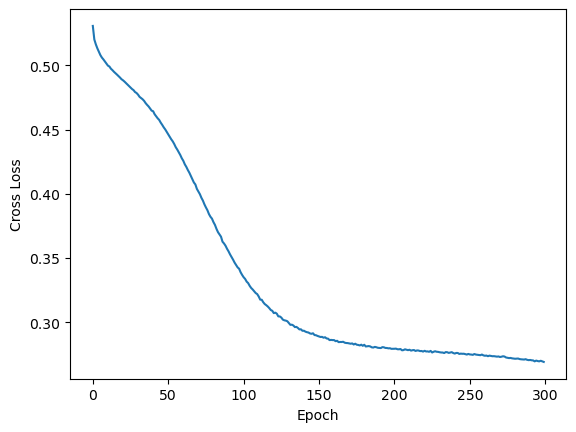

In [62]:
plt.plot(range(epochs),losses)
plt.xlabel("Epoch")
plt.ylabel("Cross Loss")

## Validate Model

In [63]:
with torch.no_grad():
    y_val = model_1o(cat_test,cont_test,bin_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(loss)

tensor(0.2683)


In [65]:
pred = [np.round(x.item(),6) for x in y_val]
actual = [x.item() for x in y_test]

In [66]:
ans = np.stack([pred,actual],1)

In [109]:
from sklearn import metrics

In [113]:
def roc_curve(data,n_points):
    points = np.linspace(0,1,n_points+1)
    
    # Metrics
    accuracy = np.zeros(n_points+1)
    precision = np.zeros(n_points+1)
    recall = np.zeros(n_points+1)
    f1_score = np.zeros(n_points+1)
    # ROC Curve Metrics 
    sensitivity = np.zeros(n_points+1)
    specifity = np.zeros(n_points+1)
    
    
    for i in range(n_points + 1):
        pred = data[:,0] > points[i]
        real = data[:,1]
        # Confusion matrix
        conf_mat = metrics.confusion_matrix(real, pred)
        tn,fp,fn,tp = conf_mat[0][0], conf_mat[0][1], conf_mat[1][0], conf_mat[1][1]
        # Metrics calculation
        try:
            accuracy[i] = (tp + tn)/conf_mat.sum()
            precision[i] = tp/(tp+fp)
            recall[i] = tp/(tp+fn)
            f1_score[i] = 2 * (precision[i]*recall[i])/(precision[i]+recall[i])
            # ROC Curve Metrics
            sensitivity[i] = tp/(tp+fn)
            specifity[i] = 1 - tn/(tn+fp)
        except e:
            accuracy[i] = np.nan
            precision[i] = np.nan
            recall[i] = np.nan
            f1_score[i] = np.nan
            # ROC Curve Metrics
            sensitivity[i] = np.nan
            specifity[i] = np.nan
            print(i)
        
    fig = plt.figure(figsize=(12,8))
    plt.plot(specifity,sensitivity)
    plt.plot([0,1],[0,1])
    plt.ylabel("Sensibility - False Positive Rate")
    plt.xlabel("Specifity = True Positive Rate")
    plt.show()

    return {'Thres': points,'acc': accuracy, 'pre': precision, 'rec': recall, 
            'f1': f1_score, 'sen': sensitivity, 'spe': specifity} 

C:\Users\edgar\AppData\Local\Temp\ipykernel_17792\2241958648.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision[i] = tp/(tp+fp)
C:\Users\edgar\AppData\Local\Temp\ipykernel_17792\2241958648.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision[i] = tp/(tp+fp)
C:\Users\edgar\AppData\Local\Temp\ipykernel_17792\2241958648.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision[i] = tp/(tp+fp)
C:\Users\edgar\AppData\Local\Temp\ipykernel_17792\2241958648.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision[i] = tp/(tp+fp)
C:\Users\edgar\AppData\Local\Temp\ipykernel_17792\2241958648.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision[i] = tp/(tp+fp)
C:\Users\edgar\AppData\Local\Temp\ipykernel_17792\2241958648.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision[i] = tp/(tp+fp)
C:\Users\edgar\AppData\Local\Temp\ipykernel_17792\2241958648.py:23: Ru

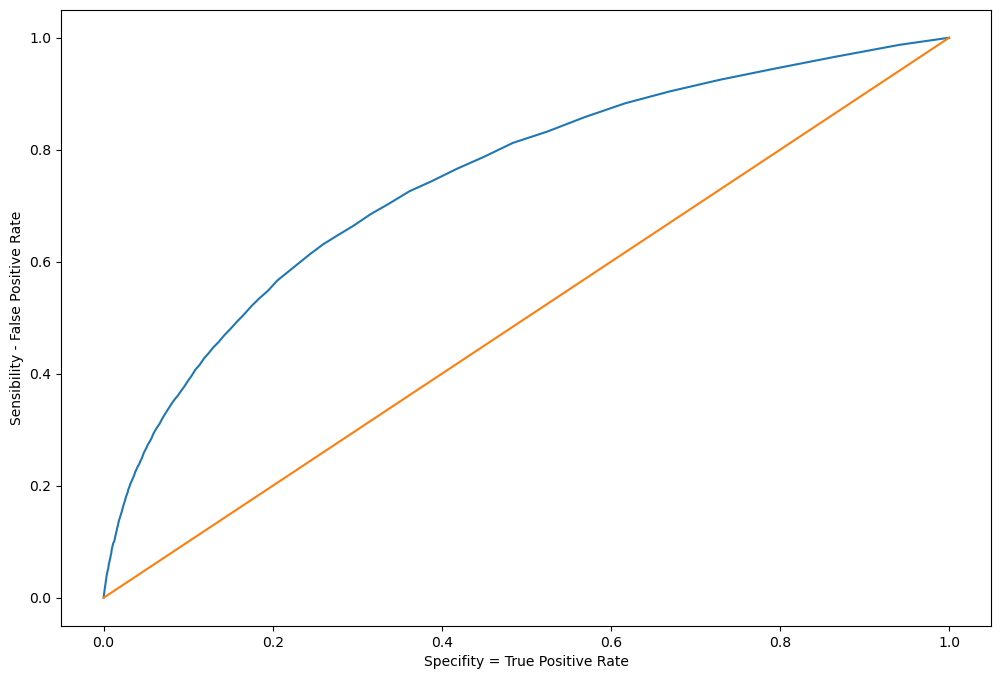

In [111]:
metrics = roc_curve(ans,200)

In [116]:
columns = ['Threshold_Value','Accuracy','Precision','Recall','F1_Score','Sensibility','Specifity']
metrics_df = pd.DataFrame(metrics)
metrics_df.columns = columns

In [117]:
metrics_df.to_csv('Metrics.csv')

In [118]:
specifity = metrics['spe']
sensitivity = metrics['sen']

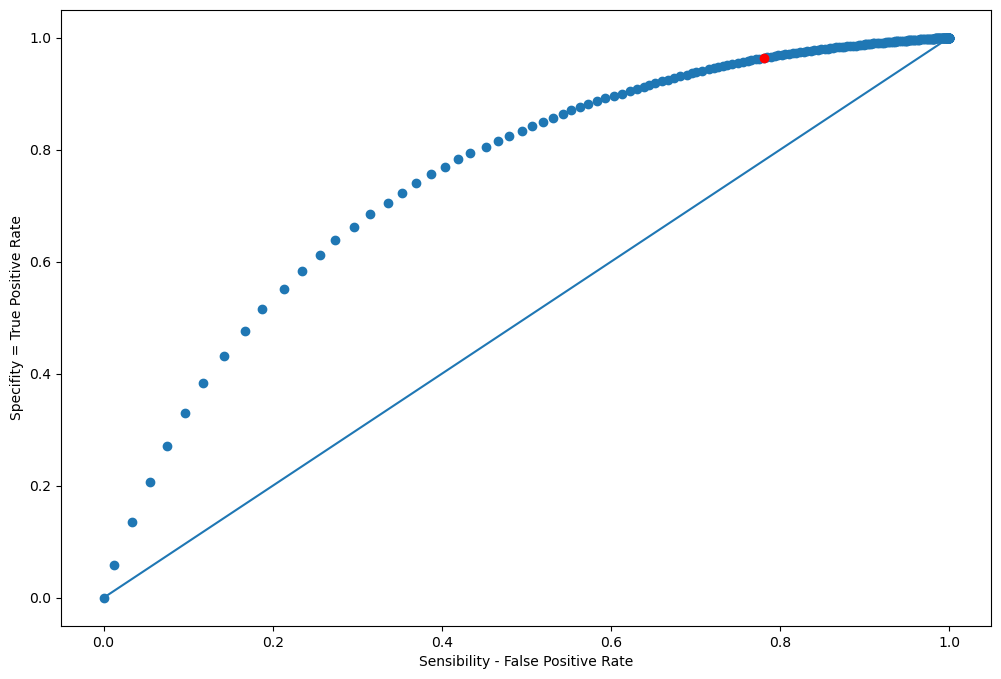

In [127]:
ind = 63

fig = plt.figure(figsize=(12,8))
plt.scatter(1-sensitivity,1-specifity)
plt.plot([0,1],[0,1])
plt.scatter(1-sensitivity[ind],1-specifity[ind],c='r')
plt.xlabel("Sensibility - False Positive Rate")
plt.ylabel("Specifity = True Positive Rate")
plt.show()

## Saving Model

In [69]:
if len(losses) == epochs:
    torch.save(model_1o.state_dict(), 'CardioDisease_1output.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')